# In this notebook
- Analysis for the manuscript "Sink, source or something in-between? Net effects of precipitation on aerosol particle populations"  
- Contains figures from the Main text, and from the Supplementary Information
- The figures are not sorted out in the notebook
## Main text
1. Fig.2 | PNSD vs. 96h accumulated rainfall along back trajectories
2. Fig.3 | Correlation between rainfall intensity along trajectories and PNSDs
3. Fig.4 | Recent rainfall and solar radiation versus particle concentrations
## Supplementary information
4. Fig. S1 | Seasonal hysplit back trajectory density  
5. Fig. S2 | Seasonal PNSD vs. 96h accumulated rainfall along back trajectories  
6. Fig. S3 | Distributions of accumulated rainfall and solar radiation along back trajectories  
7. 2D density plot of :
- Fig. S4 | concentrations vs. recent rainfall  
- Fig. S5 | concentrations vs. recent solar radiation  
8. Seasonal Recent rainfall and solar radiation versus particle concentrations:
- Fig. S6 | ATTO  
- Fig. S7 | HYY  
- Fig. S8 | ZEP  
9. Fig. S9 | PNSD vs. 96h accumulated solar radiation along back trajectories  
10. Fig. S10 | PNSD vs. 6h accumulated solar radiation along back trajectories  
11. Fig. S11 | Recent rainfall versus particle concentrations under different solar radiation exposures  
12. Fig. S12 | Recent solar radiation versus particle concentrations under different rainfall exposures  
13. Fig. S13 | Relationships of condensation sink with particle concentrations and recent rainfall  
14. Fig. S14 | Below 50nm particles concentration versus condensation sink under different solar radiation and rainfall exposures  
15. Fig. S15 | Below 50nm particles concentration at ATTO versus recent rainfall rate under different condensation sink regimes  
16. Fig. S16 | 96h accumulated rainfall and solar radiation versus particle concentrations   
  
-Theodore khadir, Stockholm University, May 2023

# Load and pre-process data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib as mpl

In [4]:
ds_atto = xr.open_dataset('/Users/theodorekhadir/Documents/PHD/Data/Stations/ATTO Tower/ds_atto_2014_2019_CS.nc')
ds_hyytiala = xr.open_dataset('/Users/theodorekhadir/Documents/PHD/Data/Stations/Hyytiala/ds_hyytiala_2005_2019.nc')
ds_zeppelin = xr.open_dataset('/Users/theodorekhadir/Documents/PHD/Data/Stations/Zeppelin/ds_zeppelin_2010_2019.nc')

In [5]:
# number concentration in range of diameters
def conc_range(ds, lim_inf, lim_sup):
    Dp = ds.D.values
    logDp = np.log10(Dp)
    interval = np.array([logDp[i]-logDp[i-1] for i in range(1,np.size(Dp))])/2
    centers = logDp[:-1]+interval
    centers_bis = np.append(logDp[0]-interval[0], centers)
    centers_bis = np.append(centers_bis, logDp[-1]+interval[-1])
    bound_bin = 10**(centers_bis)
    dlogDp = np.array([np.log10(bound_bin[i+1])-np.log10(bound_bin[i]) for i in range(0, bound_bin.shape[0]-1)])
    pnsd_nolog = np.zeros(ds['pnsd'].values.shape)
    for i, Dp_i in enumerate(Dp):
        pnsd_nolog[:,i] = ds['pnsd'].sel(D=Dp_i).values * dlogDp[i]
    ds['pnsd_nolog'] = (['time', 'D'], pnsd_nolog)
    ds['N_'+str(lim_inf)+'_'+str(lim_sup)] = ds['pnsd_nolog'].sel(D=slice(lim_inf, lim_sup)).sum(dim='D')

for lim_inf, lim_sup in zip([10, 50, 100], [50, 500, 500]):
    for ds in [ds_atto, ds_hyytiala, ds_zeppelin]:
        ds = conc_range(ds, lim_inf, lim_sup)

In [17]:
# accumulated variables

ds_atto['Acc_rainfall_6h'] = (['time'], np.sum(ds_atto.Rainfall_TRMM.values[:,0:6], axis=1)) # TRMM instead of GDAS1 for ATTO
ds_hyytiala['Acc_rainfall_6h'] = (['time'], np.sum(ds_hyytiala.Rainfall.values[:,1:7], axis=1))
ds_zeppelin['Acc_rainfall_6h'] = (['time'], np.sum(ds_zeppelin.Rainfall.values[:,0:6], axis=1))

ds_atto['Acc_solar_radiation_6h'] = (['time'], np.sum(ds_atto.Solar_Radiation.values[:,0:6], axis=1))
ds_hyytiala['Acc_solar_radiation_6h'] = (['time'], np.sum(ds_hyytiala.Solar_radiation.values[:,1:7], axis=1))
ds_zeppelin['Acc_solar_radiation_6h'] = (['time'], np.sum(ds_zeppelin.Solar_radiation.values[:,0:6], axis=1))

# sum rainfall over the first N elements along time_traj
ds_atto['Acc_rainfall_6h'] = (['time'], np.sum(ds_atto.Rainfall_TRMM.values[:,0:6], axis=1))
ds_hyytiala['Acc_rainfall_6h'] = (['time'], np.sum(ds_hyytiala.Rainfall.values[:,0:6], axis=1))
ds_zeppelin['Acc_rainfall_6h'] = (['time'], np.sum(ds_zeppelin.Rainfall.values[:,0:6], axis=1))

ds_atto['Acc_rainfall_96h'] = (['time'], np.sum(ds_atto.Rainfall_TRMM.values[:,0:96], axis=1))
ds_hyytiala['Acc_rainfall_96h'] = (['time'], np.sum(ds_hyytiala.Rainfall.values[:,0:96], axis=1))
ds_zeppelin['Acc_rainfall_96h'] = (['time'], np.sum(ds_zeppelin.Rainfall.values[:,0:96], axis=1))

# solar radiation
ds_atto['Acc_solar_radiation_12h'] = (['time'], np.sum(ds_atto.Solar_Radiation.values[:,0:12], axis=1))
ds_hyytiala['Acc_solar_radiation_12h'] = (['time'], np.sum(ds_hyytiala.Solar_radiation.values[:,0:12], axis=1))
ds_zeppelin['Acc_solar_radiation_12h'] = (['time'], np.sum(ds_zeppelin.Solar_radiation.values[:,0:12], axis=1))


# 96h
ds_atto['Acc_solar_radiation_96h'] = (['time'], np.sum(ds_atto.Solar_Radiation.values[:,0:96], axis=1))
ds_hyytiala['Acc_solar_radiation_96h'] = (['time'], np.sum(ds_hyytiala.Solar_radiation.values[:,0:96], axis=1))
ds_zeppelin['Acc_solar_radiation_96h'] = (['time'], np.sum(ds_zeppelin.Solar_radiation.values[:,0:96], axis=1))

# 2. Fig. 3 | Correlation along trajectories

In [22]:
def corr_coef_pnsd_precip(df, list_vars, Dp, list_Dp):
    zeros = np.zeros(np.size(Dp))
    zeros_bis = np.zeros(np.size(Dp)+1)
    logDp = np.log10(Dp)
    interval = np.array([logDp[i]-logDp[i-1] for i in range(1,np.size(Dp))])/2
    centers = logDp[:-1]+interval
    centers_bis = np.append(logDp[0]-interval[0], centers)
    centers_bis = np.append(centers_bis, logDp[-1]+interval[-1])
    size_bin = 10**(centers_bis)
    corr_coef = np.zeros((96,len(list_Dp)))*np.nan
    corr_pval = np.zeros((96,len(list_Dp)))*np.nan
    for i in range(0,96):
        for j in range(0,len(list_Dp)):
            corr_coef[i, j], corr_pval[i, j] = spearmanr(df.loc[:, [list_vars[i], list_Dp[j]]].dropna())
    return corr_coef, corr_pval, size_bin

def thickax_corr(ax):
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.3)
        ax.spines[axis].set_color('k')
    plt.rc('axes', linewidth=0.2)
    fontsize = 12
    ax = plt.gca()
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    ax.tick_params(direction='out', length=8, width=1.3, pad=10, bottom=True, top=False, left=True, right=False, color='k')
    ax.tick_params(which='minor', length=4, color='k', width=1.3)

def plot_corr_spearman(station, ax, corr_coef, size_bin, mask_corr_pval, Dp):
    ax.set_facecolor("lightgrey")
    # difference between consecutive numbers in size_bin
    diff = [size_bin[i+1]-size_bin[i] for i in range(0,len(size_bin)-1)]
    X, Y = np.meshgrid(Dp+diff, np.arange(0,96)+0.5)
    x, y = np.meshgrid(Dp+diff, np.arange(0,96)+0.5)
    cmap = plt.get_cmap('seismic',lut=15)
    vmax=0.4
    vmin=-0.4
    inc = 0.025
    mappable = ax.pcolor(X, Y, corr_coef, cmap=cmap, vmax=vmax, vmin=vmin)
    ax.scatter(x, y, s=mask_corr_pval*10, c='k')
    ax.set_xscale('log')
    thickax_corr(ax)
    ax.set_xlim(10,400)
    ax.set_ylim(0,96)
    # ax.set_xlabel('Particle diameter (nm)',fontsize=15)
    ax.set_xticks([10,20,30,40,50,60,70,80,90,100,200,300,400])
    ax.set_xticklabels([10,20,30,40,50,'',70,'','',100,200,'',400], fontsize=15)
    ax.set_yticks(np.arange(0,97,12))
    ax.set_yticklabels(np.arange(0,-97,-12), fontsize=15)
    ax.grid(True, alpha=0.4, c='grey')
    # ax.set_title(station, fontsize=18)
    return mappable

In [23]:
# slices of the dataset for each station
def select_seasons(list_month, ds):
    ds_season = ds.sel(time=ds.time.dt.month.isin(list_month))
    return ds_season

ds_atto_wet = select_seasons([2,3,4,5], ds_atto)
ds_atto_wet2dry = select_seasons([6,7], ds_atto)
ds_atto_dry = select_seasons([8,9,10,11], ds_atto)
ds_atto_dry2wet = select_seasons([12,1], ds_atto)
ds_atto_seasons = [ds_atto_wet, ds_atto_wet2dry, ds_atto_dry, ds_atto_dry2wet]

ds_hyytiala_djf = select_seasons([12,1,2], ds_hyytiala)
ds_hyytiala_mam = select_seasons([3,4,5], ds_hyytiala)
ds_hyytiala_jja = select_seasons([6,7,8], ds_hyytiala)
ds_hyytiala_son = select_seasons([9,10,11], ds_hyytiala)
ds_hyytiala_seasons = [ds_hyytiala_djf, ds_hyytiala_mam, ds_hyytiala_jja, ds_hyytiala_son]

ds_zeppelin_jjas = select_seasons([6,7,8, 9], ds_zeppelin)
ds_zeppelin_ondj = select_seasons([10,11,12,1], ds_zeppelin)
ds_zeppelin_fmam = select_seasons([2,3,4,5], ds_zeppelin)
ds_zeppelin_seasons = [ds_zeppelin_jjas, ds_zeppelin_ondj, ds_zeppelin_fmam]

In [24]:
from scipy.stats import spearmanr
def corr_coef_pnsd_var(ds, name_var):
    array_pnsd = ds.pnsd.values
    array_var = ds[name_var].values
    Dp = ds.D.values
    zeros = np.zeros(np.size(Dp))
    zeros_bis = np.zeros(np.size(Dp)+1)
    logDp = np.log10(Dp)
    interval = np.array([logDp[i]-logDp[i-1] for i in range(1,np.size(Dp))])/2
    centers = logDp[:-1]+interval
    centers_bis = np.append(logDp[0]-interval[0], centers)
    centers_bis = np.append(centers_bis, logDp[-1]+interval[-1])
    size_bin = 10**(centers_bis)
    
    corr_coef = np.zeros((96,len(Dp)))*np.nan
    corr_pval = np.zeros((96,len(Dp)))*np.nan
    for itime_traj, time_traj in enumerate(np.arange(0,96)):
        if itime_traj%20==0:
            print(itime_traj)
        for iD, D in enumerate(Dp):
            slice1 = array_pnsd[:, iD]
            slice2 = array_var[:,itime_traj]
            slice = np.vstack((slice1, slice2))
            slice = slice[:,~np.isnan(slice).any(axis=0)]
            corr_coef[itime_traj, iD], corr_pval[itime_traj, iD] = spearmanr(slice[0,:] , slice[1,:])
    return corr_coef, corr_pval, size_bin

In [ ]:
list_seasons_corrplot = []

name_seasons_atto = ['Wet', 'Wet to Dry', 'Dry', 'Dry to Wet']
name_seasons_hyytiala = ['Winter', 'Spring', 'Summer', 'Autumn']
name_seasons_zeppelin = ['Summer', 'Slow Build-up', 'Arctic Haze']

for ids, ds in enumerate(ds_atto_seasons):
    corr_coef, corr_pval, size_bin = corr_coef_pnsd_var(ds, 'Rainfall_TRMM')
    list_seasons_corrplot.append(['ATTO', name_seasons_atto[ids], corr_coef, corr_pval, size_bin])
    
for ids, ds in enumerate(ds_hyytiala_seasons):
    corr_coef, corr_pval, size_bin = corr_coef_pnsd_var(ds, 'Rainfall')
    list_seasons_corrplot.append(['Hyytiala', name_seasons_hyytiala[ids], corr_coef, corr_pval, size_bin])
    
for ids, ds in enumerate(ds_zeppelin_seasons):
    corr_coef, corr_pval, size_bin = corr_coef_pnsd_var(ds, 'Rainfall')
    list_seasons_corrplot.append(['Zeppelin', name_seasons_zeppelin[ids], corr_coef, corr_pval, size_bin])

Text(1.06, 0.5, 'Rainfall')

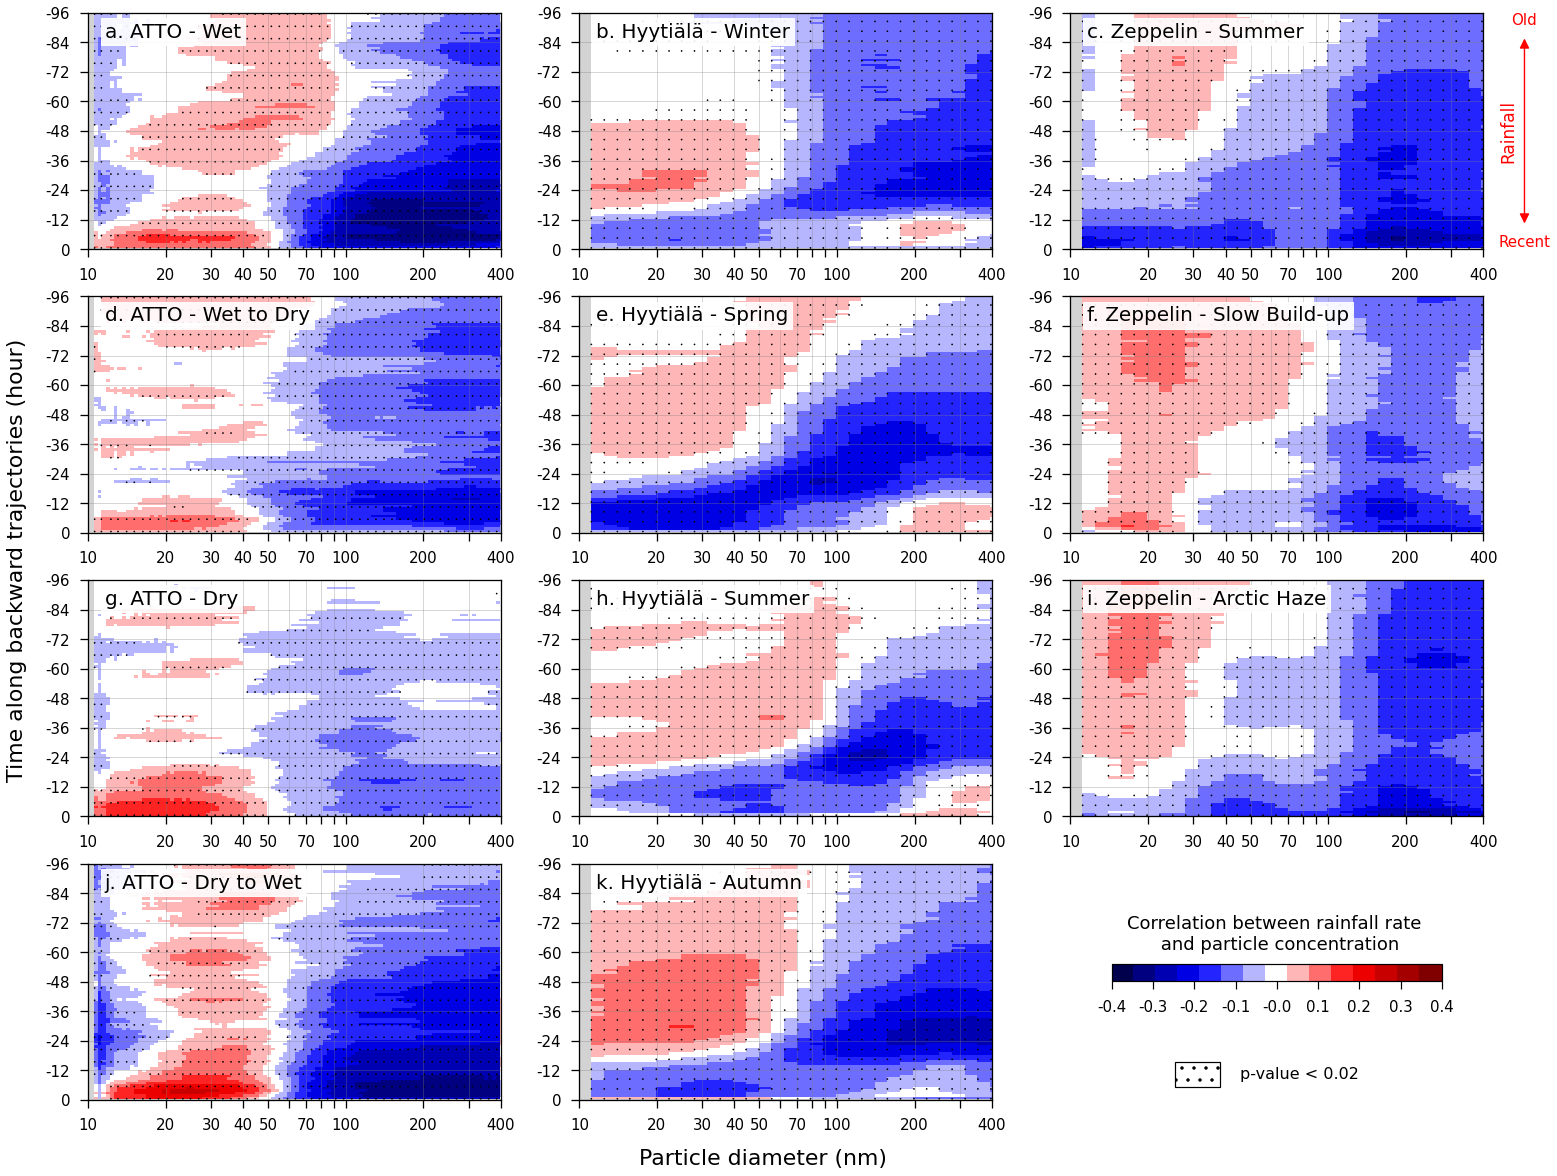

In [26]:
fig = plt.figure(num=None, figsize=(25, 20))

def plot_correlation(station, ax, corr_coef, corr_pval, size_bin, Dp, mask_corr_pval):
    mappable = plot_corr_spearman(station, ax, corr_coef, size_bin, mask_corr_pval, Dp)
    return mappable

name_seasons_atto = ['a. ATTO - Wet', 'd. ATTO - Wet to Dry', 'g. ATTO - Dry', 'j. ATTO - Dry to Wet']
count=0
for isub, sub in enumerate([1,4,7,10]):
    ax = plt.subplot(4,3,sub)
    corr_coef, corr_pval, size_bin = list_seasons_corrplot[isub][2:5]
    mask_corr_pval = np.where(corr_pval > 0.02, np.nan, corr_pval)
    mask_corr_pval = np.where(mask_corr_pval <= 0.02, 1, mask_corr_pval)
    mask = np.ones(mask_corr_pval.shape)*np.nan
    for i in range(0, mask_corr_pval.shape[0], 5):
        for j in range(0, mask_corr_pval.shape[1], 2):
            mask[i, j] = 0.05
    mask_corr_pval = mask_corr_pval * mask
    
    mappable = plot_correlation('ATTO', ax, corr_coef, corr_pval, size_bin, ds_atto.D.values, mask_corr_pval)
    count+=1
    ax.text(0.04, 0.96, name_seasons_atto[isub], transform=ax.transAxes, fontsize=20,
        va='top', bbox=dict(facecolor='white', edgecolor='white', alpha=0.9))

    
name_seasons_hyytiala = ['b. Hyytiälä - Winter', 'e. Hyytiälä - Spring', 'h. Hyytiälä - Summer', 'k. Hyytiälä - Autumn']
for isub, sub in enumerate([2,5,8,11]):
    ax = plt.subplot(4,3,sub)
    
    corr_coef, corr_pval, size_bin = list_seasons_corrplot[4+isub][2:5]
    mask_corr_pval = np.where(corr_pval > 0.02, np.nan, corr_pval)
    mask_corr_pval = np.where(mask_corr_pval <= 0.02, 1, mask_corr_pval)
    mask = np.ones(mask_corr_pval.shape)*np.nan
    for i in range(0, mask_corr_pval.shape[0], 4):
        for j in range(0, mask_corr_pval.shape[1], 1):
            mask[i, j] = 0.05
    mask_corr_pval = mask_corr_pval * mask
    
    mappable = plot_correlation('HYYTIALA', ax, corr_coef, corr_pval, size_bin, ds_hyytiala.D.values, mask_corr_pval)
    count+=1
    ax.text(0.04, 0.96, name_seasons_hyytiala[isub], transform=ax.transAxes, fontsize=20,
        va='top', bbox=dict(facecolor='white', edgecolor='white', alpha=0.9))

name_seasons_zeppelin = ['c. Zeppelin - Summer', 'f. Zeppelin - Slow Build-up', 'i. Zeppelin - Arctic Haze']
for isub, sub in enumerate([3,6,9]):
    ax = plt.subplot(4,3,sub)
    
    corr_coef, corr_pval, size_bin = list_seasons_corrplot[8+isub][2:5]
    mask_corr_pval = np.where(corr_pval > 0.02, np.nan, corr_pval)
    mask_corr_pval = np.where(mask_corr_pval <= 0.02, 1, mask_corr_pval)
    mask = np.ones(mask_corr_pval.shape)*np.nan
    for i in range(0, mask_corr_pval.shape[0], 4):
        for j in range(0, mask_corr_pval.shape[1], 1):
            mask[i, j] = 0.05
    mask_corr_pval = mask_corr_pval * mask
    mappable = plot_correlation('ZEPPELIN', ax, corr_coef, corr_pval, size_bin, ds_zeppelin.D.values, mask_corr_pval)
    count+=1
    ax.text(0.04, 0.96, name_seasons_zeppelin[isub], transform=ax.transAxes, fontsize=20,
        va='top', bbox=dict(facecolor='white', edgecolor='white', alpha=0.9))
    
plt.subplots_adjust(wspace=0.19, hspace=0.2)

# Parameters of the colorbar
ax_bis = plt.subplot(4,3,12)
# hide the subplot
ax_bis.axis('off')
axins = inset_axes(ax_bis,
                    width="80%",  
                    height="7.5%",
                    loc='upper center',
                    borderpad=10
                   )

for axis in ['top','bottom','left','right']:
    axins.spines[axis].set_linewidth(1.2)
    axins.spines[axis].set_color('k')
plt.rc('axes', linewidth=1.2)
axins.tick_params(direction='out', length=8, width=1.2, pad=10, bottom=True, top=False, left=True, right=False, color='k')
cb = fig.colorbar(mappable, cax=axins, orientation="horizontal", ticks=np.arange(-0.4, 0.5, 0.1))
cb.set_label('Correlation between rainfall rate \n and particle concentration', labelpad=-100, size=18, rotation=0)
cb.ax.set_xticklabels(np.round(np.arange(-0.4, 0.5, 0.1),1))
cb.ax.tick_params(labelsize=15)

import matplotlib.patches as mpatches

dots = mpatches.Patch(alpha=1,hatch='.',label='p-value < 0.02', facecolor='w', edgecolor='k', linewidth=1.2)
# legend with the median and the 25th and 75th quantiles in axins
leg = axins.legend([dots], ['p-value < 0.02'], loc='upper center', bbox_to_anchor=(0.5, -4), ncol=1, fontsize=16, frameon=False)
for patch in leg.get_patches():
    patch.set_height(25)
    patch.set_width(45)
    patch.set_y(-8)
    patch.set_x(-20)

# ylabel for all the subplots of the figure
fig.text(0.5, 0.08, 'Particle diameter (nm)', ha='center', fontsize=22)
fig.text(0.08, 0.5, 'Time along backward trajectories (hour)', va='center', rotation='vertical', fontsize=22)

# create a double arrow at the right of the 3rd subplot of the first row following the y-axis
ax = plt.subplot(4,3,3)

color = (43/255, 154/255, 249/255)
# color a bit darker
new_color = (color[0]*0.8, color[1]*0.8, color[2]*0.8)
# the arrow is vertical and goes from the bottom to the top of the subplot
# nice red color
color = (255/255, 0/255, 0/255)
ax.annotate("", xy=(1.1, 0.1), xycoords='axes fraction', xytext=(1.1, 0.9), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="<|-|>", color=color, linewidth=1.4, mutation_scale=20))
# write text at the top of the arrow
ax.text(1.1, 1, 'Old', va='top', ha='center', rotation=0, fontsize=15, transform=ax.transAxes, color=color)
# write text at the bottom of the arrow
ax.text(1.1, 0, 'Recent', va='bottom', ha='center', rotation=0, fontsize=15, transform=ax.transAxes, color=color)
# write text along the arrow
ax.text(1.06, 0.5, 'Rainfall', va='center', ha='center', rotation=90, fontsize=17, transform=ax.transAxes, color=color)

# save figure
# plt.savefig('/Users/theodorekhadir/Documents/PHD/Figures/S1_comparison/Supplementary/final/correlation_alongtraj_byseasons.jpeg', bbox_inches='tight', dpi=300)

# 5. Fig. S2: Seasonal 96h Acc Rainfall versus PNSD

In [32]:
ds_atto['Acc_rainfall_96h'] = (['time'], np.sum(ds_atto.Rainfall_TRMM.values[:,0:96], axis=1))
ds_hyytiala['Acc_rainfall_96h'] = (['time'], np.sum(ds_hyytiala.Rainfall.values[:,0:96], axis=1))
ds_zeppelin['Acc_rainfall_96h'] = (['time'], np.sum(ds_zeppelin.Rainfall.values[:,0:96], axis=1))

In [33]:
# calculate the median of a given variable for each diameter bin and concentration bin
def median_var_pnsd(y_max, y_width_bin, ds, threshold, name_var):
    
    y_bin = np.arange(0,y_max,y_width_bin)
    
    Dp = ds.D.values
    print(Dp.shape)
    logDp = np.log10(Dp)
    interval = np.array([logDp[i]-logDp[i-1] for i in range(1,np.size(Dp))])/2
    centers = logDp[:-1]+interval
    centers_bis = np.append(logDp[0]-interval[0], centers)
    centers_bis = np.append(centers_bis, logDp[-1]+interval[-1])
    size_bin = 10**(centers_bis)
    
    # initialize nan array that will contain bin concentration
    cm_var = np.zeros((len(Dp), y_bin.shape[0]+1))*np.nan
    cm_count = np.zeros((len(Dp), y_bin.shape[0]+1))*np.nan

    ds = ds[[name_var, 'pnsd']]

    lenDp = len(Dp)
    for iD, D in enumerate(Dp):
        # print(iD, '/', lenDp)
        ds_D = ds.sel(D=D)
        for iy, y in enumerate(y_bin):
            ds_slice = ds_D.sel(time=((ds_D['pnsd']>=y)&(ds_D['pnsd']<y+y_width_bin)))
            cm_count[iD, iy] = len(ds_slice.time)
            
            if cm_count[iD, iy] <= threshold:
                cm_var[iD, iy] = np.nan
                
            else:
                cm_var[iD, iy] = ds_slice[name_var].median()
        
    return cm_var, cm_count, size_bin

# find the size of each diameter bin
def find_size_bin(ds):
    Dp = ds.D.values
    logDp = np.log10(Dp)
    interval = np.array([logDp[i]-logDp[i-1] for i in range(1,np.size(Dp))])/2
    centers = logDp[:-1]+interval
    centers_bis = np.append(logDp[0]-interval[0], centers)
    centers_bis = np.append(centers_bis, logDp[-1]+interval[-1])
    return 10**(centers_bis)

size_bin_atto = find_size_bin(ds_atto)
size_bin_hyytiala = find_size_bin(ds_hyytiala)
size_bin_zeppelin = find_size_bin(ds_zeppelin)

In [34]:
# slices of the dataset for each station
def select_seasons(list_month, ds):
    ds_season = ds.sel(time=ds.time.dt.month.isin(list_month))
    return ds_season

ds_atto_wet = select_seasons([2,3,4,5], ds_atto)
ds_atto_wet2dry = select_seasons([6,7], ds_atto)
ds_atto_dry = select_seasons([8,9,10,11], ds_atto)
ds_atto_dry2wet = select_seasons([12,1], ds_atto)
ds_atto_seasons = [ds_atto_wet, ds_atto_wet2dry, ds_atto_dry, ds_atto_dry2wet]

ds_hyytiala_djf = select_seasons([12,1,2], ds_hyytiala)
ds_hyytiala_mam = select_seasons([3,4,5], ds_hyytiala)
ds_hyytiala_jja = select_seasons([6,7,8], ds_hyytiala)
ds_hyytiala_son = select_seasons([9,10,11], ds_hyytiala)
ds_hyytiala_seasons = [ds_hyytiala_djf, ds_hyytiala_mam, ds_hyytiala_jja, ds_hyytiala_son]

ds_zeppelin_jjas = select_seasons([6,7,8, 9], ds_zeppelin)
ds_zeppelin_ondj = select_seasons([10,11,12,1], ds_zeppelin)
ds_zeppelin_fmam = select_seasons([2,3,4,5], ds_zeppelin)
ds_zeppelin_seasons = [ds_zeppelin_jjas, ds_zeppelin_ondj, ds_zeppelin_fmam]

In [ ]:
# ATTO
y_max=8000
y_width_bin=100
threshold=20
vmin=0
vmax=10
name_var = 'Acc_rainfall_96h'
list_ds_atto = [ds_atto_wet, ds_atto_wet2dry, ds_atto_dry, ds_atto_dry2wet]
list_cm_precip_atto = [median_var_pnsd(y_max, y_width_bin, ds, threshold, name_var)[0] for ds in list_ds_atto]

In [ ]:
# HHYTIALA
y_max=12000
y_width_bin=100
threshold=20
vmin=0
vmax=10
name_var = 'Acc_rainfall_96h'
list_ds_hyytiala = [ds_hyytiala_djf, ds_hyytiala_mam, ds_hyytiala_jja, ds_hyytiala_son]
list_cm_precip_hyytiala = [median_var_pnsd(y_max, y_width_bin, ds, threshold, name_var)[0] for ds in list_ds_hyytiala]

In [ ]:
# ZEPPELIN
y_max=2000
y_width_bin=30
threshold=20
vmin=0
vmax=10
name_var = 'Acc_rainfall_96h'
list_ds_zeppelin = [ds_zeppelin_jjas, ds_zeppelin_ondj, ds_zeppelin_fmam]
list_cm_precip_zeppelin = [median_var_pnsd(y_max, y_width_bin, ds, threshold, name_var)[0] for ds in list_ds_zeppelin]

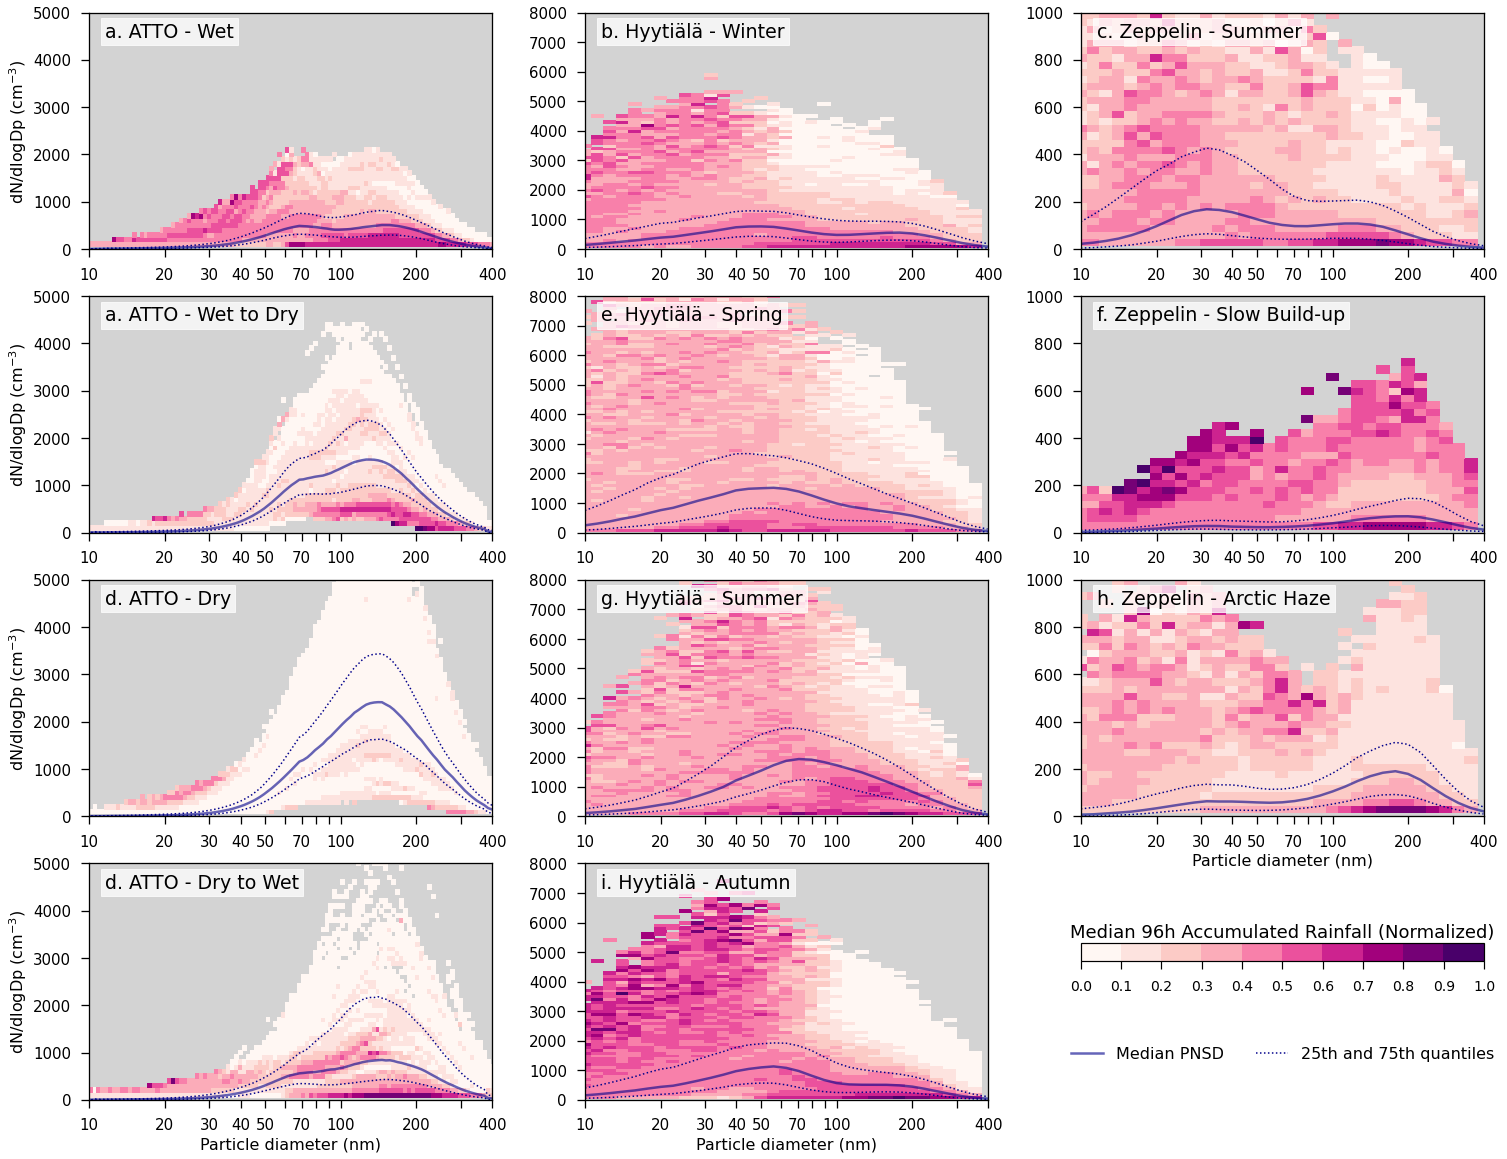

In [38]:
def thickax_pink_plot(ax):
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.3)
        ax.spines[axis].set_color('k')
    plt.rc('axes', linewidth=0.2)
    fontsize = 15
    ax = plt.gca()
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    ax.tick_params(direction='out', length=8, width=1.3, pad=10, bottom=True, top=False, left=True, right=False, color='k')
    ax.tick_params(which='minor', length=4, color='k', width=1.3)
    
fig = plt.figure(num=None, figsize=(25, 20))

y_lim = [7000, 7000, 7000, 7000]
y_max=8000
y_width_bin=100
count=0
list_seasons = ['a. ATTO - Wet', 'a. ATTO - Wet to Dry', 'd. ATTO - Dry', 'd. ATTO - Dry to Wet']
max = np.nanmax([np.nanmax(cm) for cm in list_cm_precip_atto])
for isub, sub in enumerate([1, 4, 7, 10]):
    ax = plt.subplot(4,3,sub)
    ax.set_facecolor("lightgrey")
    X, Y = np.meshgrid(size_bin_atto[:-1], np.arange(0,y_max+y_width_bin,y_width_bin)+y_width_bin/2)
    cmap = plt.get_cmap('RdPu',lut=10)
    cm_precip_bis = list_cm_precip_atto[isub]/max
    mappable = ax.pcolor(X, Y, cm_precip_bis.T, cmap=cmap, norm=mpl.colors.Normalize(vmin=0, vmax=1))
    ax.plot(list_ds_atto[isub].D, list_ds_atto[isub]['pnsd'].median(dim='time'),color='darkblue', 
        linewidth=2.5, alpha= 0.6)
    p25 = list_ds_atto[isub]['pnsd'].quantile(0.25, dim='time')
    p75 = list_ds_atto[isub]['pnsd'].quantile(0.75, dim='time')
    # dotted lines for the 25% and 75% quantiles
    ax.plot(list_ds_atto[isub].D, p25, color='darkblue', linestyle='dotted', linewidth=1.5)
    ax.plot(list_ds_atto[isub].D, p75, color='darkblue', linestyle='dotted', linewidth=1.5)
    thickax_pink_plot(ax)
    ax.set_ylim(0,5000)
    ax.set_xlim(10,400)
    ax.set_xscale('log')
    ax.set_xticks([10,20,30,40,50,60,70,80,90,100,200,300,400])
    ax.set_xticklabels([10,20,30,40,50,'',70,'','',100,200,'',400],fontsize=15)
    ax.set_ylabel(r'dN/dlogDp (cm$^{-3}$)',fontsize=16)
    ax.text(0.04, 0.96, list_seasons[isub], transform=ax.transAxes, fontsize=19,
            va='top', bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))

ax.set_xlabel('Particle diameter (nm)',fontsize=16)

y_lim = [8000, 12000, 12000, 10000]
y_lim = [12000, 12000, 12000, 12000]
y_max=12000
y_width_bin=100
count=0
list_seasons = ['b. Hyytiälä - Winter', 'e. Hyytiälä - Spring', 'g. Hyytiälä - Summer', 'i. Hyytiälä - Autumn']
max = np.nanmax([np.nanmax(cm) for cm in list_cm_precip_hyytiala])
for isub, sub in enumerate([2, 5, 8, 11]):
    ax = plt.subplot(4,3,sub)
    ax.set_facecolor("lightgrey")
    X, Y = np.meshgrid(size_bin_hyytiala[:-1], np.arange(0,y_max+y_width_bin,y_width_bin)+y_width_bin/2)
    cmap = plt.get_cmap('RdPu',lut=10)
    cm_precip_bis = list_cm_precip_hyytiala[isub]/max
    mappable = ax.pcolor(X, Y, cm_precip_bis.T, cmap=cmap, norm=mpl.colors.Normalize(vmin=0, vmax=1))
    ax.plot(list_ds_hyytiala[isub].D, list_ds_hyytiala[isub]['pnsd'].median(dim='time'),color='darkblue', 
        linewidth=2.5, alpha= 0.6)
    p25 = list_ds_hyytiala[isub]['pnsd'].quantile(0.25, dim='time')
    p75 = list_ds_hyytiala[isub]['pnsd'].quantile(0.75, dim='time')
    # dotted lines for the 25% and 75% quantiles
    ax.plot(list_ds_hyytiala[isub].D, p25, color='darkblue', linestyle='dotted', linewidth=1.5)
    ax.plot(list_ds_hyytiala[isub].D, p75, color='darkblue', linestyle='dotted', linewidth=1.5)
    thickax_pink_plot(ax)
    ax.set_ylim(0,8000)
    ax.set_xlim(10,400)
    ax.set_xscale('log')
    ax.set_xticks([10,20,30,40,50,60,70,80,90,100,200,300,400])
    ax.set_xticklabels([10,20,30,40,50,'',70,'','',100,200,'',400],fontsize=15)
    ax.text(0.04, 0.96, list_seasons[isub], transform=ax.transAxes, fontsize=19,
            va='top', bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))

ax.set_xlabel('Particle diameter (nm)',fontsize=16)

y_lim = [2000, 1000, 1500]
y_lim = [2000, 2000, 2000]
y_max=2000
y_width_bin=30
count=0
list_seasons = ['c. Zeppelin - Summer', 'f. Zeppelin - Slow Build-up', 'h. Zeppelin - Arctic Haze']
max = np.nanmax([np.nanmax(cm) for cm in list_cm_precip_zeppelin])
for isub, sub in enumerate([3, 6, 9]):
    ax = plt.subplot(4,3,sub)
    ax.set_facecolor("lightgrey")
    X, Y = np.meshgrid(size_bin_zeppelin[:-1], np.arange(0,y_max+y_width_bin,y_width_bin)+y_width_bin/2)
    cmap = plt.get_cmap('RdPu',lut=10)
    cm_precip_bis = list_cm_precip_zeppelin[isub]/max
    mappable = ax.pcolor(X, Y, cm_precip_bis.T, cmap=cmap, norm=mpl.colors.Normalize(vmin=0, vmax=1))
    line1 = ax.plot(list_ds_zeppelin[isub].D, list_ds_zeppelin[isub]['pnsd'].median(dim='time'),color='darkblue', 
        linewidth=2.5, alpha= 0.6, label='Median PNSD')
    p25 = list_ds_zeppelin[isub]['pnsd'].quantile(0.25, dim='time')
    p75 = list_ds_zeppelin[isub]['pnsd'].quantile(0.75, dim='time')
    # dotted lines for the 25% and 75% quantiles
    line2 = ax.plot(list_ds_zeppelin[isub].D, p25, color='darkblue', linestyle='dotted', 
            linewidth=1.5, label='25th and 75th percentiles')
    ax.plot(list_ds_zeppelin[isub].D, p75, color='darkblue', linestyle='dotted', linewidth=1.5)
    thickax_pink_plot(ax)
    ax.set_ylim(0,1000)
    ax.set_xlim(10,400)
    ax.set_xscale('log')
    ax.set_xticks([10,20,30,40,50,60,70,80,90,100,200,300,400])
    ax.set_xticklabels([10,20,30,40,50,'',70,'','',100,200,'',400],fontsize=15)
    ax.text(0.04, 0.96, list_seasons[isub], transform=ax.transAxes, fontsize=19,
            va='top', bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))

ax.set_xlabel('Particle diameter (nm)',fontsize=16)

plt.subplots_adjust(wspace=0.23)

# Parameters of the colorbar
ax_bis = plt.subplot(4,3,12)
# hide the subplot
ax_bis.axis('off')
axins = inset_axes(ax_bis,
                    width="100%",  
                    height="7.5%",
                    loc='upper center',
                    borderpad=8
                   )

for axis in ['top','bottom','left','right']:
    axins.spines[axis].set_linewidth(1.2)
    axins.spines[axis].set_color('k')
plt.rc('axes', linewidth=1.2)
axins.tick_params(direction='out', length=8, width=1.2, pad=10, bottom=True, top=False, left=True, right=False, color='k')
cb = fig.colorbar(mappable, cax=axins, orientation="horizontal", ticks=np.arange(0,1.1,0.1))
cb.set_label(r'Median 96h Accumulated Rainfall (Normalized)', labelpad=-70, size=18, rotation=0)
cb.ax.set_xticklabels(np.round(np.arange(0,1.1,0.1),1))
cb.ax.tick_params(labelsize=14)

# legend with the median and the 25th and 75th quantiles in axins
axins.legend([line1[0], line2[0]], ['Median PNSD', '25th and 75th quantiles'], 
                loc='upper center', bbox_to_anchor=(0.5, -4), ncol=2, fontsize=16, frameon=False)

# path = '/Users/theodorekhadir/Documents/PHD/Figures/S1_comparison/Supplementary/final/'
# plt.savefig(path+'seasonal_pinkplot_median96hrainfall.png', dpi=250, bbox_inches='tight')

# 7. 2D density plots
- 6h accumulated rainfall
- 6h solar radiation

In [58]:
import seaborn as sns
import matplotlib

In [111]:
# create a df with N<50, N>100, 6h accumulated rainfall, 6h accumulated solar radiation

def ds_to_df(ds, list_vars):
    df = pd.DataFrame(columns=list_vars)
    for var in list_vars:
        df[var] = ds[var]
    return df

list_vars = ['N_10_50', 'N_50_500','N_100_500', 'Acc_rainfall_6h', 'Acc_solar_radiation_6h']
df_atto = ds_to_df(ds_atto, list_vars)
df_hyytiala = ds_to_df(ds_hyytiala, list_vars)
df_zeppelin = ds_to_df(ds_zeppelin, list_vars)

In [ ]:
def fancy(ax):
    
    # thickning the axes spines
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
        ax.spines[axis].set_color('k')
        
    # set the fontsize for all your ticks
    fontsize = 20
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
        
    # properties of the ticks
    ax.tick_params(direction='inout', length=8, width=2, pad=10, 
                   bottom=True, top=False, left=True, right=False, color='k')
    
    # add a grid to the plot
    ax.grid(True, alpha=0.5)
    
    # mask top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

def style_cbar(ax):
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='both', length=8, width=2, direction='out')


In [90]:
from scipy import stats
def linreg(xx, yy):
    # remove nan from list_medians
    X = np.array(xx)
    Y = np.array(yy)
    X = X[~np.isnan(Y)]
    Y = Y[~np.isnan(Y)]
    # linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    return slope, intercept, r_value, p_value, std_err

##  Fig. S5 | 6h Solar radiation

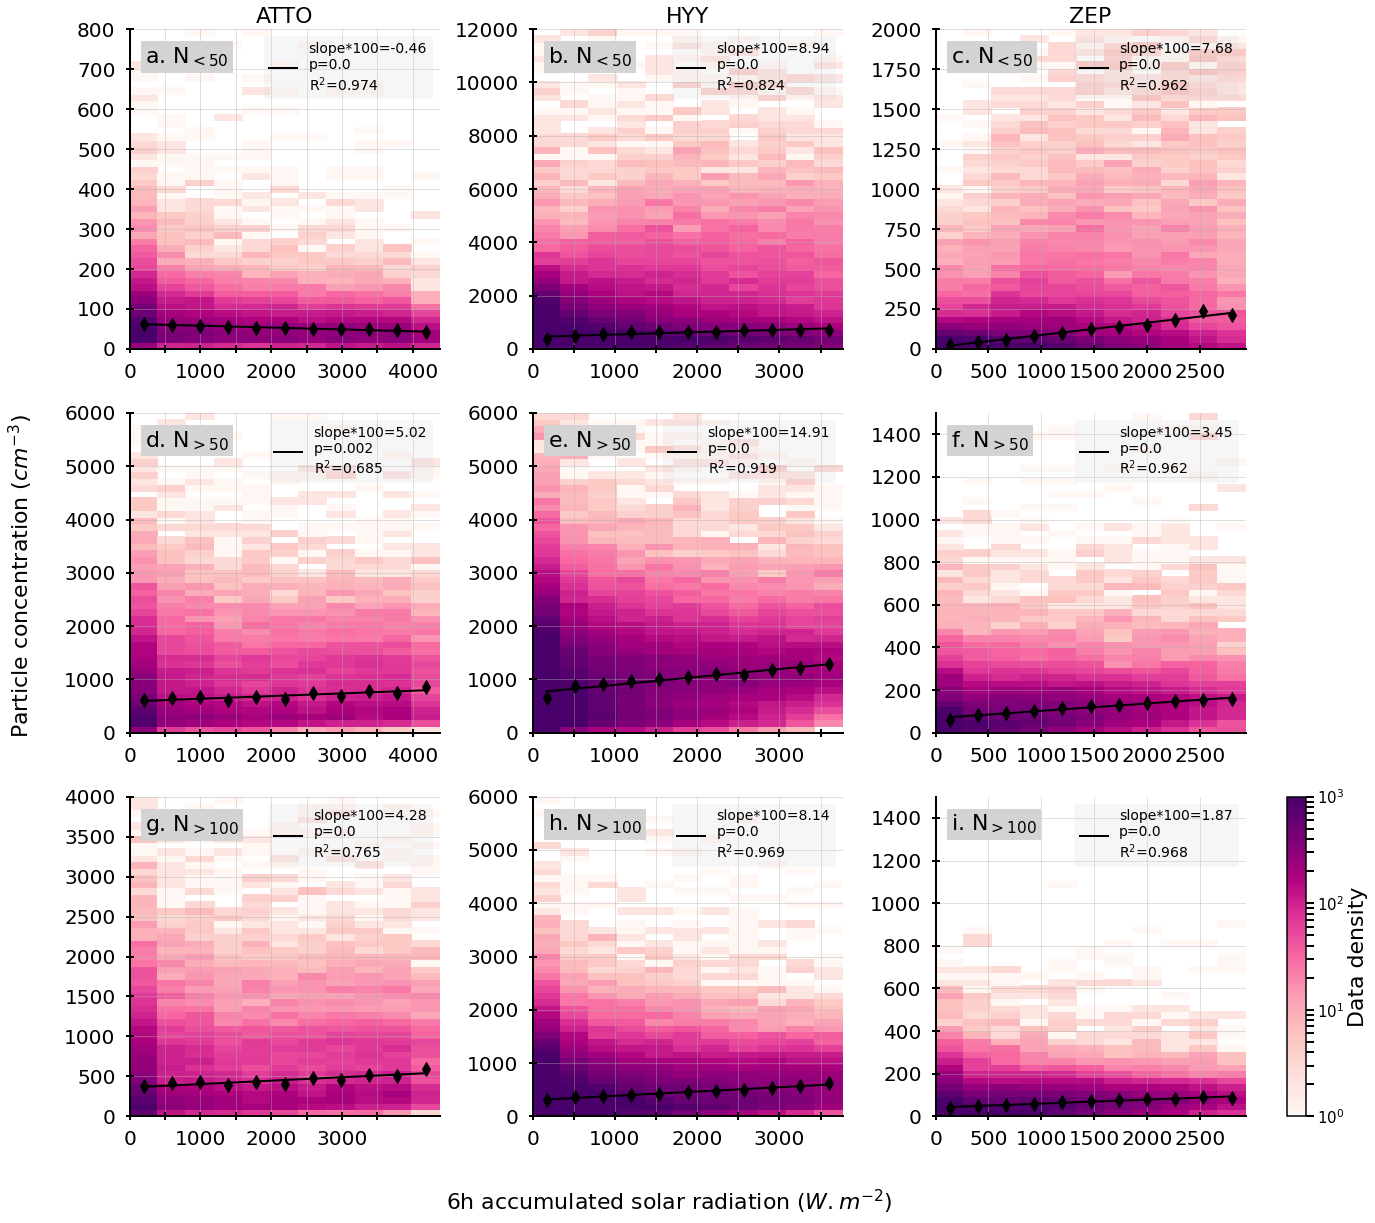

In [146]:
# function that maps the distribution of data for 2 variables and plots it with pcolor
def calculate_2D_density(df, varx, vary, xmin, xmax, ymin, ymax):
    bins_x = np.linspace(0, df[varx].quantile(q=0.99), 12)
    bins_y = np.linspace(ymin, ymax, 50)
    X, Y = np.meshgrid(bins_x, bins_y)
    
    array_counts = np.zeros((bins_x.shape[0], bins_y.shape[0]))*np.nan
    array_medians = np.zeros((bins_x.shape[0]-1))*np.nan
    array_means = np.zeros((bins_x.shape[0]-1))*np.nan
    x = [bins_x[i]+(bins_x[i+1]-bins_x[i])/2 for i in range(0, bins_x.shape[0]-1)]
    for i_x, bin_x in enumerate(bins_x[:-1]):
        array_medians[i_x] = df.loc[(df[varx]>bins_x[i_x]) & (df[varx]<=bins_x[i_x+1]), vary].median()
        array_means[i_x] = df.loc[(df[varx]>bins_x[i_x]) & (df[varx]<=bins_x[i_x+1]), vary].mean()
        for i_y, bin_y in enumerate(bins_y[:-1]):
            array_counts[i_x, i_y] = df[(df[varx]>bins_x[i_x]) & (df[varx]<=bins_x[i_x+1]) &
                                        (df[vary]>bins_y[i_y]) & (df[vary]<=bins_y[i_y+1])].shape[0]
    return array_counts, X, Y, x, array_medians, array_means
    
def plot_2D_density(array_counts, X, Y, ax):
    return ax.pcolor(X, Y, array_counts, cmap='RdPu', norm=matplotlib.colors.LogNorm(vmin=1, vmax=1000))
    

def plot_subplot(ax, array_counts, X, Y, x, array_medians, array_means, text):
    
    c = plot_2D_density(array_counts.T, X, Y, ax)

    ax.plot(x, array_medians, 'd', markersize=10, color='k')
    # ax.plot(x, array_means, 'd', markersize=10, color='blue')

    slope, intercept, r_value, p_value, std_err = linreg(x, array_medians)
    ax.plot(x, slope*np.array(x)+intercept, '-', color='k', linewidth=2, 
            label='slope*100='+str(round(slope*100, 2))+'\np='+str(round(p_value, 3))+'\nR'+r'$^2$='+str(round(r_value*r_value, 3)))
    ax.legend(loc='upper right', fontsize=14, frameon=True, facecolor='lightgrey', edgecolor='none', framealpha=0.2)

    ax.text(0.05, 0.95, text, transform=ax.transAxes, fontsize=22, verticalalignment='top', 
            bbox=dict(facecolor='lightgrey', edgecolor='none', alpha=1))

    fancy(ax)
    
fig = plt.figure(figsize=(20, 20))

ax = fig.add_subplot(3,3,1)
ax.set_title('ATTO', fontsize=22)
array_counts, X, Y, x, array_medians, array_means = calculate_2D_density(df_atto, 'Acc_solar_radiation_6h', 'N_10_50', 0, 10, 0, 800)
plot_subplot(ax, array_counts, X, Y, x, array_medians, array_means, r'a. N$_{<50}$')
# x tick labels with steps of 1000
ax.set_xticks(np.arange(0, 4500, 500))
ax.set_xticklabels([0, '', 1000 , '', 2000, '', 3000, '', 4000])

ax = fig.add_subplot(3,3,4)
array_counts, X, Y, x, array_medians, array_means = calculate_2D_density(df_atto, 'Acc_solar_radiation_6h', 'N_50_500', 0, 10, 0, 6000)
plot_subplot(ax, array_counts, X, Y, x, array_medians, array_means, r'd. N$_{>50}$')
ax.set_xticks(np.arange(0, 4500, 500))
ax.set_xticklabels([0, '', 1000 , '', 2000, '', 3000, '', 4000])

ax = fig.add_subplot(3,3,7)
array_counts, X, Y, x, array_medians, array_means = calculate_2D_density(df_atto, 'Acc_solar_radiation_6h', 'N_100_500', 0, 10, 0, 4000)
plot_subplot(ax, array_counts, X, Y, x, array_medians, array_means, r'g. N$_{>100}$')
ax.set_xticks(np.arange(0, 4000, 500))
ax.set_xticklabels([0, '', 1000 , '', 2000, '', 3000, '', 4000])


ax = fig.add_subplot(3,3,2)
ax.set_title('HYY', fontsize=22)
array_counts, X, Y, x, array_medians, array_means = calculate_2D_density(df_hyytiala, 'Acc_solar_radiation_6h', 'N_10_50', 0, 10, 0, 12000)
plot_subplot(ax, array_counts, X, Y, x, array_medians, array_means, r'b. N$_{<50}$')
ax.set_xticks(np.arange(0, 4000, 500))
ax.set_xticklabels([0, '', 1000 , '', 2000, '', 3000, ''])

ax = fig.add_subplot(3,3,5)
array_counts, X, Y, x, array_medians, array_means = calculate_2D_density(df_hyytiala, 'Acc_solar_radiation_6h', 'N_50_500', 0, 10, 0, 6000)
plot_subplot(ax, array_counts, X, Y, x, array_medians, array_means, r'e. N$_{>50}$')
ax.set_xticks(np.arange(0, 4000, 500))
ax.set_xticklabels([0, '', 1000 , '', 2000, '', 3000, ''])

ax = fig.add_subplot(3,3,8)
array_counts, X, Y, x, array_medians, array_means = calculate_2D_density(df_hyytiala, 'Acc_solar_radiation_6h', 'N_100_500', 0, 10, 0, 6000)
plot_subplot(ax, array_counts, X, Y, x, array_medians, array_means, r'h. N$_{>100}$')
ax.set_xticks(np.arange(0, 4000, 500))
ax.set_xticklabels([0, '', 1000 , '', 2000, '', 3000, ''])


ax = fig.add_subplot(3,3,3)
ax.set_title('ZEP', fontsize=22)
array_counts, X, Y, x, array_medians, array_means = calculate_2D_density(df_zeppelin, 'Acc_solar_radiation_6h', 'N_10_50', 0, 10, 0, 2000)
plot_subplot(ax, array_counts, X, Y, x, array_medians, array_means, r'c. N$_{<50}$')

ax = fig.add_subplot(3,3,6)
array_counts, X, Y, x, array_medians, array_means = calculate_2D_density(df_zeppelin, 'Acc_solar_radiation_6h', 'N_50_500', 0, 10, 0, 1500)
plot_subplot(ax, array_counts, X, Y, x, array_medians, array_means, r'f. N$_{>50}$')

ax = fig.add_subplot(3,3,9)
array_counts, X, Y, x, array_medians, array_means = calculate_2D_density(df_zeppelin, 'Acc_solar_radiation_6h', 'N_100_500', 0, 10, 0, 1500)
plot_subplot(ax, array_counts, X, Y, x, array_medians, array_means, r'i. N$_{>100}$')
############# COLORBAR properties ##############
# create the ax based on an ax dimensions
axins = inset_axes(ax,
                    width="6%",  
                    height="100%",
                    loc='right',
                    borderpad=-6
                   )
# add colorbar from ax
cbar = fig.colorbar(c, cax=axins, orientation='vertical')
# style(axins)
cbar.set_label('Data density', fontsize=22)

# thickness of spines around the colorbar
cbar.outline.set_linewidth(1.5)

style_cbar(axins)

plt.subplots_adjust(wspace=0.3, hspace=0.2)

# text bottom of the figure with r'6h accumulated solar radiation ($W.m^{-2}$)', fontsize=20
fig.text(0.5, 0.06, r'6h accumulated solar radiation ($W.m^{-2}$)', ha='center', fontsize=22)
# text left of the figure with (r'Particle concentration ($cm^{-3}$)', fontsize=20)
fig.text(0.04, 0.5, r'Particle concentration ($cm^{-3}$)', va='center', rotation='vertical', fontsize=22)

# save figure
path = '/Users/theodorekhadir/Documents/PHD/sinkVSsource/figures/'
fig.savefig(path+'distrib_N_solar_radiation.png', bbox_inches='tight', dpi=300)

## Fig. S4 | 6h Rainfall

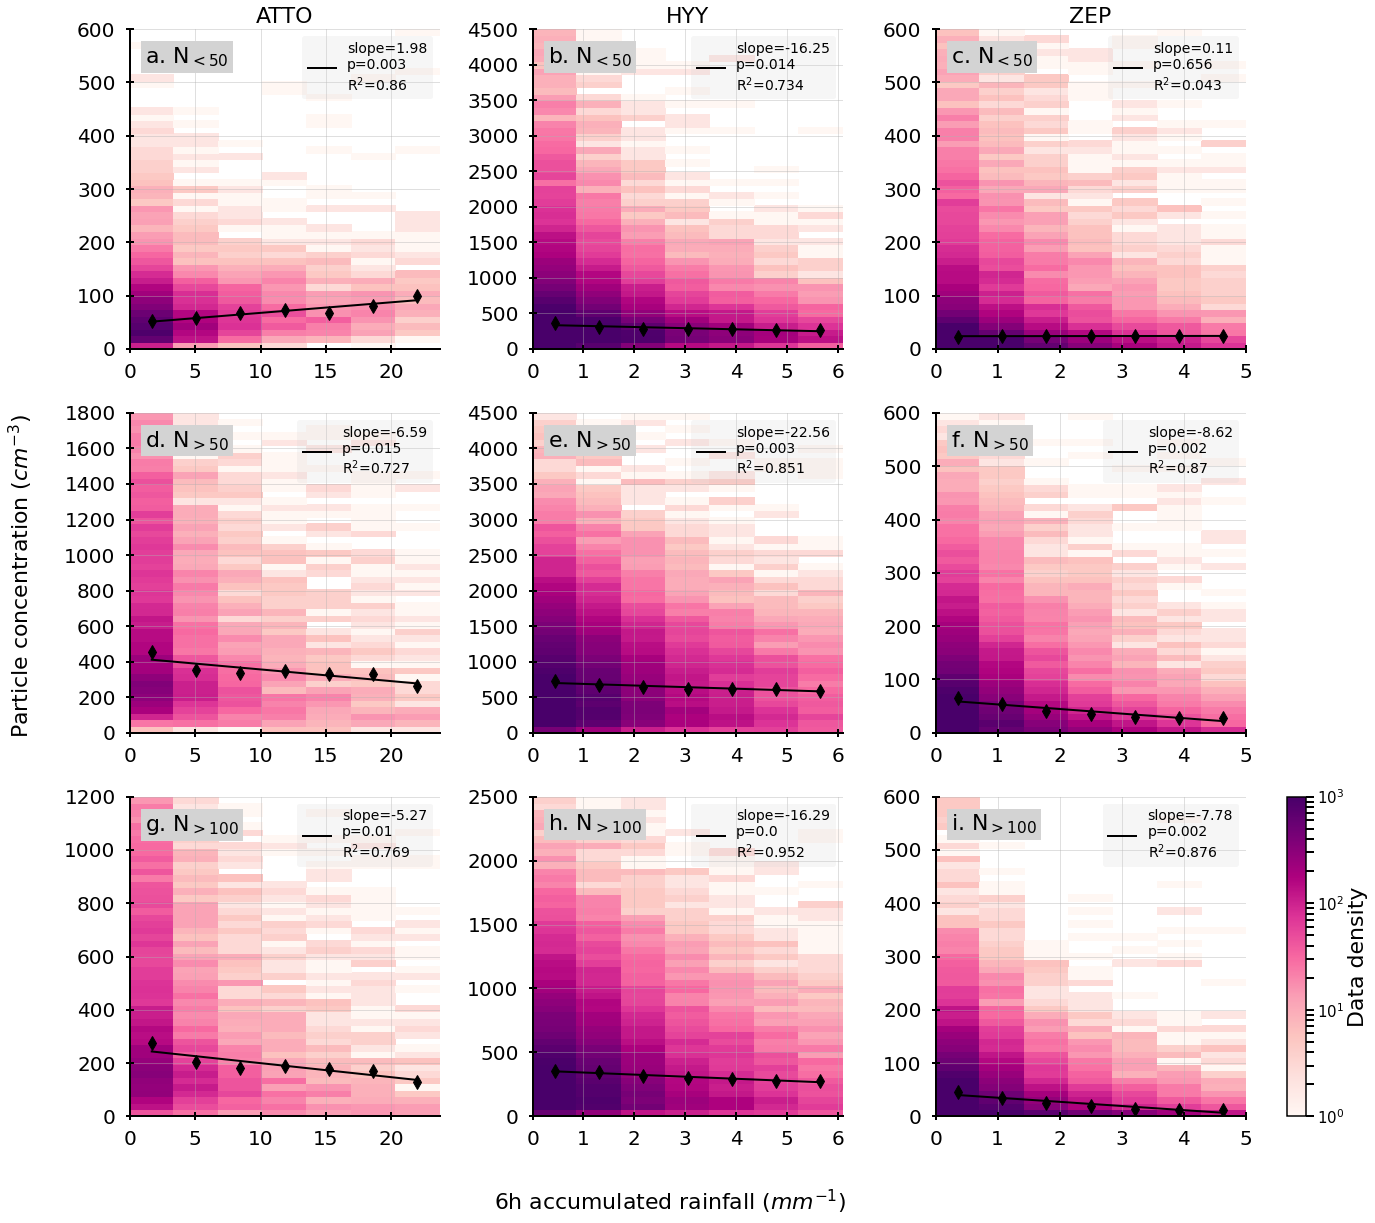

In [145]:
# function that maps the distribution of data for 2 variables and plots it with pcolor
def calculate_2D_density(df, varx, vary, xmin, xmax, ymin, ymax):
    bins_x = np.linspace(0, df[varx].quantile(q=0.99), 8)
    bins_y = np.linspace(ymin, ymax, 50)
    X, Y = np.meshgrid(bins_x, bins_y)
    
    array_counts = np.zeros((bins_x.shape[0], bins_y.shape[0]))*np.nan
    array_medians = np.zeros((bins_x.shape[0]-1))*np.nan
    array_means = np.zeros((bins_x.shape[0]-1))*np.nan
    x = [bins_x[i]+(bins_x[i+1]-bins_x[i])/2 for i in range(0, bins_x.shape[0]-1)]
    for i_x, bin_x in enumerate(bins_x[:-1]):
        array_medians[i_x] = df.loc[(df[varx]>bins_x[i_x]) & (df[varx]<=bins_x[i_x+1]), vary].median()
        array_means[i_x] = df.loc[(df[varx]>bins_x[i_x]) & (df[varx]<=bins_x[i_x+1]), vary].mean()
        for i_y, bin_y in enumerate(bins_y[:-1]):
            array_counts[i_x, i_y] = df[(df[varx]>bins_x[i_x]) & (df[varx]<=bins_x[i_x+1]) &
                                        (df[vary]>bins_y[i_y]) & (df[vary]<=bins_y[i_y+1])].shape[0]
    return array_counts, X, Y, x, array_medians, array_means
    
def plot_2D_density(array_counts, X, Y, ax):
    return ax.pcolor(X, Y, array_counts, cmap='RdPu', norm=matplotlib.colors.LogNorm(vmin=1, vmax=1000))
    

def plot_subplot(ax, array_counts, X, Y, x, array_medians, array_means, text):
    
    c = plot_2D_density(array_counts.T, X, Y, ax)

    ax.plot(x, array_medians, 'd', markersize=10, color='k')
    # ax.plot(x, array_means, 'd', markersize=10, color='blue')

    slope, intercept, r_value, p_value, std_err = linreg(x, array_medians)
    ax.plot(x, slope*np.array(x)+intercept, '-', color='k', linewidth=2, 
            label='slope='+str(round(slope, 2))+'\np='+str(round(p_value, 3))+'\nR'+r'$^2$='+str(round(r_value*r_value, 3)))
    ax.legend(loc='upper right', fontsize=14, frameon=True, facecolor='lightgrey', edgecolor='none', framealpha=0.2)

    ax.text(0.05, 0.95, text, transform=ax.transAxes, fontsize=22, verticalalignment='top', 
            bbox=dict(facecolor='lightgrey', edgecolor='none', alpha=1))

    fancy(ax)
    
fig = plt.figure(figsize=(20, 20))

ax = fig.add_subplot(3,3,1)
ax.set_title('ATTO', fontsize=22)
array_counts, X, Y, x, array_medians, array_means = calculate_2D_density(df_atto, 'Acc_rainfall_6h', 'N_10_50', 0, 10, 0, 600)
plot_subplot(ax, array_counts, X, Y, x, array_medians, array_means, r'a. N$_{<50}$')

ax = fig.add_subplot(3,3,4)
array_counts, X, Y, x, array_medians, array_means = calculate_2D_density(df_atto, 'Acc_rainfall_6h', 'N_50_500', 0, 10, 0, 1800)
plot_subplot(ax, array_counts, X, Y, x, array_medians, array_means, r'd. N$_{>50}$')

ax = fig.add_subplot(3,3,7)
array_counts, X, Y, x, array_medians, array_means = calculate_2D_density(df_atto, 'Acc_rainfall_6h', 'N_100_500', 0, 10, 0, 1200)
plot_subplot(ax, array_counts, X, Y, x, array_medians, array_means, r'g. N$_{>100}$')

ax = fig.add_subplot(3,3,2)
ax.set_title('HYY', fontsize=22)
array_counts, X, Y, x, array_medians, array_means = calculate_2D_density(df_hyytiala, 'Acc_rainfall_6h', 'N_10_50', 0, 10, 0, 4500)
plot_subplot(ax, array_counts, X, Y, x, array_medians, array_means, r'b. N$_{<50}$')

ax = fig.add_subplot(3,3,5)
array_counts, X, Y, x, array_medians, array_means = calculate_2D_density(df_hyytiala, 'Acc_rainfall_6h', 'N_50_500', 0, 10, 0, 4500)
plot_subplot(ax, array_counts, X, Y, x, array_medians, array_means, r'e. N$_{>50}$')

ax = fig.add_subplot(3,3,8)
array_counts, X, Y, x, array_medians, array_means = calculate_2D_density(df_hyytiala, 'Acc_rainfall_6h', 'N_100_500', 0, 10, 0, 2500)
plot_subplot(ax, array_counts, X, Y, x, array_medians, array_means, r'h. N$_{>100}$')

ax = fig.add_subplot(3,3,3)
ax.set_title('ZEP', fontsize=22)
array_counts, X, Y, x, array_medians, array_means = calculate_2D_density(df_zeppelin, 'Acc_rainfall_6h', 'N_10_50', 0, 10, 0, 600)
plot_subplot(ax, array_counts, X, Y, x, array_medians, array_means, r'c. N$_{<50}$')

ax = fig.add_subplot(3,3,6)
array_counts, X, Y, x, array_medians, array_means = calculate_2D_density(df_zeppelin, 'Acc_rainfall_6h', 'N_50_500', 0, 10, 0, 600)
plot_subplot(ax, array_counts, X, Y, x, array_medians, array_means, r'f. N$_{>50}$')

ax = fig.add_subplot(3,3,9)
array_counts, X, Y, x, array_medians, array_means = calculate_2D_density(df_zeppelin, 'Acc_rainfall_6h', 'N_100_500', 0, 10, 0, 600)
plot_subplot(ax, array_counts, X, Y, x, array_medians, array_means, r'i. N$_{>100}$')

############# COLORBAR properties #############
# create the ax based on an ax dimensions
axins = inset_axes(ax,
                    width="6%",  
                    height="100%",
                    loc='right',
                    borderpad=-6
                   )
# add colorbar from ax
cbar = fig.colorbar(c, cax=axins, orientation='vertical')
# style(axins)
cbar.set_label('Data density', fontsize=22)

# thickness of spines around the colorbar
cbar.outline.set_linewidth(1.5)

style_cbar(axins)

plt.subplots_adjust(wspace=0.3, hspace=0.2)

# text bottom of the figure with r'6h accumulated solar radiation ($W.m^{-2}$)', fontsize=20
fig.text(0.5, 0.06, r'6h accumulated rainfall ($mm^{-1}$)', ha='center', fontsize=22)
# text left of the figure with (r'Particle concentration ($cm^{-3}$)', fontsize=20)
fig.text(0.04, 0.5, r'Particle concentration ($cm^{-3}$)', va='center', rotation='vertical', fontsize=22)

# save figure
path = '/Users/theodorekhadir/Documents/PHD/sinkVSsource/figures/'
fig.savefig(path+'distrib_N_rainfall.png', bbox_inches='tight', dpi=300)

# 3. Fig. 4 | Recent rainfall and solar radiation versus particle concentrations

In [147]:
# normalize concentration with reference value
def normalize(ds, xvar, yvar, val_ref):
    ds[yvar+'_norm_'+xvar] = (['time'], ds[yvar].values/val_ref*100)
    
# calculate medians in bins of a given variables
def median_bins(ds, xvar, yvar, nbins):
    ds_slice = ds.copy()
    val_ref = ds_slice[yvar].median().values
    
    normalize(ds_slice, xvar, yvar, val_ref)
    bins = np.linspace(ds_slice[xvar].quantile(0.0), ds_slice[xvar].quantile(0.99), nbins)
    mid_bins = (bins[1:]+bins[:-1])/2
    
    # find median of yvar in each bin of yvar in ds_slice
    medians = []
    ndata_medians = []
    for i in range(len(bins)-1):
        slice = ds_slice.sel(time=(ds_slice[xvar].values>bins[i]) & 
                             (ds_slice[xvar].values<=bins[i+1]))[yvar+'_norm_'+xvar]
        medians.append(slice.median().values)
        ndata_medians.append(slice.shape[0])
        
    # add to the first element of mid_bins: 0
    mid_bins = np.insert(mid_bins, 0, 0)
    medians = np.insert(medians, 0, ds_slice.sel(time=ds_slice[xvar]==0)[yvar+'_norm_'+xvar].median().values)
        
    return mid_bins, medians, ndata_medians, ds_slice

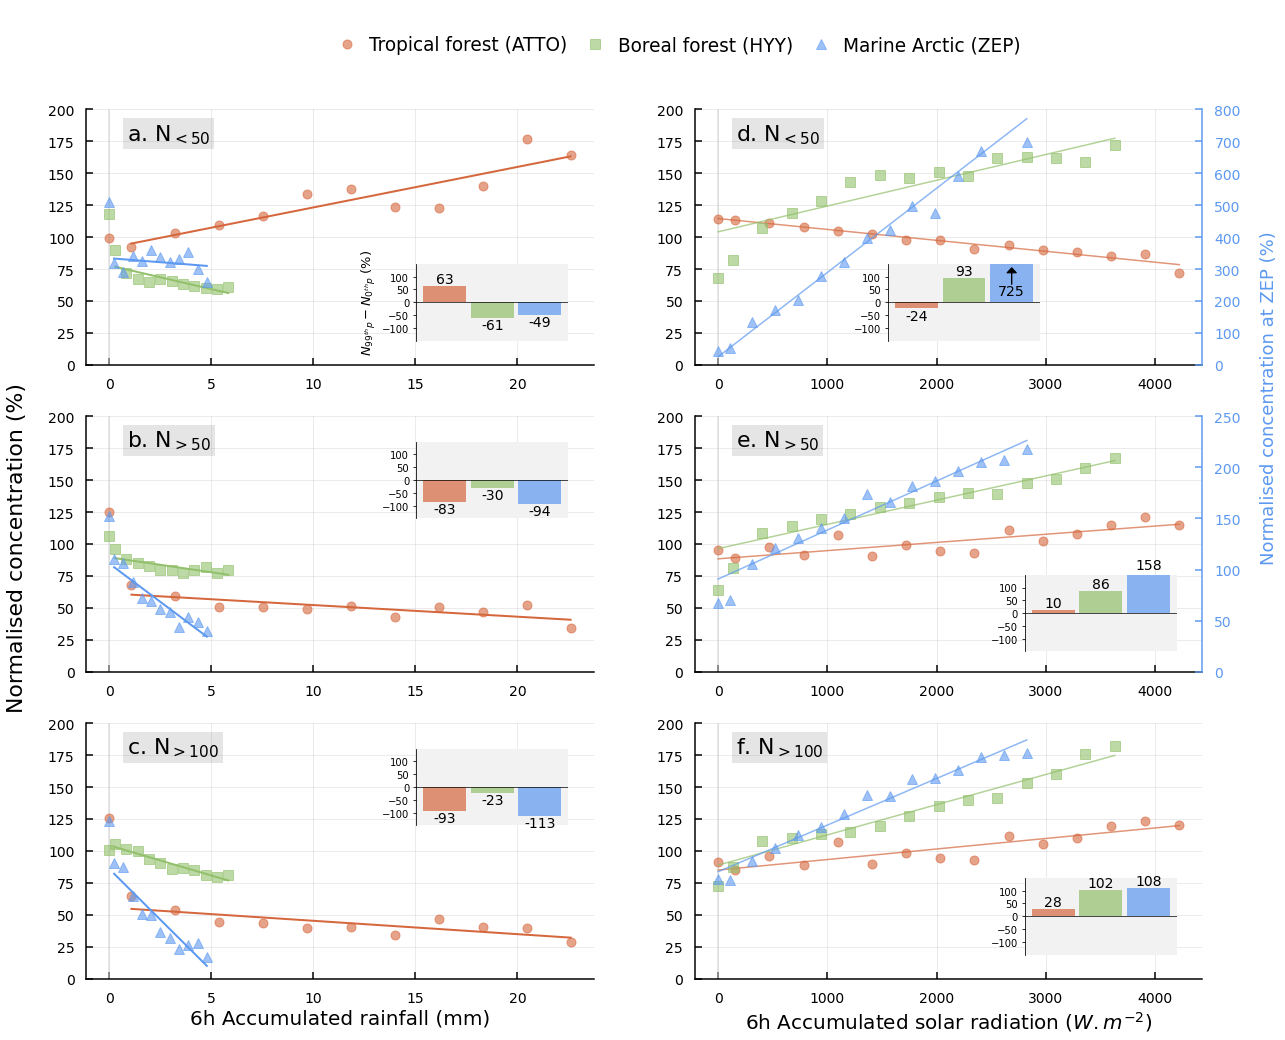

In [158]:
from scipy import stats

def style(ax):
    fontsize = 14
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(1.5)
        ax.spines[axis].set_color('k')
    # remove top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(direction='in', length=7, width=1.5, pad=12, bottom=True, top=False, 
                   left=True, right=False, labelsize=fontsize)
    ax.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.3)

# indexes are: xvar_change, yvar_change
df_precip = pd.DataFrame(columns=['N_10_50 ATTO', 'N_10_50 HYY', 'N_10_50 ZEP', 'N_50_500 ATTO', 'N_50_500 HYY', 'N_50_500 ZEP', 'N_100_500 ATTO', 'N_100_500 HYY', 'N_100_500 ZEP'],
                        index=['xvar_change', 'yvar_change'])
df_sr = pd.DataFrame(columns=['N_10_50 ATTO', 'N_10_50 HYY', 'N_10_50 ZEP', 'N_50_500 ATTO', 'N_50_500 HYY', 'N_50_500 ZEP', 'N_100_500 ATTO', 'N_100_500 HYY', 'N_100_500 ZEP'],
                        index=['xvar_change', 'yvar_change', 'yvarnorm_change'])
                           
def plot_median_bins2(ax1, ax2, xvar, yvar, list_nbins, list_ds, loc):
    list_mid_bins = []
    list_medians = []
    list_ndata_medians = []
    list_ds_slice = []
    for ds, nbins in zip(list_ds, list_nbins):    
        mid_bins, medians, ndata_medians, ds_slice = median_bins(ds, xvar, yvar, nbins)
        list_mid_bins.append(mid_bins)
        list_medians.append(medians)
        list_ndata_medians.append(ndata_medians)
        list_ds_slice.append(ds_slice)
    
    colors = [(213/255, 103/255, 61/255), (146/255, 192/255, 107/255), (93/255, 153/255, 240/255)]   
    markers = ['o', 's', '^']
    markersizes = [9, 10, 10]
    stations = ['Tropical forest (ATTO)', 'Boreal forest (HYY)', 'Marine Arctic (ZEP)']
    stations2 = ['ATTO', 'HYY', 'ZEP']
    
    # draw a light grey vertical line at x=0
    ax.axvline(x=0, color='lightgrey', linewidth=1.5, alpha=0.7)
    
    df = pd.DataFrame(columns=stations2)
    
    for i in range(2):
        # remove nan from list_medians
        X = np.array(list_mid_bins[i])
        Y = np.array(list_medians[i])
        X = X[~np.isnan(Y)]
        Y = Y[~np.isnan(Y)]
        # linear regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(X[1:], Y[1:])
        
        ax.plot(list_mid_bins[i], list_medians[i], 'o', color=colors[i], marker=markers[i],
        markersize=markersizes[i], markeredgecolor=colors[i], alpha=0.6, label=stations[i])
        ax.plot(list_mid_bins[i], slope*np.array(list_mid_bins[i])+intercept, '-', color=colors[i], linewidth=1.5, alpha=0.7)
        df.loc[0, stations2[i]] = (slope*np.array(list_mid_bins[2][-1])+intercept)-Y[0]
        
    # remove nan from list_medians
    X = np.array(list_mid_bins[2])
    Y = np.array(list_medians[2])
    X = X[~np.isnan(Y)]
    Y = Y[~np.isnan(Y)]
    # linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(X[1:], Y[1:])
        
    ax2.plot(list_mid_bins[2], list_medians[2], 'o', color=colors[2], marker=markers[2],
    markersize=markersizes[2], markeredgecolor=colors[2], alpha=0.6, label=stations[2])
    ax2.plot(list_mid_bins[2], slope*np.array(list_mid_bins[2])+intercept, '-', color=colors[2], linewidth=1.5, alpha=0.7)
    df.loc[0, stations2[2]] = (slope*np.array(list_mid_bins[2][-1])+intercept)-Y[0]

    style(ax)
    return df
                  
def plot_median_bins(ax, xvar, yvar, list_nbins, list_ds, loc):
    list_mid_bins = []
    list_medians = []
    list_ndata_medians = []
    list_ds_slice = []
    for ds, nbins in zip(list_ds, list_nbins):    
        mid_bins, medians, ndata_medians, ds_slice = median_bins(ds, xvar, yvar, nbins)
        list_mid_bins.append(mid_bins)
        list_medians.append(medians)
        list_ndata_medians.append(ndata_medians)
        list_ds_slice.append(ds_slice)
    
    colors = [(213/255, 103/255, 61/255), (146/255, 192/255, 107/255), (93/255, 153/255, 240/255)]   
    markers = ['o', 's', '^']
    markersizes = [9, 10, 10]
    stations = ['Tropical forest (ATTO)', 'Boreal forest (HYY)', 'Marine Arctic (ZEP)']
    stations2 = ['ATTO', 'HYY', 'ZEP']
    
    # draw a light grey vertical line at x=0
    ax.axvline(x=0, color='lightgrey', linewidth=1.5, alpha=0.7)
    
    df = pd.DataFrame(columns=stations2)
    
    for i in range(3):
        # remove nan from list_medians
        X = np.array(list_mid_bins[i])
        Y = np.array(list_medians[i])
        X = X[~np.isnan(Y)]
        Y = Y[~np.isnan(Y)]
        # linear regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(X[1:], Y[1:])
        
        if xvar=='Acc_solar_radiation_6h':
                ax.plot(list_mid_bins[i], list_medians[i], 'o', color=colors[i], marker=markers[i],
                markersize=markersizes[i], markeredgecolor=colors[i], alpha=0.6, label=stations[i])
                ax.plot(list_mid_bins[i], slope*np.array(list_mid_bins[i])+intercept, '-', color=colors[i], linewidth=1.5, alpha=0.7)#,
                df.loc[0, stations2[i]] = (slope*np.array(list_mid_bins[i][-1])+intercept)-Y[0]
                
        else:
                ax.plot(list_mid_bins[i], list_medians[i], 'o', color=colors[i], marker=markers[i],
                markersize=markersizes[i], markeredgecolor=colors[i], alpha=0.6, label=stations[i])
                ax.plot(list_mid_bins[i][1:], slope*np.array(list_mid_bins[i][1:])+intercept, '-', color=colors[i], linewidth=2)
                df.loc[0, stations2[i]] = (slope*np.array(list_mid_bins[i][-1])+intercept)-Y[0]

    style(ax)
    return df

def ax_twin(ax):
        ax2 = ax.twinx()
        # show this ax on the right side of the plot and in blue
        ax2.spines['right'].set_position(('axes', 1.0))
        ax2.spines['right'].set_color((93/255, 153/255, 240/255))
        ax2.spines['right'].set_linewidth(1.5)
        ax2.spines['left'].set_visible(False)
        ax2.spines['top'].set_visible(False)
        ax2.spines['bottom'].set_visible(False)
        fontsize = 14
        ax2.tick_params(direction='in', length=7, width=1.5, pad=12, bottom=False, top=False, 
                        left=False, right=True, labelsize=fontsize)
        # ticks in blue
        ax2.tick_params(axis='y', colors=(93/255, 153/255, 240/255))
        return ax2

def bar_plot(ax, df, xloc, yloc):
    ax.bar([0,1,2], df.loc[0,:], width=0.9, color=[(213/255, 103/255, 61/255), 
                                                      (146/255, 192/255, 107/255), 
                                                      (93/255, 153/255, 240/255)], alpha=0.7)
    
    def write_number(ax, element, height):
        if height>0 and height<200:
            ax.text(element, height+0.5, str(int(height)), ha='center', va='bottom', fontsize=14)
        elif height<0:
            ax.text(element, height-0.5, str(int(height)), ha='center', va='top', fontsize=14)
        else:
            # color of the arrow is blue
            ax.arrow(i, 70, 0, 45, head_width=0.2, head_length=20, fc='k', ec='k')
            ax.text(element, 70-0.5, str(int(height)), ha='center', va='top', fontsize=14)
    
    for i in range(3):
        write_number(ax, i, df.loc[0,:][i])
              
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.axhline(y=0, color='k', linewidth=0.7)
    ax.set_xticks([])
    ax.set_yticks([-100,-50,0,50,100])
    ax.set_ylim([-150,150])
    # add very light grey background facecolor
    ax.set_facecolor((0.95, 0.95, 0.95))

fig = plt.figure(figsize=(20,16))
list_nbins = [12,12,12]
list_ds = [ds_atto, ds_hyytiala, ds_zeppelin]
ax = fig.add_subplot(321)
ax.text(0.08, 0.95, r'a. N$_{<50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
df = plot_median_bins(ax, 'Acc_rainfall_6h', 'N_10_50', list_nbins, list_ds, 'upper right')
ax.set_ylim([0, 200])
ax3 = ax.inset_axes([0.65, 0.095, 0.3, 0.3])
bar_plot(ax3, df, 0.5, 0.5)
ax3.set_ylabel(r'$N_{99^{th}p}-N_{0^{th}p}$ (%)', fontsize=13)

ax = fig.add_subplot(323)
ax.text(0.08, 0.95, r'b. N$_{>50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
df = plot_median_bins(ax, 'Acc_rainfall_6h', 'N_50_500', list_nbins, list_ds, 'upper right')
ax.set_ylim([0, 200])
ax3 = ax.inset_axes([0.65, 0.6, 0.3, 0.3])
bar_plot(ax3, df, 0.5, 0.5)

ax = fig.add_subplot(325)
ax.text(0.08, 0.95, r'c. N$_{>100}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
df = plot_median_bins(ax, 'Acc_rainfall_6h', 'N_100_500', list_nbins, list_ds, 'upper right')
ax.set_ylim([0, 200])
ax3 = ax.inset_axes([0.65, 0.6, 0.3, 0.3])
bar_plot(ax3, df, 0.5, 0.5)

ax.set_xlabel(r'6h Accumulated rainfall (mm)', fontsize=20)

list_nbins = [15,15,15]
ax = fig.add_subplot(322)
list_ds = [ds_atto, ds_hyytiala, ds_zeppelin]
ax.text(0.08, 0.95, r'd. N$_{<50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
ax.set_ylim([0, 200])
ax2 = ax_twin(ax)
df = plot_median_bins2(ax, ax2, 'Acc_solar_radiation_6h', 'N_10_50', list_nbins, list_ds, 'upper right')
ax2.set_ylim([0, 800])
ax3 = ax.inset_axes([0.38, 0.095, 0.3, 0.3])
bar_plot(ax3, df, 0.5, 0.5)

ax = fig.add_subplot(324)
ax.text(0.08, 0.95, r'e. N$_{>50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
ax.set_ylim([0, 200])
ax2 = ax_twin(ax)
df = plot_median_bins2(ax, ax2, 'Acc_solar_radiation_6h', 'N_50_500', list_nbins, list_ds, 'upper right')
ax2.set_ylim([0, 250])
ax3 = ax.inset_axes([0.65, 0.08, 0.3, 0.3])
bar_plot(ax3, df, 0.5, 0.5)

ax = fig.add_subplot(326)
ax.text(0.08, 0.95, r'f. N$_{>100}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
df = plot_median_bins(ax, 'Acc_solar_radiation_6h', 'N_100_500', list_nbins, list_ds, 'upper right')
ax.set_ylim([0, 200])
ax3 = ax.inset_axes([0.65, 0.095, 0.3, 0.3])
bar_plot(ax3, df, 0.5, 0.5)
# set sup bound only
# ax.set_ylim(top=130)
ax.set_xlabel(r'6h Accumulated solar radiation $(W.m^{-2})$', fontsize=20)

fig.text(0.07, 0.5, 'Normalised concentration (%)', va='center', rotation='vertical', fontsize=22)
fig.text(0.94, 0.63, 'Normalised concentration at ZEP (%)', va='center', rotation=90, fontsize=18, color=(93/255, 153/255, 240/255))

# loc as a pair of floats 
# adjust space between columns
fig.legend(handles=ax.get_legend_handles_labels()[0], loc = (0.25, 0.94), ncol=3, fontsize=18.5, frameon=True, facecolor='lightgrey', edgecolor='none', framealpha=0.,
                  columnspacing=0.5, handletextpad=0.2, labelspacing=0.2)

path = '/Users/theodorekhadir/Documents/PHD/sinkVSsource/figures/'
# save figure
fig.savefig(path+'fig4_6h.png', bbox_inches='tight', dpi=300)

# Fig. S6 | Distributions of accumulated rainfall and solar radiation along back trajectories

## rainfall

In [222]:
# slices of the dataset for each station
def select_seasons(list_month, ds):
    ds_season = ds.sel(time=ds.time.dt.month.isin(list_month))
    return ds_season

ds_atto_wet = select_seasons([2,3,4,5], ds_atto)
ds_atto_wet2dry = select_seasons([6,7], ds_atto)
ds_atto_dry = select_seasons([8,9,10,11], ds_atto)
ds_atto_dry2wet = select_seasons([12,1], ds_atto)
ds_atto_seasons = [ds_atto_wet, ds_atto_wet2dry, ds_atto_dry, ds_atto_dry2wet]

ds_hyytiala_djf = select_seasons([12,1,2], ds_hyytiala)
ds_hyytiala_mam = select_seasons([3,4,5], ds_hyytiala)
ds_hyytiala_jja = select_seasons([6,7,8], ds_hyytiala)
ds_hyytiala_son = select_seasons([9,10,11], ds_hyytiala)
ds_hyytiala_seasons = [ds_hyytiala_djf, ds_hyytiala_mam, ds_hyytiala_jja, ds_hyytiala_son]

ds_zeppelin_jjas = select_seasons([6,7,8, 9], ds_zeppelin)
ds_zeppelin_ondj = select_seasons([10,11,12,1], ds_zeppelin)
ds_zeppelin_fmam = select_seasons([2,3,4,5], ds_zeppelin)
ds_zeppelin_seasons = [ds_zeppelin_jjas, ds_zeppelin_ondj, ds_zeppelin_fmam]

In [336]:

# ATTO
list_ds_atto = [ds_atto_wet, ds_atto_wet2dry, ds_atto_dry, ds_atto_dry2wet]
# find in all ds the highest .quantile(0.99) for the variable 'Acc_rainfall_6h'
max_rain = 0
for ds in list_ds_atto:
    if ds['Acc_rainfall_6h'].quantile(0.99) > max_rain:
        max_rain = ds['Acc_rainfall_6h'].quantile(0.995)

list_groupby_atto = []
lim_bin_atto = max_rain.values
width_bin_atto = 2.5
bins = np.arange(0, lim_bin_atto, width_bin_atto)
for iseason, ds_season in enumerate(list_ds_atto):
    prop = (ds_season.groupby_bins('Acc_rainfall_6h', bins).count()['Acc_solar_radiation_12h']/len(ds_season['Acc_rainfall_6h'])*100).values
    list_groupby_atto.append(prop)
 
# HYY
list_ds_hyytiala = [ds_hyytiala_djf, ds_hyytiala_mam, ds_hyytiala_jja, ds_hyytiala_son]
# find in all ds the highest .quantile(0.99) for the variable 'Acc_rainfall_6h'
max_rain = 0
for ds in list_ds_hyytiala:
    if ds['Acc_rainfall_6h'].quantile(0.99) > max_rain:
        max_rain = ds['Acc_rainfall_6h'].quantile(0.995)

list_groupby_hyytiala = []
lim_bin_hyytiala = max_rain.values
width_bin_hyytiala = 0.5
bins = np.arange(0, lim_bin_hyytiala, width_bin_hyytiala)
for iseason, ds_season in enumerate(list_ds_hyytiala):
    prop = (ds_season.groupby_bins('Acc_rainfall_6h', bins).count()['Acc_solar_radiation_12h']/len(ds_season['Acc_rainfall_6h'])*100).values
    list_groupby_hyytiala.append(prop)

# ZEP
list_ds_zeppelin = [ds_zeppelin_jjas, ds_zeppelin_ondj, ds_zeppelin_fmam]
# find in all ds the highest .quantile(0.99) for the variable 'Acc_rainfall_6h'
max_rain = 0
for ds in list_ds_zeppelin:
    if ds['Acc_rainfall_6h'].quantile(0.99) > max_rain:
        max_rain = ds['Acc_rainfall_6h'].quantile(0.995)

list_groupby_zeppelin = []
lim_bin_zeppelin = max_rain.values
width_bin_zeppelin = 0.5
bins = np.arange(0, lim_bin_zeppelin, width_bin_zeppelin)
for iseason, ds_season in enumerate(list_ds_zeppelin):
    prop = (ds_season.groupby_bins('Acc_rainfall_6h', bins).count()['Acc_solar_radiation_12h']/len(ds_season['Acc_rainfall_6h'])*100).values
    list_groupby_zeppelin.append(prop)

In [299]:
def thickax(ax):
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.3)
        ax.spines[axis].set_color('k')
    plt.rc('axes', linewidth=0.2)
    fontsize = 12.5
    ax = plt.gca()
    ax.tick_params(direction='out', length=8, width=1.3, pad=10, bottom=True, top=False, left=True, right=False, color='k')
    ax.tick_params(which='minor', length=4, color='k', width=1.3)
    

# create a figure with a bar plot with the proportion of 'Acc_rainfall_96h' in given rainfall bins
# each season is represented by a different color
def bar_plot(ax, list_groupby_station, list_ds_seasons, bins_rainfall, list_seasons, list_colors, width=1, pos_zero=-7):
    for iseason, ds_season in enumerate(list_ds_seasons):
        prop = list_groupby_station[iseason]
        bins_plot = bins_rainfall
        ax.bar(bins_plot[:-1]+(iseason-1)*width, prop,
                width=width, color=list_colors[iseason], label=list_seasons[iseason], edgecolor='k', linewidth=0.5)
    
    # legend
    # semi transparent frame light grey
    l = ax.legend(frameon=False, fontsize=14, title='Season', loc='upper right')
    plt.setp(l.get_title(),fontsize=15)
    
    for iseason, ds_season in enumerate(list_ds_seasons):
        prop = len(ds_season.sel(time=ds_season['Acc_rainfall_6h']==0).time)/len(ds_season.time)*100
        ax.bar(pos_zero-width/2*3+iseason*width, prop,
            width=width, color=list_colors[iseason], edgecolor='k', linewidth=0.5)
        
def plot_bars_seasons(ax, list_groupby_station, list_ds_seasons, list_seasons, list_colors, lim_bin, width_bin, width, pos_zero=-7):
    bins = np.arange(0, lim_bin, width_bin)
    xticks = bar_plot(ax, list_groupby_station, list_ds_seasons, bins, list_seasons, list_colors, width=width, pos_zero=pos_zero)
    if len(list_seasons) == 4:
        list_xlabels = ['>'+str(low_lim)+'\n≤'+str(up_lim) for low_lim, 
                        up_lim in zip(np.arange(0, lim_bin+width_bin, width_bin)[:-1], np.arange(0, lim_bin+width_bin, width_bin)[1:])]
        # remove blank space between r'$\geq$' and the number in list_xlabels
        list_xlabels = [x.replace(' ', '') for x in list_xlabels]
        list_xlabels[1::2] = ['']*len(list_xlabels[1::2])
        list_xlabels = [r'$=0$']+list_xlabels
        ax.set_xticks(np.insert(bins, 0, pos_zero))
        ax.set_xticklabels(list_xlabels, fontsize=15)
    else:
        ax.set_xticks([-1.61]+np.arange(-0.11,14.11,1).tolist())
        list_xlabels = ['>'+str(low_lim)+'\n≤'+str(up_lim) for low_lim, 
                                up_lim in zip(np.arange(0, lim_bin+width_bin, width_bin)[:-1], np.arange(0, lim_bin+width_bin, width_bin)[1:])]
        list_xlabels = [x.replace(' ', '') for x in list_xlabels]
        list_xlabels[1::2] = ['']*len(list_xlabels[1::2])
        list_xlabels = [r'$=0$']+list_xlabels
        ax.set_xticklabels(list_xlabels, fontsize=15)
    # fontsize y ticks label
    ax.tick_params(axis='y', labelsize=15)
    # x label
    ax.set_xlabel('6h accumulated rainfall (mm)', fontsize=16.5)
    thickax(ax)

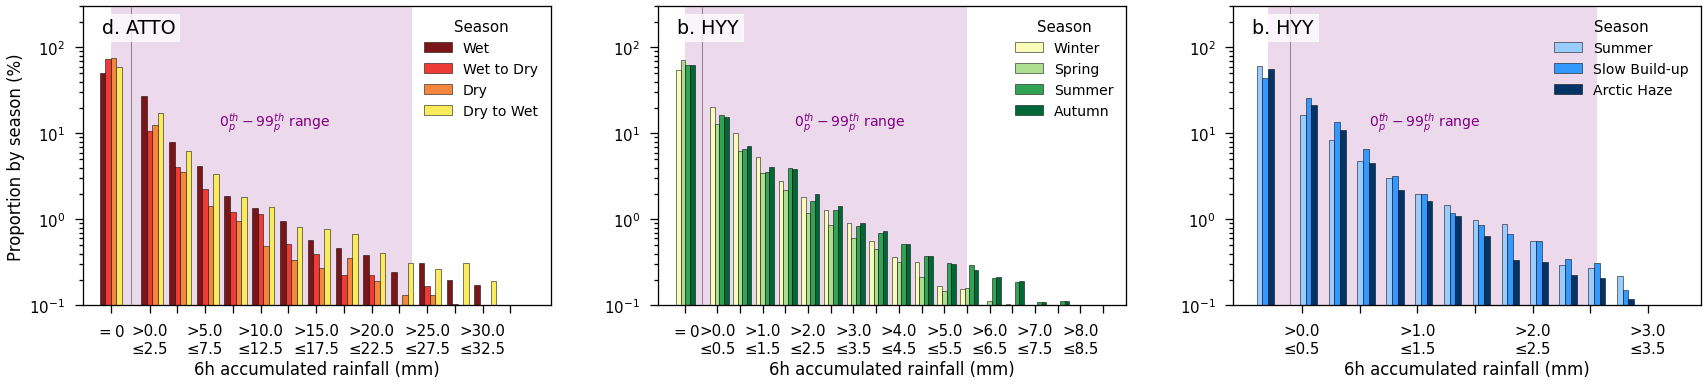

In [338]:
from turtle import title


def thickax_pink_plot(ax):
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.3)
        ax.spines[axis].set_color('k')
    plt.rc('axes', linewidth=0.2)
    fontsize = 16.5
    ax = plt.gca()
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    ax.tick_params(direction='out', length=8, width=1.3, pad=10, bottom=True, top=False, left=True, right=False, color='k')
    ax.tick_params(which='minor', length=4, color='k', width=1.3)
    
fig = plt.figure(num=None, figsize=(29, 5.5))

# ATTO
ax = plt.subplot(1,3,1)

list_colors = [(122/255, 22/255, 24/255), (237/255, 59/255, 53/255), (245/255, 134/255, 61/255), (248/255, 235/255, 92/255)]
list_seasons = ['Wet', 'Wet to Dry', 'Dry', 'Dry to Wet']
ax.axvspan(xmin=-3.5, xmax=ds_atto['Acc_rainfall_6h'].quantile(0.99), facecolor='purple', alpha=0.15)
plot_bars_seasons(ax, list_groupby_atto, ds_atto_seasons, list_seasons, list_colors, lim_bin_atto, 
                  width_bin_atto, 0.5, pos_zero=-3.5)
ax.set_ylabel('Proportion by season (%)', fontsize=16.5)
ax.set_xlim(-6, lim_bin_atto-width_bin_atto-0.1+4)
# ax.set_xlim(-7, lim_bin_atto-width_bin_atto-0.1)
ax.axvline(-1.65, color='k', linewidth=1, alpha=0.4)
ax.text(0.04, 0.96, 'd. ATTO', transform=ax.transAxes, fontsize=19,
        va='top', bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))
# y log scale
ax.set_yscale('log')
ax.set_ylim([0.1, 300])
# write text on the upper center of the plot
ax.text(0.29, 0.6, r'$0^{th}_{p}-99^{th}_{p}$ range', transform=ax.transAxes, fontsize=14, color='purple')

# HYY
ax = plt.subplot(1,3,2)

list_colors = ['#f7fcb9','#addd8e','#31a354','#006837'] 
list_seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
ax.axvspan(xmin=-0.7, xmax=ds_hyytiala['Acc_rainfall_6h'].quantile(0.99), facecolor='purple', alpha=0.15)
plot_bars_seasons(ax, list_groupby_hyytiala, ds_hyytiala_seasons, list_seasons, list_colors, lim_bin_hyytiala, 
                  width_bin_hyytiala, 0.1, pos_zero=-0.7)
ax.set_xlim(-1.3, lim_bin_hyytiala-width_bin_hyytiala-0.1+1)
# ax.set_xlim(-7, lim_bin_hyytiala-width_bin_hyytiala-0.1)
ax.axvline(-0.325, color='k', linewidth=1, alpha=0.4)
ax.text(0.04, 0.96, 'b. HYY', transform=ax.transAxes, fontsize=19,
        va='top', bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))
# y log scale
ax.set_yscale('log')
ax.set_ylim([0.1, 300])
# write text on the upper center of the plot
ax.text(0.29, 0.6, r'$0^{th}_{p}-99^{th}_{p}$ range', transform=ax.transAxes, fontsize=14, color='purple')

# ZEP
ax = plt.subplot(1,3,3)

list_colors = ['#99ccff', '#3399ff', '#003366']
list_seasons = ['Summer', 'Slow Build-up', 'Arctic Haze']
ax.axvspan(xmin=-0.7, xmax=ds_zeppelin['Acc_rainfall_6h'].quantile(0.99), facecolor='purple', alpha=0.15)
plot_bars_seasons(ax, list_groupby_zeppelin, ds_zeppelin_seasons, list_seasons, list_colors, lim_bin_zeppelin, 
                  width_bin_zeppelin, 0.1, pos_zero=-0.7)
ax.set_xlim(-1.3, lim_bin_zeppelin-width_bin_zeppelin-0.1+1)
# ax.set_xlim(-7, lim_bin_zeppelin-width_bin_zeppelin-0.1)
ax.axvline(-0.325, color='k', linewidth=1, alpha=0.4)
ax.text(0.04, 0.96, 'c. ZEP', transform=ax.transAxes, fontsize=19,
        va='top', bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))
# y log scale
ax.set_yscale('log')
ax.set_ylim([0.1, 300])
# write text on the upper center of the plot
ax.text(0.29, 0.6, r'$0^{th}_{p}-99^{th}_{p}$ range', transform=ax.transAxes, fontsize=14, color='purple')

# # Zeppelin
# ax = plt.subplot(2,3,6)
# list_colors = ['#99ccff', '#3399ff', '#003366']
# list_seasons = ['Summer', 'Slow Build-up', 'Arctic Haze']
# lim_bin = 15
# width_bin = 1
# list_ds_zeppelin = [ds_zeppelin_jjas, ds_zeppelin_ondj, ds_zeppelin_fmam]

# plot_bars_seasons(ax, list_groupby_zeppelin, list_ds_zeppelin, list_seasons, list_colors, lim_bin, width_bin, 0.22, pos_zero=-1.5)
# ax.set_xlim(-2.5, lim_bin-width_bin-0.1)
# ax.axvline(-0.85, color='k', linewidth=1, alpha=0.4)
# ax.set_ylim(0, 33)
# ax.text(0.04, 0.96, 'f. Zeppelin', transform=ax.transAxes, fontsize=19,
#         va='top', bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))


plt.subplots_adjust(wspace=0.23, hspace=0.3)

path = '/Users/theodorekhadir/Documents/PHD/Figures/S1_comparison/Supplementary/final/'
plt.savefig(path+'seasonal_precipregimes.jpg', dpi=300, bbox_inches='tight')

## solar radiation

In [340]:

# ATTO
list_ds_atto = [ds_atto_wet, ds_atto_wet2dry, ds_atto_dry, ds_atto_dry2wet]
# find in all ds the highest .quantile(0.99) for the variable 'Acc_solar_radiation_6h'
max_solar_radiation = 0
for ds in list_ds_atto:
    if ds['Acc_solar_radiation_6h'].quantile(0.99) > max_solar_radiation:
        max_solar_radiation = ds['Acc_solar_radiation_6h'].quantile(0.995)

list_groupby_atto = []
lim_bin_atto = max_solar_radiation.values
width_bin_atto = 500
bins = np.arange(0, lim_bin_atto, width_bin_atto)
for iseason, ds_season in enumerate(list_ds_atto):
    prop = (ds_season.groupby_bins('Acc_solar_radiation_6h', bins).count()['Acc_solar_radiation_12h']/len(ds_season['Acc_solar_radiation_6h'])*100).values
    list_groupby_atto.append(prop)
 
# HYY
list_ds_hyytiala = [ds_hyytiala_djf, ds_hyytiala_mam, ds_hyytiala_jja, ds_hyytiala_son]
# find in all ds the highest .quantile(0.99) for the variable 'Acc_solar_radiation_6h'
max_solar_radiation = 0
for ds in list_ds_hyytiala:
    if ds['Acc_solar_radiation_6h'].quantile(0.99) > max_solar_radiation:
        max_solar_radiation = ds['Acc_solar_radiation_6h'].quantile(0.995)

list_groupby_hyytiala = []
lim_bin_hyytiala = max_solar_radiation.values
width_bin_hyytiala = 500
bins = np.arange(0, lim_bin_hyytiala, width_bin_hyytiala)
for iseason, ds_season in enumerate(list_ds_hyytiala):
    prop = (ds_season.groupby_bins('Acc_solar_radiation_6h', bins).count()['Acc_solar_radiation_12h']/len(ds_season['Acc_solar_radiation_6h'])*100).values
    list_groupby_hyytiala.append(prop)

# ZEP
list_ds_zeppelin = [ds_zeppelin_jjas, ds_zeppelin_ondj, ds_zeppelin_fmam]
# find in all ds the highest .quantile(0.99) for the variable 'Acc_solar_radiation_6h'
max_solar_radiation = 0
for ds in list_ds_zeppelin:
    if ds['Acc_solar_radiation_6h'].quantile(0.99) > max_solar_radiation:
        max_solar_radiation = ds['Acc_solar_radiation_6h'].quantile(0.995)

list_groupby_zeppelin = []
lim_bin_zeppelin = max_solar_radiation.values
width_bin_zeppelin = 500
bins = np.arange(0, lim_bin_zeppelin, width_bin_zeppelin)
for iseason, ds_season in enumerate(list_ds_zeppelin):
    prop = (ds_season.groupby_bins('Acc_solar_radiation_6h', bins).count()['Acc_solar_radiation_12h']/len(ds_season['Acc_solar_radiation_6h'])*100).values
    list_groupby_zeppelin.append(prop)

In [354]:
def thickax(ax):
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.3)
        ax.spines[axis].set_color('k')
    plt.rc('axes', linewidth=0.2)
    fontsize = 16
    ax = plt.gca()
    # for tick in ax.xaxis.get_major_ticks():
    #     tick.label1.set_fontsize(fontsize)
    # for tick in ax.yaxis.get_major_ticks():
    #     tick.label1.set_fontsize(fontsize)
    ax.tick_params(direction='out', length=8, width=1.3, pad=10, bottom=True, top=False, left=True, right=False, color='k')
    ax.tick_params(which='minor', length=4, color='k', width=1.3)
    

# create a figure with a bar plot with the proportion of 'Acc_solar_radiation_6h' in given rainfall bins
# each season is represented by a different color
def bar_plot(ax, list_groupby_station, list_ds_seasons, bins_rainfall, list_seasons, list_colors, width=1, pos_zero=-7):
    for iseason, ds_season in enumerate(list_ds_seasons):
        prop = list_groupby_station[iseason]
        bins_plot = bins_rainfall
        ax.bar(bins_plot[:-1]+(iseason-1.5)*width, prop,
                width=width, color=list_colors[iseason], label=list_seasons[iseason], edgecolor='k', linewidth=0.5)
    
    # legend
    l = ax.legend(frameon=False, fontsize=14, title='Season', loc='upper right')
    plt.setp(l.get_title(),fontsize=15)
    
    for iseason, ds_season in enumerate(list_ds_seasons):
        prop = len(ds_season.sel(time=ds_season['Acc_solar_radiation_6h']==0).time)/len(ds_season.time)*100
        ax.bar(pos_zero-width/2*3+iseason*width, prop,
            width=width, color=list_colors[iseason], edgecolor='k', linewidth=0.5)
        
def plot_bars_seasons(ax, list_groupby_station, list_ds_seasons, list_seasons, list_colors, lim_bin, width_bin, width, pos_zero=-7):
    bins = np.arange(0, lim_bin, width_bin)
    xticks = bar_plot(ax, list_groupby_station, list_ds_seasons, bins, list_seasons, list_colors, width=width, pos_zero=pos_zero)
    list_xlabels = ['>'+str(int(low_lim))+'\n≤'+str(int(up_lim)) for low_lim, 
                    up_lim in zip(np.arange(0, lim_bin+width_bin, width_bin)[:-1], np.arange(0, lim_bin+width_bin, width_bin)[1:])]
    # remove blank space between r'$\geq$' and the number in list_xlabels
    list_xlabels = [x.replace(' ', '') for x in list_xlabels]
    list_xlabels[1::2] = ['']*len(list_xlabels[1::2])
    list_xlabels = [r'$=0$']+list_xlabels
    ax.set_xticks(np.insert(bins, 0, pos_zero))
    ax.set_xticklabels(list_xlabels, fontsize=16)
    # fontsize y ticks label
    ax.tick_params(axis='y', labelsize=16)
    ax.set_xticklabels(list_xlabels, fontsize=16)
    # x label
    ax.set_xlabel(r'6h accumulated solar radiation ($W.m^{-2}$)', fontsize=16)
    thickax(ax)

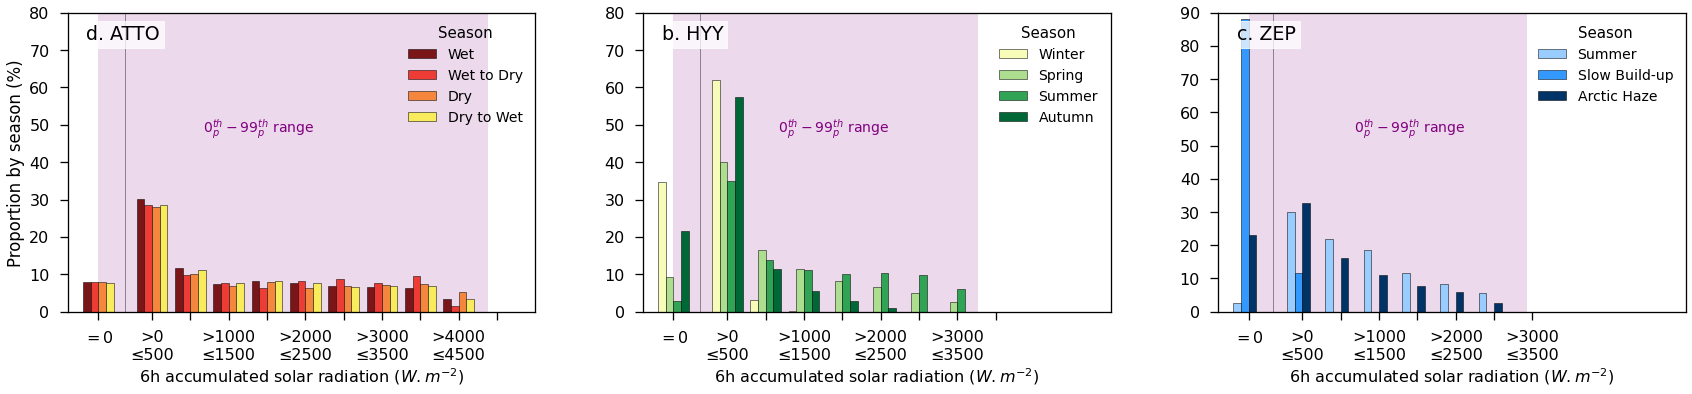

In [355]:
from turtle import title


def thickax_pink_plot(ax):
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.3)
        ax.spines[axis].set_color('k')
    plt.rc('axes', linewidth=0.2)
    fontsize = 16.5
    ax = plt.gca()
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    ax.tick_params(direction='out', length=8, width=1.3, pad=10, bottom=True, top=False, left=True, right=False, color='k')
    ax.tick_params(which='minor', length=4, color='k', width=1.3)
    
fig = plt.figure(num=None, figsize=(29, 5.5))

# ATTO
ax = plt.subplot(1,3,1)

list_colors = [(122/255, 22/255, 24/255), (237/255, 59/255, 53/255), (245/255, 134/255, 61/255), (248/255, 235/255, 92/255)]
list_seasons = ['Wet', 'Wet to Dry', 'Dry', 'Dry to Wet']
ax.axvspan(xmin=-700, xmax=ds_atto['Acc_solar_radiation_6h'].quantile(0.99), facecolor='purple', alpha=0.15)
plot_bars_seasons(ax, list_groupby_atto, ds_atto_seasons, list_seasons, list_colors, lim_bin_atto, 
                  width_bin_atto, 100, pos_zero=-700)
ax.set_ylabel('Proportion by season (%)', fontsize=16.5)
ax.set_xlim(-1100, 5000)
# ax.set_xlim(-7, lim_bin_atto-width_bin_atto-0.1)
ax.axvline(-350, color='k', linewidth=1, alpha=0.4)
ax.text(0.04, 0.96, 'd. ATTO', transform=ax.transAxes, fontsize=19,
        va='top', bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))
ax.set_ylim([0, 80])
# write text on the upper center of the plot
ax.text(0.29, 0.6, r'$0^{th}_{p}-99^{th}_{p}$ range', transform=ax.transAxes, fontsize=14, color='purple')

# HYY
ax = plt.subplot(1,3,2)

list_colors = ['#f7fcb9','#addd8e','#31a354','#006837'] 
list_seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
ax.axvspan(xmin=-700, xmax=ds_hyytiala['Acc_solar_radiation_6h'].quantile(0.99), facecolor='purple', alpha=0.15)
plot_bars_seasons(ax, list_groupby_hyytiala, ds_hyytiala_seasons, list_seasons, list_colors, lim_bin_hyytiala, 
                  width_bin_hyytiala, 100, -700)
ax.set_xlim(-1100, 5000)
# ax.set_xlim(-7, lim_bin_hyytiala-width_bin_hyytiala-0.1)
ax.axvline(-350, color='k', linewidth=1, alpha=0.4)
ax.text(0.04, 0.96, 'b. HYY', transform=ax.transAxes, fontsize=19,
        va='top', bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))
ax.set_ylim([0, 80])
# write text on the upper center of the plot
ax.text(0.29, 0.6, r'$0^{th}_{p}-99^{th}_{p}$ range', transform=ax.transAxes, fontsize=14, color='purple')

# ZEP
ax = plt.subplot(1,3,3)

list_colors = ['#99ccff', '#3399ff', '#003366']
list_seasons = ['Summer', 'Slow Build-up', 'Arctic Haze']
ax.axvspan(xmin=-700, xmax=ds_zeppelin['Acc_solar_radiation_6h'].quantile(0.99), facecolor='purple', alpha=0.15)
plot_bars_seasons(ax, list_groupby_zeppelin, ds_zeppelin_seasons, list_seasons, list_colors, lim_bin_zeppelin, 
                  width_bin_zeppelin, 100, -700)
ax.set_xlim(-1100, 5000)
# ax.set_xlim(-7, lim_bin_zeppelin-width_bin_zeppelin-0.1)
ax.axvline(-390, color='k', linewidth=1, alpha=0.4)
ax.text(0.04, 0.96, 'c. ZEP', transform=ax.transAxes, fontsize=19,
        va='top', bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))
ax.set_ylim([0, 90])
# write text on the upper center of the plot
ax.text(0.29, 0.6, r'$0^{th}_{p}-99^{th}_{p}$ range', transform=ax.transAxes, fontsize=14, color='purple')

# # Zeppelin
# ax = plt.subplot(2,3,6)
# list_colors = ['#99ccff', '#3399ff', '#003366']
# list_seasons = ['Summer', 'Slow Build-up', 'Arctic Haze']
# lim_bin = 15
# width_bin = 1
# list_ds_zeppelin = [ds_zeppelin_jjas, ds_zeppelin_ondj, ds_zeppelin_fmam]

# plot_bars_seasons(ax, list_groupby_zeppelin, list_ds_zeppelin, list_seasons, list_colors, lim_bin, width_bin, 0.22, pos_zero=-1.5)
# ax.set_xlim(-2.5, lim_bin-width_bin-0.1)
# ax.axvline(-0.85, color='k', linewidth=1, alpha=0.4)
# ax.set_ylim(0, 33)
# ax.text(0.04, 0.96, 'f. Zeppelin', transform=ax.transAxes, fontsize=19,
#         va='top', bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))


plt.subplots_adjust(wspace=0.23, hspace=0.3)

path = '/Users/theodorekhadir/Documents/PHD/Figures/S1_comparison/Supplementary/final/'
plt.savefig(path+'seasonal_SRregimes.jpg', dpi=300, bbox_inches='tight')

## combined

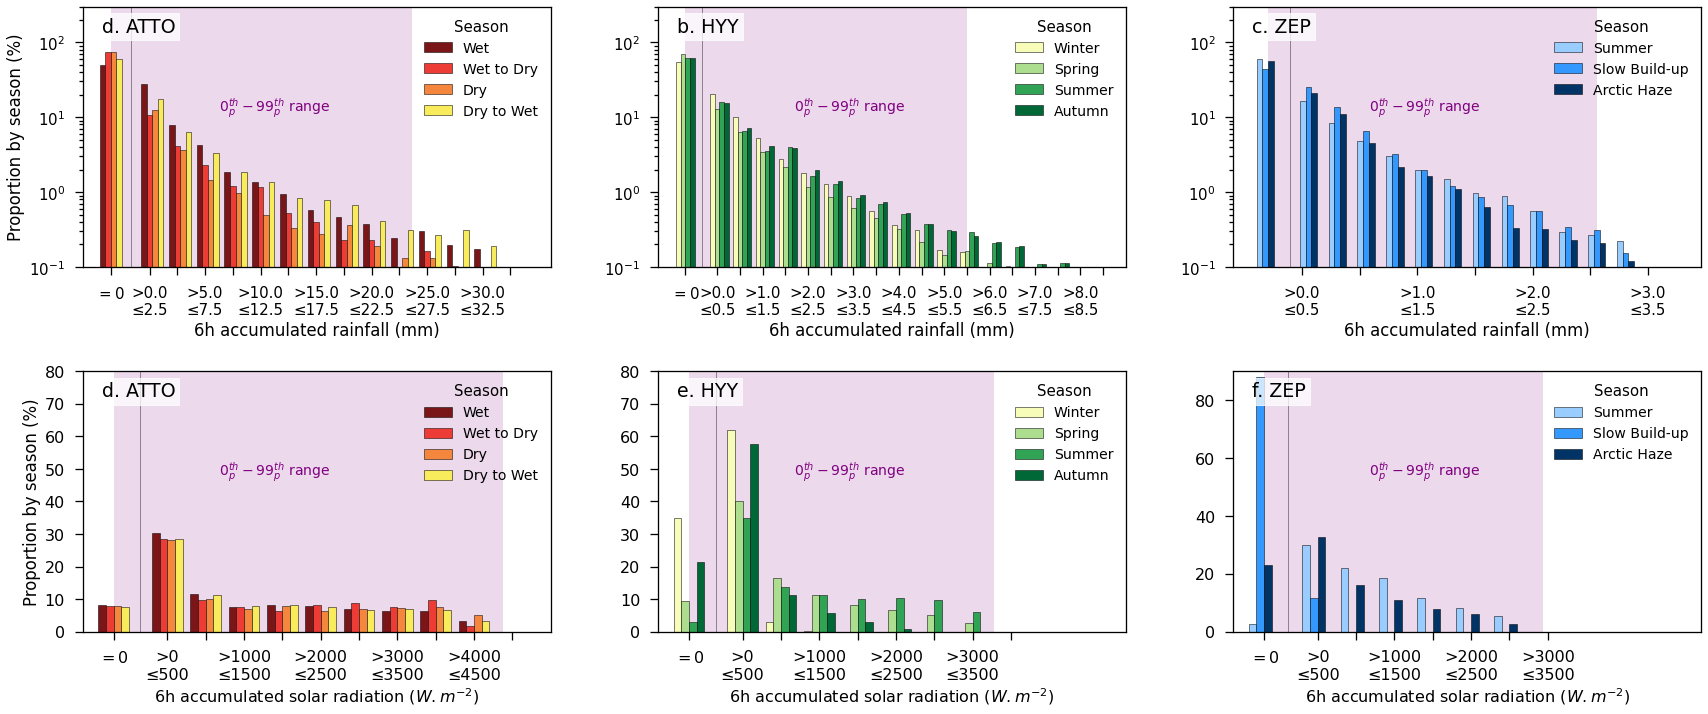

In [357]:

# ATTO
list_ds_atto = [ds_atto_wet, ds_atto_wet2dry, ds_atto_dry, ds_atto_dry2wet]
# find in all ds the highest .quantile(0.99) for the variable 'Acc_rainfall_6h'
max_rain = 0
for ds in list_ds_atto:
    if ds['Acc_rainfall_6h'].quantile(0.99) > max_rain:
        max_rain = ds['Acc_rainfall_6h'].quantile(0.995)

list_groupby_atto = []
lim_bin_atto = max_rain.values
width_bin_atto = 2.5
bins = np.arange(0, lim_bin_atto, width_bin_atto)
for iseason, ds_season in enumerate(list_ds_atto):
    prop = (ds_season.groupby_bins('Acc_rainfall_6h', bins).count()['Acc_solar_radiation_12h']/len(ds_season['Acc_rainfall_6h'])*100).values
    list_groupby_atto.append(prop)
 
# HYY
list_ds_hyytiala = [ds_hyytiala_djf, ds_hyytiala_mam, ds_hyytiala_jja, ds_hyytiala_son]
# find in all ds the highest .quantile(0.99) for the variable 'Acc_rainfall_6h'
max_rain = 0
for ds in list_ds_hyytiala:
    if ds['Acc_rainfall_6h'].quantile(0.99) > max_rain:
        max_rain = ds['Acc_rainfall_6h'].quantile(0.995)

list_groupby_hyytiala = []
lim_bin_hyytiala = max_rain.values
width_bin_hyytiala = 0.5
bins = np.arange(0, lim_bin_hyytiala, width_bin_hyytiala)
for iseason, ds_season in enumerate(list_ds_hyytiala):
    prop = (ds_season.groupby_bins('Acc_rainfall_6h', bins).count()['Acc_solar_radiation_12h']/len(ds_season['Acc_rainfall_6h'])*100).values
    list_groupby_hyytiala.append(prop)

# ZEP
list_ds_zeppelin = [ds_zeppelin_jjas, ds_zeppelin_ondj, ds_zeppelin_fmam]
# find in all ds the highest .quantile(0.99) for the variable 'Acc_rainfall_6h'
max_rain = 0
for ds in list_ds_zeppelin:
    if ds['Acc_rainfall_6h'].quantile(0.99) > max_rain:
        max_rain = ds['Acc_rainfall_6h'].quantile(0.995)

list_groupby_zeppelin = []
lim_bin_zeppelin = max_rain.values
width_bin_zeppelin = 0.5
bins = np.arange(0, lim_bin_zeppelin, width_bin_zeppelin)
for iseason, ds_season in enumerate(list_ds_zeppelin):
    prop = (ds_season.groupby_bins('Acc_rainfall_6h', bins).count()['Acc_solar_radiation_12h']/len(ds_season['Acc_rainfall_6h'])*100).values
    list_groupby_zeppelin.append(prop)
    
def thickax(ax):
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.3)
        ax.spines[axis].set_color('k')
    plt.rc('axes', linewidth=0.2)
    fontsize = 12.5
    ax = plt.gca()
    ax.tick_params(direction='out', length=8, width=1.3, pad=10, bottom=True, top=False, left=True, right=False, color='k')
    ax.tick_params(which='minor', length=4, color='k', width=1.3)
    

# create a figure with a bar plot with the proportion of 'Acc_rainfall_96h' in given rainfall bins
# each season is represented by a different color
def bar_plot(ax, list_groupby_station, list_ds_seasons, bins_rainfall, list_seasons, list_colors, width=1, pos_zero=-7):
    for iseason, ds_season in enumerate(list_ds_seasons):
        prop = list_groupby_station[iseason]
        bins_plot = bins_rainfall
        ax.bar(bins_plot[:-1]+(iseason-1)*width, prop,
                width=width, color=list_colors[iseason], label=list_seasons[iseason], edgecolor='k', linewidth=0.5)
    
    # legend
    # semi transparent frame light grey
    l = ax.legend(frameon=False, fontsize=14, title='Season', loc='upper right')
    plt.setp(l.get_title(),fontsize=15)
    
    for iseason, ds_season in enumerate(list_ds_seasons):
        prop = len(ds_season.sel(time=ds_season['Acc_rainfall_6h']==0).time)/len(ds_season.time)*100
        ax.bar(pos_zero-width/2*3+iseason*width, prop,
            width=width, color=list_colors[iseason], edgecolor='k', linewidth=0.5)
        
def plot_bars_seasons(ax, list_groupby_station, list_ds_seasons, list_seasons, list_colors, lim_bin, width_bin, width, pos_zero=-7):
    bins = np.arange(0, lim_bin, width_bin)
    xticks = bar_plot(ax, list_groupby_station, list_ds_seasons, bins, list_seasons, list_colors, width=width, pos_zero=pos_zero)
    if len(list_seasons) == 4:
        list_xlabels = ['>'+str(low_lim)+'\n≤'+str(up_lim) for low_lim, 
                        up_lim in zip(np.arange(0, lim_bin+width_bin, width_bin)[:-1], np.arange(0, lim_bin+width_bin, width_bin)[1:])]
        # remove blank space between r'$\geq$' and the number in list_xlabels
        list_xlabels = [x.replace(' ', '') for x in list_xlabels]
        list_xlabels[1::2] = ['']*len(list_xlabels[1::2])
        list_xlabels = [r'$=0$']+list_xlabels
        ax.set_xticks(np.insert(bins, 0, pos_zero))
        ax.set_xticklabels(list_xlabels, fontsize=15)
    else:
        ax.set_xticks([-1.61]+np.arange(-0.11,14.11,1).tolist())
        list_xlabels = ['>'+str(low_lim)+'\n≤'+str(up_lim) for low_lim, 
                                up_lim in zip(np.arange(0, lim_bin+width_bin, width_bin)[:-1], np.arange(0, lim_bin+width_bin, width_bin)[1:])]
        list_xlabels = [x.replace(' ', '') for x in list_xlabels]
        list_xlabels[1::2] = ['']*len(list_xlabels[1::2])
        list_xlabels = [r'$=0$']+list_xlabels
        ax.set_xticklabels(list_xlabels, fontsize=15)
    # fontsize y ticks label
    ax.tick_params(axis='y', labelsize=15)
    # x label
    ax.set_xlabel('6h accumulated rainfall (mm)', fontsize=16.5)
    thickax(ax)    
    
from turtle import title


def thickax_pink_plot(ax):
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.3)
        ax.spines[axis].set_color('k')
    plt.rc('axes', linewidth=0.2)
    fontsize = 16.5
    ax = plt.gca()
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    ax.tick_params(direction='out', length=8, width=1.3, pad=10, bottom=True, top=False, left=True, right=False, color='k')
    ax.tick_params(which='minor', length=4, color='k', width=1.3)
    
fig = plt.figure(num=None, figsize=(29, 11.5))

# ATTO
ax = plt.subplot(2,3,1)

list_colors = [(122/255, 22/255, 24/255), (237/255, 59/255, 53/255), (245/255, 134/255, 61/255), (248/255, 235/255, 92/255)]
list_seasons = ['Wet', 'Wet to Dry', 'Dry', 'Dry to Wet']
ax.axvspan(xmin=-3.5, xmax=ds_atto['Acc_rainfall_6h'].quantile(0.99), facecolor='purple', alpha=0.15)
plot_bars_seasons(ax, list_groupby_atto, ds_atto_seasons, list_seasons, list_colors, lim_bin_atto, 
                  width_bin_atto, 0.5, pos_zero=-3.5)
ax.set_ylabel('Proportion by season (%)', fontsize=16.5)
ax.set_xlim(-6, lim_bin_atto-width_bin_atto-0.1+4)
# ax.set_xlim(-7, lim_bin_atto-width_bin_atto-0.1)
ax.axvline(-1.65, color='k', linewidth=1, alpha=0.4)
ax.text(0.04, 0.96, 'd. ATTO', transform=ax.transAxes, fontsize=19,
        va='top', bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))
# y log scale
ax.set_yscale('log')
ax.set_ylim([0.1, 300])
# write text on the upper center of the plot
ax.text(0.29, 0.6, r'$0^{th}_{p}-99^{th}_{p}$ range', transform=ax.transAxes, fontsize=14, color='purple')

# HYY
ax = plt.subplot(2,3,2)

list_colors = ['#f7fcb9','#addd8e','#31a354','#006837'] 
list_seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
ax.axvspan(xmin=-0.7, xmax=ds_hyytiala['Acc_rainfall_6h'].quantile(0.99), facecolor='purple', alpha=0.15)
plot_bars_seasons(ax, list_groupby_hyytiala, ds_hyytiala_seasons, list_seasons, list_colors, lim_bin_hyytiala, 
                  width_bin_hyytiala, 0.1, pos_zero=-0.7)
ax.set_xlim(-1.3, lim_bin_hyytiala-width_bin_hyytiala-0.1+1)
# ax.set_xlim(-7, lim_bin_hyytiala-width_bin_hyytiala-0.1)
ax.axvline(-0.325, color='k', linewidth=1, alpha=0.4)
ax.text(0.04, 0.96, 'b. HYY', transform=ax.transAxes, fontsize=19,
        va='top', bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))
# y log scale
ax.set_yscale('log')
ax.set_ylim([0.1, 300])
# write text on the upper center of the plot
ax.text(0.29, 0.6, r'$0^{th}_{p}-99^{th}_{p}$ range', transform=ax.transAxes, fontsize=14, color='purple')

# ZEP
ax = plt.subplot(2,3,3)

list_colors = ['#99ccff', '#3399ff', '#003366']
list_seasons = ['Summer', 'Slow Build-up', 'Arctic Haze']
ax.axvspan(xmin=-0.7, xmax=ds_zeppelin['Acc_rainfall_6h'].quantile(0.99), facecolor='purple', alpha=0.15)
plot_bars_seasons(ax, list_groupby_zeppelin, ds_zeppelin_seasons, list_seasons, list_colors, lim_bin_zeppelin, 
                  width_bin_zeppelin, 0.1, pos_zero=-0.7)
ax.set_xlim(-1.3, lim_bin_zeppelin-width_bin_zeppelin-0.1+1)
# ax.set_xlim(-7, lim_bin_zeppelin-width_bin_zeppelin-0.1)
ax.axvline(-0.325, color='k', linewidth=1, alpha=0.4)
ax.text(0.04, 0.96, 'c. ZEP', transform=ax.transAxes, fontsize=19,
        va='top', bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))
# y log scale
ax.set_yscale('log')
ax.set_ylim([0.1, 300])
# write text on the upper center of the plot
ax.text(0.29, 0.6, r'$0^{th}_{p}-99^{th}_{p}$ range', transform=ax.transAxes, fontsize=14, color='purple')

# ATTO
list_ds_atto = [ds_atto_wet, ds_atto_wet2dry, ds_atto_dry, ds_atto_dry2wet]
# find in all ds the highest .quantile(0.99) for the variable 'Acc_solar_radiation_6h'
max_solar_radiation = 0
for ds in list_ds_atto:
    if ds['Acc_solar_radiation_6h'].quantile(0.99) > max_solar_radiation:
        max_solar_radiation = ds['Acc_solar_radiation_6h'].quantile(0.995)

list_groupby_atto = []
lim_bin_atto = max_solar_radiation.values
width_bin_atto = 500
bins = np.arange(0, lim_bin_atto, width_bin_atto)
for iseason, ds_season in enumerate(list_ds_atto):
    prop = (ds_season.groupby_bins('Acc_solar_radiation_6h', bins).count()['Acc_solar_radiation_12h']/len(ds_season['Acc_solar_radiation_6h'])*100).values
    list_groupby_atto.append(prop)
 
# HYY
list_ds_hyytiala = [ds_hyytiala_djf, ds_hyytiala_mam, ds_hyytiala_jja, ds_hyytiala_son]
# find in all ds the highest .quantile(0.99) for the variable 'Acc_solar_radiation_6h'
max_solar_radiation = 0
for ds in list_ds_hyytiala:
    if ds['Acc_solar_radiation_6h'].quantile(0.99) > max_solar_radiation:
        max_solar_radiation = ds['Acc_solar_radiation_6h'].quantile(0.995)

list_groupby_hyytiala = []
lim_bin_hyytiala = max_solar_radiation.values
width_bin_hyytiala = 500
bins = np.arange(0, lim_bin_hyytiala, width_bin_hyytiala)
for iseason, ds_season in enumerate(list_ds_hyytiala):
    prop = (ds_season.groupby_bins('Acc_solar_radiation_6h', bins).count()['Acc_solar_radiation_12h']/len(ds_season['Acc_solar_radiation_6h'])*100).values
    list_groupby_hyytiala.append(prop)

# ZEP
list_ds_zeppelin = [ds_zeppelin_jjas, ds_zeppelin_ondj, ds_zeppelin_fmam]
# find in all ds the highest .quantile(0.99) for the variable 'Acc_solar_radiation_6h'
max_solar_radiation = 0
for ds in list_ds_zeppelin:
    if ds['Acc_solar_radiation_6h'].quantile(0.99) > max_solar_radiation:
        max_solar_radiation = ds['Acc_solar_radiation_6h'].quantile(0.995)

list_groupby_zeppelin = []
lim_bin_zeppelin = max_solar_radiation.values
width_bin_zeppelin = 500
bins = np.arange(0, lim_bin_zeppelin, width_bin_zeppelin)
for iseason, ds_season in enumerate(list_ds_zeppelin):
    prop = (ds_season.groupby_bins('Acc_solar_radiation_6h', bins).count()['Acc_solar_radiation_12h']/len(ds_season['Acc_solar_radiation_6h'])*100).values
    list_groupby_zeppelin.append(prop)
    
def thickax(ax):
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.3)
        ax.spines[axis].set_color('k')
    plt.rc('axes', linewidth=0.2)
    fontsize = 16
    ax = plt.gca()
    # for tick in ax.xaxis.get_major_ticks():
    #     tick.label1.set_fontsize(fontsize)
    # for tick in ax.yaxis.get_major_ticks():
    #     tick.label1.set_fontsize(fontsize)
    ax.tick_params(direction='out', length=8, width=1.3, pad=10, bottom=True, top=False, left=True, right=False, color='k')
    ax.tick_params(which='minor', length=4, color='k', width=1.3)
    

# create a figure with a bar plot with the proportion of 'Acc_solar_radiation_6h' in given rainfall bins
# each season is represented by a different color
def bar_plot(ax, list_groupby_station, list_ds_seasons, bins_rainfall, list_seasons, list_colors, width=1, pos_zero=-7):
    for iseason, ds_season in enumerate(list_ds_seasons):
        prop = list_groupby_station[iseason]
        bins_plot = bins_rainfall
        ax.bar(bins_plot[:-1]+(iseason-1.5)*width, prop,
                width=width, color=list_colors[iseason], label=list_seasons[iseason], edgecolor='k', linewidth=0.5)
    
    # legend
    l = ax.legend(frameon=False, fontsize=14, title='Season', loc='upper right')
    plt.setp(l.get_title(),fontsize=15)
    
    for iseason, ds_season in enumerate(list_ds_seasons):
        prop = len(ds_season.sel(time=ds_season['Acc_solar_radiation_6h']==0).time)/len(ds_season.time)*100
        ax.bar(pos_zero-width/2*3+iseason*width, prop,
            width=width, color=list_colors[iseason], edgecolor='k', linewidth=0.5)
        
def plot_bars_seasons(ax, list_groupby_station, list_ds_seasons, list_seasons, list_colors, lim_bin, width_bin, width, pos_zero=-7):
    bins = np.arange(0, lim_bin, width_bin)
    xticks = bar_plot(ax, list_groupby_station, list_ds_seasons, bins, list_seasons, list_colors, width=width, pos_zero=pos_zero)
    list_xlabels = ['>'+str(int(low_lim))+'\n≤'+str(int(up_lim)) for low_lim, 
                    up_lim in zip(np.arange(0, lim_bin+width_bin, width_bin)[:-1], np.arange(0, lim_bin+width_bin, width_bin)[1:])]
    # remove blank space between r'$\geq$' and the number in list_xlabels
    list_xlabels = [x.replace(' ', '') for x in list_xlabels]
    list_xlabels[1::2] = ['']*len(list_xlabels[1::2])
    list_xlabels = [r'$=0$']+list_xlabels
    ax.set_xticks(np.insert(bins, 0, pos_zero))
    ax.set_xticklabels(list_xlabels, fontsize=16)
    # fontsize y ticks label
    ax.tick_params(axis='y', labelsize=16)
    ax.set_xticklabels(list_xlabels, fontsize=16)
    # x label
    ax.set_xlabel(r'6h accumulated solar radiation ($W.m^{-2}$)', fontsize=16)
    thickax(ax)
    
def thickax_pink_plot(ax):
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.3)
        ax.spines[axis].set_color('k')
    plt.rc('axes', linewidth=0.2)
    fontsize = 16.5
    ax = plt.gca()
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    ax.tick_params(direction='out', length=8, width=1.3, pad=10, bottom=True, top=False, left=True, right=False, color='k')
    ax.tick_params(which='minor', length=4, color='k', width=1.3)
    
# ATTO
ax = plt.subplot(2,3,4)

list_colors = [(122/255, 22/255, 24/255), (237/255, 59/255, 53/255), (245/255, 134/255, 61/255), (248/255, 235/255, 92/255)]
list_seasons = ['Wet', 'Wet to Dry', 'Dry', 'Dry to Wet']
ax.axvspan(xmin=-700, xmax=ds_atto['Acc_solar_radiation_6h'].quantile(0.99), facecolor='purple', alpha=0.15)
plot_bars_seasons(ax, list_groupby_atto, ds_atto_seasons, list_seasons, list_colors, lim_bin_atto, 
                  width_bin_atto, 100, pos_zero=-700)
ax.set_ylabel('Proportion by season (%)', fontsize=16.5)
ax.set_xlim(-1100, 5000)
# ax.set_xlim(-7, lim_bin_atto-width_bin_atto-0.1)
ax.axvline(-350, color='k', linewidth=1, alpha=0.4)
ax.text(0.04, 0.96, 'd. ATTO', transform=ax.transAxes, fontsize=19,
        va='top', bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))
ax.set_ylim([0, 80])
# write text on the upper center of the plot
ax.text(0.29, 0.6, r'$0^{th}_{p}-99^{th}_{p}$ range', transform=ax.transAxes, fontsize=14, color='purple')

# HYY
ax = plt.subplot(2,3,5)

list_colors = ['#f7fcb9','#addd8e','#31a354','#006837'] 
list_seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
ax.axvspan(xmin=-700, xmax=ds_hyytiala['Acc_solar_radiation_6h'].quantile(0.99), facecolor='purple', alpha=0.15)
plot_bars_seasons(ax, list_groupby_hyytiala, ds_hyytiala_seasons, list_seasons, list_colors, lim_bin_hyytiala, 
                  width_bin_hyytiala, 100, -700)
ax.set_xlim(-1100, 5000)
# ax.set_xlim(-7, lim_bin_hyytiala-width_bin_hyytiala-0.1)
ax.axvline(-350, color='k', linewidth=1, alpha=0.4)
ax.text(0.04, 0.96, 'e. HYY', transform=ax.transAxes, fontsize=19,
        va='top', bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))
ax.set_ylim([0, 80])
# write text on the upper center of the plot
ax.text(0.29, 0.6, r'$0^{th}_{p}-99^{th}_{p}$ range', transform=ax.transAxes, fontsize=14, color='purple')

# ZEP
ax = plt.subplot(2,3,6)

list_colors = ['#99ccff', '#3399ff', '#003366']
list_seasons = ['Summer', 'Slow Build-up', 'Arctic Haze']
ax.axvspan(xmin=-700, xmax=ds_zeppelin['Acc_solar_radiation_6h'].quantile(0.99), facecolor='purple', alpha=0.15)
plot_bars_seasons(ax, list_groupby_zeppelin, ds_zeppelin_seasons, list_seasons, list_colors, lim_bin_zeppelin, 
                  width_bin_zeppelin, 100, -700)
ax.set_xlim(-1100, 5000)
# ax.set_xlim(-7, lim_bin_zeppelin-width_bin_zeppelin-0.1)
ax.axvline(-390, color='k', linewidth=1, alpha=0.4)
ax.text(0.04, 0.96, 'f. ZEP', transform=ax.transAxes, fontsize=19,
        va='top', bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))
ax.set_ylim([0, 90])
# write text on the upper center of the plot
ax.text(0.29, 0.6, r'$0^{th}_{p}-99^{th}_{p}$ range', transform=ax.transAxes, fontsize=14, color='purple')

plt.subplots_adjust(wspace=0.23, hspace=0.4)

path = '/Users/theodorekhadir/Documents/PHD/Figures/S1_comparison/Supplementary/final/'
plt.savefig(path+'seasonal_regimes.jpg', dpi=300, bbox_inches='tight')

# 1. Fig.2 | PNSD vs. 96h accumulated rainfall along back trajectories

In [172]:
# sum rainfall over the first N elements along time_traj
ds_atto['Acc_rainfall_6h'] = (['time'], np.sum(ds_atto.Rainfall_TRMM.values[:,0:6], axis=1))
ds_hyytiala['Acc_rainfall_6h'] = (['time'], np.sum(ds_hyytiala.Rainfall.values[:,0:6], axis=1))
ds_zeppelin['Acc_rainfall_6h'] = (['time'], np.sum(ds_zeppelin.Rainfall.values[:,0:6], axis=1))

ds_atto['Acc_rainfall_96h'] = (['time'], np.sum(ds_atto.Rainfall_TRMM.values[:,0:96], axis=1))
ds_hyytiala['Acc_rainfall_96h'] = (['time'], np.sum(ds_hyytiala.Rainfall.values[:,0:96], axis=1))
ds_zeppelin['Acc_rainfall_96h'] = (['time'], np.sum(ds_zeppelin.Rainfall.values[:,0:96], axis=1))

# solar radiation
ds_atto['Acc_solar_radiation_12h'] = (['time'], np.sum(ds_atto.Solar_Radiation.values[:,0:12], axis=1))
ds_hyytiala['Acc_solar_radiation_12h'] = (['time'], np.sum(ds_hyytiala.Solar_radiation.values[:,0:12], axis=1))
ds_zeppelin['Acc_solar_radiation_12h'] = (['time'], np.sum(ds_zeppelin.Solar_radiation.values[:,0:12], axis=1))

ds_atto['Acc_solar_radiation_6h'] = (['time'], np.sum(ds_atto.Solar_Radiation.values[:,0:6], axis=1))
ds_hyytiala['Acc_solar_radiation_6h'] = (['time'], np.sum(ds_hyytiala.Solar_radiation.values[:,0:6], axis=1))
ds_zeppelin['Acc_solar_radiation_6h'] = (['time'], np.sum(ds_zeppelin.Solar_radiation.values[:,0:6], axis=1))

# 96h
ds_atto['Acc_solar_radiation_96h'] = (['time'], np.sum(ds_atto.Solar_Radiation.values[:,0:96], axis=1))
ds_hyytiala['Acc_solar_radiation_96h'] = (['time'], np.sum(ds_hyytiala.Solar_radiation.values[:,0:96], axis=1))
ds_zeppelin['Acc_solar_radiation_96h'] = (['time'], np.sum(ds_zeppelin.Solar_radiation.values[:,0:96], axis=1))

In [173]:
# calculate the median of a given variable for each diameter bin and concentration bin
def median_var_pnsd(y_max, y_width_bin, ds, threshold, name_var):
    
    y_bin = np.arange(0,y_max,y_width_bin)
    
    Dp = ds.D.values
    print(Dp.shape)
    logDp = np.log10(Dp)
    interval = np.array([logDp[i]-logDp[i-1] for i in range(1,np.size(Dp))])/2
    centers = logDp[:-1]+interval
    centers_bis = np.append(logDp[0]-interval[0], centers)
    centers_bis = np.append(centers_bis, logDp[-1]+interval[-1])
    size_bin = 10**(centers_bis)
    
    # initialize nan array that will contain bin concentration
    cm_var = np.zeros((len(Dp), y_bin.shape[0]+1))*np.nan
    cm_count = np.zeros((len(Dp), y_bin.shape[0]+1))*np.nan

    ds = ds[[name_var, 'pnsd']]

    lenDp = len(Dp)
    for iD, D in enumerate(Dp):
        # print(iD, '/', lenDp)
        ds_D = ds.sel(D=D)
        for iy, y in enumerate(y_bin):
            ds_slice = ds_D.sel(time=((ds_D['pnsd']>=y)&(ds_D['pnsd']<y+y_width_bin)))
            cm_count[iD, iy] = len(ds_slice.time)
            
            if cm_count[iD, iy] <= threshold:
                cm_var[iD, iy] = np.nan
                
            else:
                cm_var[iD, iy] = ds_slice[name_var].median()
        
    return cm_var, cm_count, size_bin

# find the size of each diameter bin
def find_size_bin(ds):
    Dp = ds.D.values
    logDp = np.log10(Dp)
    interval = np.array([logDp[i]-logDp[i-1] for i in range(1,np.size(Dp))])/2
    centers = logDp[:-1]+interval
    centers_bis = np.append(logDp[0]-interval[0], centers)
    centers_bis = np.append(centers_bis, logDp[-1]+interval[-1])
    return 10**(centers_bis)

size_bin_atto = find_size_bin(ds_atto)
size_bin_hyytiala = find_size_bin(ds_hyytiala)
size_bin_zeppelin = find_size_bin(ds_zeppelin)

In [174]:
# slices of the dataset for each station
def select_seasons(list_month, ds):
    ds_season = ds.sel(time=ds.time.dt.month.isin(list_month))
    return ds_season

ds_atto_wet = select_seasons([2,3,4,5], ds_atto)
ds_atto_wet2dry = select_seasons([6,7], ds_atto)
ds_atto_dry = select_seasons([8,9,10,11], ds_atto)
ds_atto_dry2wet = select_seasons([12,1], ds_atto)
ds_atto_seasons = [ds_atto_wet, ds_atto_wet2dry, ds_atto_dry, ds_atto_dry2wet]

ds_hyytiala_djf = select_seasons([12,1,2], ds_hyytiala)
ds_hyytiala_mam = select_seasons([3,4,5], ds_hyytiala)
ds_hyytiala_jja = select_seasons([6,7,8], ds_hyytiala)
ds_hyytiala_son = select_seasons([9,10,11], ds_hyytiala)
ds_hyytiala_seasons = [ds_hyytiala_djf, ds_hyytiala_mam, ds_hyytiala_jja, ds_hyytiala_son]

ds_zeppelin_jjas = select_seasons([6,7,8, 9], ds_zeppelin)
ds_zeppelin_ondj = select_seasons([10,11,12,1], ds_zeppelin)
ds_zeppelin_fmam = select_seasons([2,3,4,5], ds_zeppelin)
ds_zeppelin_seasons = [ds_zeppelin_jjas, ds_zeppelin_ondj, ds_zeppelin_fmam]

In [175]:
# ATTO
y_max=8000
y_width_bin=100
threshold=20
vmin=0
vmax=10
name_var = 'Acc_rainfall_96h'
list_ds_atto = [ds_atto]
list_cm_precip_atto = [median_var_pnsd(y_max, y_width_bin, ds, threshold, name_var)[0] for ds in list_ds_atto]

# HHYTIALA
y_max=12000
y_width_bin=100
threshold=20
vmin=0
vmax=10
name_var = 'Acc_rainfall_96h'
list_ds_hyytiala = [ds_hyytiala]
list_cm_precip_hyytiala = [median_var_pnsd(y_max, y_width_bin, ds, threshold, name_var)[0] for ds in list_ds_hyytiala]

# ZEPPELIN
y_max=2000
y_width_bin=30
threshold=20
vmin=0
vmax=10
name_var = 'Acc_rainfall_96h'
list_ds_zeppelin = [ds_zeppelin]
list_cm_precip_zeppelin = [median_var_pnsd(y_max, y_width_bin, ds, threshold, name_var)[0] for ds in list_ds_zeppelin]

# ATTO
list_ds_atto = [ds_atto_wet, ds_atto_wet2dry, ds_atto_dry, ds_atto_dry2wet]
list_groupby_atto = []
lim_bin = 75
width_bin = 5
bins = np.arange(0, lim_bin, width_bin)
for iseason, ds_season in enumerate(list_ds_atto):
    prop = (ds_season.groupby_bins('Acc_rainfall_96h', bins).count()['Acc_solar_radiation_12h']/len(ds_season['Acc_rainfall_96h'])*100).values
    list_groupby_atto.append(prop)
    
# Hyytiälä
list_ds_hyytiala = [ds_hyytiala_djf, ds_hyytiala_mam, ds_hyytiala_jja, ds_hyytiala_son]
list_groupby_hyytiala = []
lim_bin = 30
width_bin = 2
bins = np.arange(0, lim_bin, width_bin)
for iseason, ds_season in enumerate(list_ds_hyytiala):
    prop = (ds_season.groupby_bins('Acc_rainfall_96h', bins).count()['Acc_solar_radiation_12h']/len(ds_season['Acc_rainfall_96h'])*100).values
    list_groupby_hyytiala.append(prop)
    
# Zeppelin
list_ds_zeppelin = [ds_zeppelin_jjas, ds_zeppelin_ondj, ds_zeppelin_fmam]
list_groupby_zeppelin = []
lim_bin = 15
width_bin = 1
bins = np.arange(0, lim_bin, width_bin)
for iseason, ds_season in enumerate(list_ds_zeppelin):
    prop = (ds_season.groupby_bins('Acc_rainfall_96h', bins).count()['Acc_solar_radiation_12h']/len(ds_season['Acc_rainfall_96h'])*100).values
    list_groupby_zeppelin.append(prop)
    


(104,)
(33,)
(33,)


In [207]:
def thickax(ax):
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.3)
        ax.spines[axis].set_color('k')
    plt.rc('axes', linewidth=0.2)
    fontsize = 16
    ax = plt.gca()
    # for tick in ax.xaxis.get_major_ticks():
    #     tick.label1.set_fontsize(fontsize)
    # for tick in ax.yaxis.get_major_ticks():
    #     tick.label1.set_fontsize(fontsize)
    ax.tick_params(direction='out', length=8, width=1.3, pad=2, bottom=True, top=False, left=True, right=False, color='k')
    ax.tick_params(which='minor', length=4, color='k', width=1.3)
    

# create a figure with a bar plot with the proportion of 'Acc_rainfall_96h' in given rainfall bins
# each season is represented by a different color
def bar_plot(ax, list_groupby_station, list_ds_seasons, bins_rainfall, list_seasons, list_colors, width=1, pos_zero=-7):
    for iseason, ds_season in enumerate(list_ds_seasons):
        prop = list_groupby_station[iseason]
        bins_plot = bins_rainfall
        ax.bar(bins_plot[:-1]+(iseason-1.5)*width, prop,
                width=width, color=list_colors[iseason], label=list_seasons[iseason], edgecolor='k', linewidth=0.5)
    
    # legend
    l = ax.legend(frameon=False, fontsize=16, title='Season', loc='upper right')
    plt.setp(l.get_title(),fontsize=16)
    
    for iseason, ds_season in enumerate(list_ds_seasons):
        prop = len(ds_season.sel(time=ds_season['Acc_rainfall_96h']==0).time)/len(ds_season.time)*100
        ax.bar(pos_zero-width/2*3+iseason*width, prop,
            width=width, color=list_colors[iseason], edgecolor='k', linewidth=0.5)
        
def plot_bars_seasons(ax, list_groupby_station, list_ds_seasons, list_seasons, list_colors, lim_bin, width_bin, width, pos_zero=-7):
    bins = np.arange(0, lim_bin, width_bin)
    xticks = bar_plot(ax, list_groupby_station, list_ds_seasons, bins, list_seasons, list_colors, width=width, pos_zero=pos_zero)
    if len(list_seasons) == 4:
        list_xlabels = ['>'+str(low_lim)+'\n≤'+str(up_lim) for low_lim, 
                        up_lim in zip(np.arange(0, lim_bin+width_bin, width_bin)[:-1], np.arange(0, lim_bin+width_bin, width_bin)[1:])]
        # remove blank space between r'$\geq$' and the number in list_xlabels
        list_xlabels = [x.replace(' ', '') for x in list_xlabels]
        list_xlabels[1::2] = ['']*len(list_xlabels[1::2])
        list_xlabels = [r'$=0$']+list_xlabels
        ax.set_xticks(np.insert(bins, 0, pos_zero))
        ax.set_xticklabels(list_xlabels, fontsize=16)
    else:
        ax.set_xticks([-1.61]+np.arange(-0.11,14.11,1).tolist())
        list_xlabels = ['>'+str(low_lim)+'\n≤'+str(up_lim) for low_lim, 
                                up_lim in zip(np.arange(0, lim_bin+width_bin, width_bin)[:-1], np.arange(0, lim_bin+width_bin, width_bin)[1:])]
        list_xlabels = [x.replace(' ', '') for x in list_xlabels]
        list_xlabels[1::2] = ['']*len(list_xlabels[1::2])
        list_xlabels = [r'$=0$']+list_xlabels
        ax.set_xticklabels(list_xlabels, fontsize=16)
        # space between xticks and xlabels
        ax.tick_params(axis='x', pad=1)
    # fontsize y ticks label
    ax.tick_params(axis='y', labelsize=15)
    # x label
    ax.set_xlabel('96h accumulated rainfall (mm)', fontsize=18.5)
    thickax(ax)

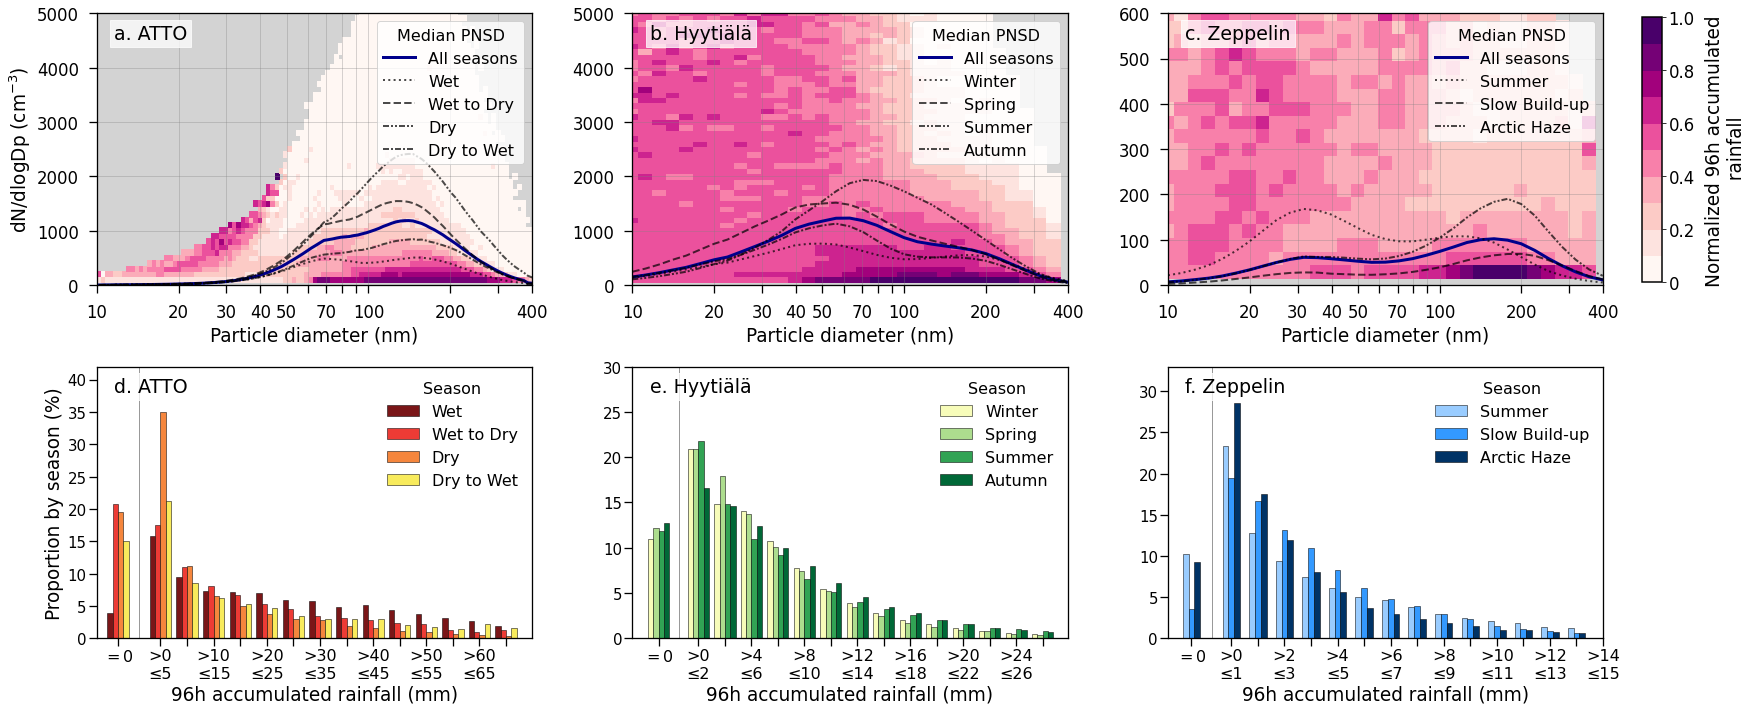

In [212]:
from turtle import title


def thickax_pink_plot(ax):
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.3)
        ax.spines[axis].set_color('k')
    plt.rc('axes', linewidth=0.2)
    fontsize = 16.5
    ax = plt.gca()
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    ax.tick_params(direction='out', length=8, width=1.3, pad=10, bottom=True, top=False, left=True, right=False, color='k')
    ax.tick_params(which='minor', length=4, color='k', width=1.3)
    
fig = plt.figure(num=None, figsize=(27, 11.5))

y_lim = [7000]
y_max=8000
y_width_bin=100
count=0
list_seasons = ['a. ATTO']
max = np.nanmax([np.nanmax(cm) for cm in list_cm_precip_atto])
ax = plt.subplot(2,3,1)
ax.set_facecolor("lightgrey")
X, Y = np.meshgrid(size_bin_atto[:-1], np.arange(0,y_max+y_width_bin,y_width_bin)+y_width_bin/2)
cmap = plt.get_cmap('RdPu',lut=10)
cm_precip_bis = list_cm_precip_atto[0]/max
mappable = ax.pcolor(X, Y, cm_precip_bis.T, cmap=cmap, norm=mpl.colors.Normalize(vmin=0, vmax=1))
thickax_pink_plot(ax)
ax.set_ylim(0,5000)
ax.set_xlim(10,400)
ax.set_xscale('log')
ax.set_xticks([10,20,30,40,50,60,70,80,90,100,200,300,400])
ax.set_xticklabels([10,20,30,40,50,'',70,'','',100,200,'',400],fontsize=16.5)
ax.set_ylabel(r'dN/dlogDp (cm$^{-3}$)',fontsize=18.5)
ax.text(0.04, 0.96, list_seasons[0], transform=ax.transAxes, fontsize=19,
        va='top', bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))

ax.set_xlabel('Particle diameter (nm)',fontsize=18.5)

ax.plot(ds_atto.D, ds_atto['pnsd'].median(dim='time'),color='darkblue', 
        linewidth=3, label='All seasons')

linestyles = ['dotted', 'dashed', (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1))]
list_seasons = ['Wet', 'Wet to Dry', 'Dry', 'Dry to Wet']
for iseason, ds_season in enumerate(ds_atto_seasons):
    ax.plot(ds_season.D, ds_season['pnsd'].median(dim='time'),color='k', 
        linewidth=2, label=list_seasons[iseason], linestyle=linestyles[iseason], alpha=0.7)
l=plt.legend(frameon=True, fontsize=16, title='Median PNSD', loc='upper right')
# legend title fontsize
plt.setp(l.get_title(),fontsize=16)
ax.grid(True, alpha=0.4, c='grey')

y_lim = [12000]
y_max=12000
y_width_bin=100
count=0
list_seasons = ['b. Hyytiälä']
max = np.nanmax([np.nanmax(cm) for cm in list_cm_precip_hyytiala])
ax = plt.subplot(2,3,2)
ax.set_facecolor("lightgrey")
X, Y = np.meshgrid(size_bin_hyytiala[:-1], np.arange(0,y_max+y_width_bin,y_width_bin)+y_width_bin/2)
cmap = plt.get_cmap('RdPu',lut=10)
cm_precip_bis = list_cm_precip_hyytiala[0]/max
mappable = ax.pcolor(X, Y, cm_precip_bis.T, cmap=cmap, norm=mpl.colors.Normalize(vmin=0, vmax=1))
thickax_pink_plot(ax)
ax.set_ylim(0,5000)
ax.set_xlim(10,400)
ax.set_xscale('log')
ax.set_xticks([10,20,30,40,50,60,70,80,90,100,200,300,400])
ax.set_xticklabels([10,20,30,40,50,'',70,'','',100,200,'',400],fontsize=16.5)
ax.text(0.04, 0.96, list_seasons[0], transform=ax.transAxes, fontsize=19,
        va='top', bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))

ax.set_xlabel('Particle diameter (nm)',fontsize=18.5)

ax.plot(ds_hyytiala.D, ds_hyytiala['pnsd'].median(dim='time'),color='darkblue', 
        linewidth=3, label='All seasons')

linestyles = ['dotted', 'dashed', (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1))]
list_seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
for iseason, ds_season in enumerate(ds_hyytiala_seasons):
    ax.plot(ds_season.D, ds_season['pnsd'].median(dim='time'),color='k', 
        linewidth=2, label=list_seasons[iseason], linestyle=linestyles[iseason], alpha=0.7)
l=plt.legend(frameon=True, fontsize=16, title='Median PNSD')
# legend title fontsize
plt.setp(l.get_title(),fontsize=16)
ax.grid(True, alpha=0.4, c='grey')


y_lim = [2000]
y_max=2000
y_width_bin=30
count=0
list_seasons = ['c. Zeppelin']
max = np.nanmax([np.nanmax(cm) for cm in list_cm_precip_zeppelin])
ax = plt.subplot(2,3,3)
ax.set_facecolor("lightgrey")
X, Y = np.meshgrid(size_bin_zeppelin[:-1], np.arange(0,y_max+y_width_bin,y_width_bin)+y_width_bin/2)
cmap = plt.get_cmap('RdPu',lut=10)
cm_precip_bis = list_cm_precip_zeppelin[0]/max
mappable = ax.pcolor(X, Y, cm_precip_bis.T, cmap=cmap, norm=mpl.colors.Normalize(vmin=0, vmax=1))
thickax_pink_plot(ax)
ax.set_ylim(0,600)
ax.set_xlim(10,400)
ax.set_xscale('log')
ax.set_xticks([10,20,30,40,50,60,70,80,90,100,200,300,400])
ax.set_xticklabels([10,20,30,40,50,'',70,'','',100,200,'',400],fontsize=16.5)
ax.text(0.04, 0.96, list_seasons[0], transform=ax.transAxes, fontsize=19,
        va='top', bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))

ax.set_xlabel('Particle diameter (nm)',fontsize=18.5)

ax.plot(ds_zeppelin.D, ds_zeppelin['pnsd'].median(dim='time'),color='darkblue', 
        linewidth=3, label='All seasons')

linestyles = ['dotted', 'dashed', (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1))]
list_seasons = ['Summer', 'Slow Build-up', 'Arctic Haze']
for iseason, ds_season in enumerate(ds_zeppelin_seasons):
    ax.plot(ds_season.D, ds_season['pnsd'].median(dim='time'),color='k', 
        linewidth=2, label=list_seasons[iseason], linestyle=linestyles[iseason], alpha=0.7)
l=plt.legend(frameon=True, fontsize=16, title='Median PNSD')
# legend title fontsize
plt.setp(l.get_title(),fontsize=16)
ax.grid(True, alpha=0.4, c='grey')



# ATTO
ax = plt.subplot(2,3,4)

list_colors = [(122/255, 22/255, 24/255), (237/255, 59/255, 53/255), (245/255, 134/255, 61/255), (248/255, 235/255, 92/255)]
list_seasons = ['Wet', 'Wet to Dry', 'Dry', 'Dry to Wet']
lim_bin = 75
width_bin = 5
list_ds_atto = [ds_atto_wet, ds_atto_wet2dry, ds_atto_dry, ds_atto_dry2wet]

plot_bars_seasons(ax, list_groupby_atto, list_ds_atto, list_seasons, list_colors, lim_bin, width_bin, 1, pos_zero=-8)
ax.set_ylabel('Proportion by season (%)', fontsize=18.5)
ax.set_xlim(-12, lim_bin-width_bin-0.1)
ax.axvline(-4, color='k', linewidth=1, alpha=0.4)
ax.set_ylim(0, 42)
ax.text(0.04, 0.96, 'd. ATTO', transform=ax.transAxes, fontsize=19,
        va='top', bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))

# HYYTIALA
ax = plt.subplot(2,3,5)

list_colors = ['#f7fcb9','#addd8e','#31a354','#006837'] 
list_seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
lim_bin = 30
width_bin = 2
list_ds_hyytiala = [ds_hyytiala_djf, ds_hyytiala_mam, ds_hyytiala_jja, ds_hyytiala_son]

plot_bars_seasons(ax, list_groupby_hyytiala, list_ds_hyytiala, list_seasons, list_colors, lim_bin, width_bin, 0.4, pos_zero=-3)
list_ds_hyytiala = [ds_hyytiala_djf, ds_hyytiala_mam, ds_hyytiala_jja, ds_hyytiala_son]
ax.set_xlim(-5, lim_bin-width_bin-0.1)
ax.axvline(-1.5, color='k', linewidth=1, alpha=0.4)
ax.set_ylim(0, 30)
ax.text(0.04, 0.96, 'e. Hyytiälä', transform=ax.transAxes, fontsize=19,
        va='top', bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))

# Zeppelin
ax = plt.subplot(2,3,6)
list_colors = ['#99ccff', '#3399ff', '#003366']
list_seasons = ['Summer', 'Slow Build-up', 'Arctic Haze']
lim_bin = 15
width_bin = 1
list_ds_zeppelin = [ds_zeppelin_jjas, ds_zeppelin_ondj, ds_zeppelin_fmam]

plot_bars_seasons(ax, list_groupby_zeppelin, list_ds_zeppelin, list_seasons, list_colors, lim_bin, width_bin, 0.22, pos_zero=-1.5)
ax.set_xlim(-2.5, lim_bin-width_bin-0.1)
ax.axvline(-0.85, color='k', linewidth=1, alpha=0.4)
ax.set_ylim(0, 33)
ax.text(0.04, 0.96, 'f. Zeppelin', transform=ax.transAxes, fontsize=19,
        va='top', bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))


plt.subplots_adjust(wspace=0.23, hspace=0.3)

def style_cbar(ax):
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='both', length=15, width=3, direction='out')

# vertical colorbar on the right of the 3rd subplot
ax = plt.subplot(2,3,3)
cbar_ax = fig.add_axes([0.92, 0.555, 0.01, 0.32])
cbar = fig.colorbar(mappable, cax=cbar_ax)
cbar.ax.tick_params(labelsize=15)
cbar.set_label('Normalized 96h accumulated\n rainfall', fontsize=18.5, labelpad=10)
cbar.ax.set_yticklabels(['0','0.2','0.4','0.6','0.8','1.0'], fontsize=16.5)
# for axis in ['top','bottom','left','right']:
#     cbar_ax.spines[axis].set_linewidth(3)
#     cbar_ax.spines[axis].set_color('k')
plt.rc('axes', linewidth=3)
style_cbar(axins)
cbar.outline.set_linewidth(1.5)

path = '/Users/theodorekhadir/Documents/PHD/Figures/S1_comparison/Supplementary/final/'
plt.savefig(path+'seasonal_pinkplot_median96hrainfall_precipregimes.jpg', dpi=300, bbox_inches='tight')

# 4. Fig S1 | Seasonal hysplit back trajectory density

In [5]:
# for zep, y and x are inverted, rename x y and y x
ds_zep = ds_zeppelin.rename({'x':'y', 'y':'x'})

In [6]:
def frequency_map(ds, inc, low, high):
    if low == -999:
        # zeppelin
        lon_grid = np.arange(-180, 180+2, 2)
        lat_grid = np.arange(40, 90+1, 1)
    else:
        lon_grid = np.arange(low, high+inc, inc)
        lat_grid = np.arange(ds.y.min().values, np.floor(ds.y.max().values)+1+inc, inc)
    array_freq = np.zeros((len(lat_grid), len(lon_grid)))*np.nan
    array_precip = np.zeros((len(lat_grid), len(lon_grid)))*np.nan
    # print(lat_grid, lon_grid)
    x = ds.x.values
    y = ds.y.values
    for ilat, lat in enumerate(lat_grid[:-1]):
        print(ilat)
        for ilon, lon in enumerate(lon_grid[:-1]):
            indexes = ((x>=lon)&(x<lon+inc)&(y>lat)&(y<lat+inc)).reshape(-1,1)[:,0]
            array_freq[ilat, ilon] = np.sum(indexes)
    return array_freq, array_precip

def select_seasons(list_month, ds):
    ds_season = ds.sel(time=ds.time.dt.month.isin(list_month))
    return ds_season

ds_atto_wet = select_seasons([2,3,4,5], ds_atto)
ds_atto_wet2dry = select_seasons([6,7], ds_atto)
ds_atto_dry = select_seasons([8,9,10,11], ds_atto)
ds_atto_dry2wet = select_seasons([12,1], ds_atto)
list_ds_atto = [ds_atto_wet, ds_atto_wet2dry, ds_atto_dry, ds_atto_dry2wet]

ds_hyytiala_djf = select_seasons([12,1,2], ds_hyytiala)
ds_hyytiala_mam = select_seasons([3,4,5], ds_hyytiala)
ds_hyytiala_jja = select_seasons([6,7,8], ds_hyytiala)
ds_hyytiala_son = select_seasons([9,10,11], ds_hyytiala)
list_ds_hyytiala = [ds_hyytiala_djf, ds_hyytiala_mam, ds_hyytiala_jja, ds_hyytiala_son]

ds_zeppelin_jjas = select_seasons([6,7,8, 9], ds_zep)
ds_zeppelin_ondj = select_seasons([10,11,12,1], ds_zep)
ds_zeppelin_fmam = select_seasons([2,3,4,5], ds_zep)
list_ds_zeppelin = [ds_zeppelin_jjas, ds_zeppelin_ondj, ds_zeppelin_fmam]

In [15]:
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm

def plot_traj_atto(ax, ds, array_freq, inc):
    import matplotlib.ticker as mticker
    lon_grid = np.arange(-80, -10+inc, inc)
    lat_grid = np.arange(ds.y.min().values, np.floor(ds.y.max().values)+1+inc, inc)
    X, Y = np.meshgrid(lon_grid, lat_grid)
    colors = [cm.RdBu_r(i) for i in np.linspace(0, 1, 4)]
    cmap = ax.pcolor(X, Y, array_freq, cmap='RdBu_r',norm=matplotlib.colors.LogNorm(vmin=10, vmax=10000))
    ax.coastlines()
    ax.add_feature(cartopy.feature.LAND, facecolor='grey', alpha=0.5)
    ax.add_feature(cartopy.feature.OCEAN, facecolor='lightgrey', alpha=0.7)
    ax.set_ylim(-40,30)
    ax.set_xlim(-80,5)
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':', edgecolor='black')
    gl = ax.gridlines(draw_labels=True, linewidth=1, color='grey', alpha=0.35, linestyle='--')
    gl.xlocator = mticker.FixedLocator([-60, -40, -20])
    gl.ylocator = mticker.FixedLocator([-30, -20, -10, 0, 10, 20])
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlabel_style = {'size': 18}
    gl.ylabel_style = {'size': 18}
    ax.text(-77, 7, 'ATTO', fontsize=23, color='k', bbox=dict(facecolor='white', edgecolor='None', alpha=0.85))
    ax.scatter(-59.000550, -2.143367, s=80, c='white', marker='o', zorder=10, edgecolors='k', linewidths=2)
    ax.plot([-59.000550, -71.5], [-2.143367, 5], c='k', linewidth=2)
    axins2 = inset_axes(ax,
                    width="28%",  
                    height="55%",
                    loc='lower right',
                    borderpad=0
                )
    
    axins2.set_xlim(-0.5, 0.5)
    axins2.set_ylim(-0.5, 0.5)
    axins2.set_xticks([])
    axins2.set_yticks([])
    axins2.set_facecolor('white')
    
    axins = inset_axes(ax,
                        width="4%",  
                        height="35%",
                        loc='lower right',
                        borderpad=3
                    )

    for axis in ['top','bottom','left','right']:
        axins.spines[axis].set_linewidth(1.2)
        axins.spines[axis].set_color('k')

    plt.rc('axes', linewidth=1.2)
    axins.tick_params(direction='out', length=8, width=1.2, pad=10, bottom=True, top=False, left=True, right=False, color='k')
    cb = fig.colorbar(cmap, cax=axins, orientation="vertical")
    cb.ax.tick_params(labelsize=12)
    cb.ax.yaxis.set_ticks_position('left')
    # title on the right of the colorbar
    cb.set_label('Trajectory density', fontsize=13, rotation=270, labelpad=20)
    cb.set_ticks([10, 100, 1000, 10000])

def plot_traj_hyytiala(ax, ds, array_freq, inc, low, high):
    import matplotlib.ticker as mticker
    lon_grid = np.arange(low, high+inc, inc)
    lat_grid = np.arange(ds.y.min().values, np.floor(ds.y.max().values)+1+inc, inc)
    X, Y = np.meshgrid(lon_grid, lat_grid)
    colors = [cm.RdBu_r(i) for i in np.linspace(0, 1, 4)]
    # ax.contour(X, Y, array_freq, colors='yellow', linewidths=3, levels=(10, 100, 1000, 10000), alpha=0.8)
    cmap = ax.pcolor(X, Y, array_freq, cmap='RdBu_r',norm=matplotlib.colors.LogNorm(vmin=10, vmax=10000))
    ax.coastlines()
    ax.add_feature(cartopy.feature.LAND, facecolor='grey', alpha=0.5)
    ax.add_feature(cartopy.feature.OCEAN, facecolor='lightgrey', alpha=0.7)
    ax.set_ylim(40,90)
    ax.set_xlim(-10,60)
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':', edgecolor='black')
    gl = ax.gridlines(draw_labels=True, linewidth=1, color='grey', alpha=0.35, linestyle='--')
    gl.xlocator = mticker.FixedLocator([0, 20, 40])
    gl.ylocator = mticker.FixedLocator([50, 60, 70, 80])
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlabel_style = {'size': 18}
    gl.ylabel_style = {'size': 18}
    ax.text(32, 69, 'HYY', fontsize=23, color='k', bbox=dict(facecolor='white', edgecolor='None', alpha=0.85))
    ax.scatter(24.3, 61.85, s=80, c='white', marker='o', zorder=10, edgecolors='k', linewidths=2)
    ax.plot([32, 24.3], [68, 61.85], c='k', linewidth=2)

    axins2 = inset_axes(ax,
                    width="25%",  
                    height="57%",
                    loc='lower right',
                    borderpad=0
                )
    
    axins2.set_xlim(-0.5, 0.5)
    axins2.set_ylim(-0.5, 0.5)
    axins2.set_xticks([])
    axins2.set_yticks([])
    axins2.set_facecolor('white')
    
    axins = inset_axes(ax,
                        width="4%",  
                        height="35%",
                        loc='lower right',
                        borderpad=3
                    )

    for axis in ['top','bottom','left','right']:
        axins.spines[axis].set_linewidth(1.2)
        axins.spines[axis].set_color('k')

    plt.rc('axes', linewidth=1.2)
    axins.tick_params(direction='out', length=8, width=1.2, pad=10, bottom=True, top=False, left=True, right=False, color='k')
    cb = fig.colorbar(cmap, cax=axins, orientation="vertical")
    cb.ax.tick_params(labelsize=12)
    cb.ax.yaxis.set_ticks_position('left')
    # title on the right of the colorbar
    cb.set_label('Trajectory density', fontsize=13, rotation=270, labelpad=20)
    cb.set_ticks([10, 100, 1000, 10000])

def plot_traj_zeppelin(ax, array_freq, inc):
        ax.coastlines()
        lon_grid = np.arange(-180, 180+2, 2)
        lat_grid = np.arange(40, 90+1, 1)
        X, Y = np.meshgrid(lon_grid, lat_grid)
        mappable = ax.pcolor(X, Y, array_freq, cmap='RdBu_r',
                                norm=matplotlib.colors.LogNorm(vmin=10, vmax=200000), transform=ccrs.PlateCarree())
        ax.set_extent([-180, 180, 90, 40], ccrs.PlateCarree())
        ax.add_feature(cartopy.feature.BORDERS, linestyle=':', edgecolor='black')
        gl = ax.gridlines(draw_labels=False, linewidth=1, color='grey', alpha=0.35, linestyle='--')
        ax.add_feature(cartopy.feature.LAND, facecolor='grey', alpha=0.5)
        ax.add_feature(cartopy.feature.OCEAN, facecolor='lightgrey', alpha=0.5)

        axins2 = inset_axes(ax,
                        width="32%",  
                        height="55%",
                        loc='lower right',
                        borderpad=0
                )

        axins2.set_xlim(-0.5, 0.5)
        axins2.set_ylim(-0.5, 0.5)
        axins2.set_xticks([])
        axins2.set_yticks([])
        axins2.set_facecolor('white')

        axins = inset_axes(ax,
                        width="4%",  
                        height="35%",
                        loc='lower right',
                        borderpad=3
                        )

        for axis in ['top','bottom','left','right']:
                axins.spines[axis].set_linewidth(1.2)
                axins.spines[axis].set_color('k')

        plt.rc('axes', linewidth=1.2)
        axins.tick_params(direction='out', length=8, width=1.2, pad=10, bottom=True, top=False, left=True, right=False, color='k')
        cb = fig.colorbar(mappable, cax=axins, orientation="vertical")
        cb.ax.tick_params(labelsize=12)
        cb.ax.yaxis.set_ticks_position('left')
        # title on the right of the colorbar
        cb.set_label('Trajectory density', fontsize=13, rotation=270, labelpad=20)
        # ticks at [10, 100, 1000, 100000]
        cb.set_ticks([10, 100, 1000, 10000, 100000])
        ax.text(-40, 55, 'ZEP', fontsize=23, color='k', bbox=dict(facecolor='white', edgecolor='None', alpha=0.85), transform=ccrs.PlateCarree())
        ax.scatter(11.888, 78.906, s=80, c='white', marker='o', zorder=10, edgecolors='k', linewidths=2, transform=ccrs.PlateCarree())

In [ ]:
list_array_freq_atto = []
list_array_precip_atto = []
for ds in list_ds_atto:
    array_freq, array_precip = frequency_map(ds, 0.5, -80, -10)
    list_array_freq_atto.append(array_freq)
    list_array_precip_atto.append(array_precip)

In [ ]:
list_array_freq_hyytiala = []
list_array_precip_hyytiala = []
for ds in list_ds_hyytiala:
    array_freq, array_precip = frequency_map(ds, 0.5, -10, 60)
    list_array_freq_hyytiala.append(array_freq)
    list_array_precip_hyytiala.append(array_precip)

In [ ]:
list_array_freq_zeppelin = []
list_array_precip_zeppelin = []
for ds in list_ds_zeppelin:
    array_freq, array_precip = frequency_map(ds, 5, -999, -999)
    list_array_freq_zeppelin.append(array_freq)
    list_array_precip_zeppelin.append(array_precip)

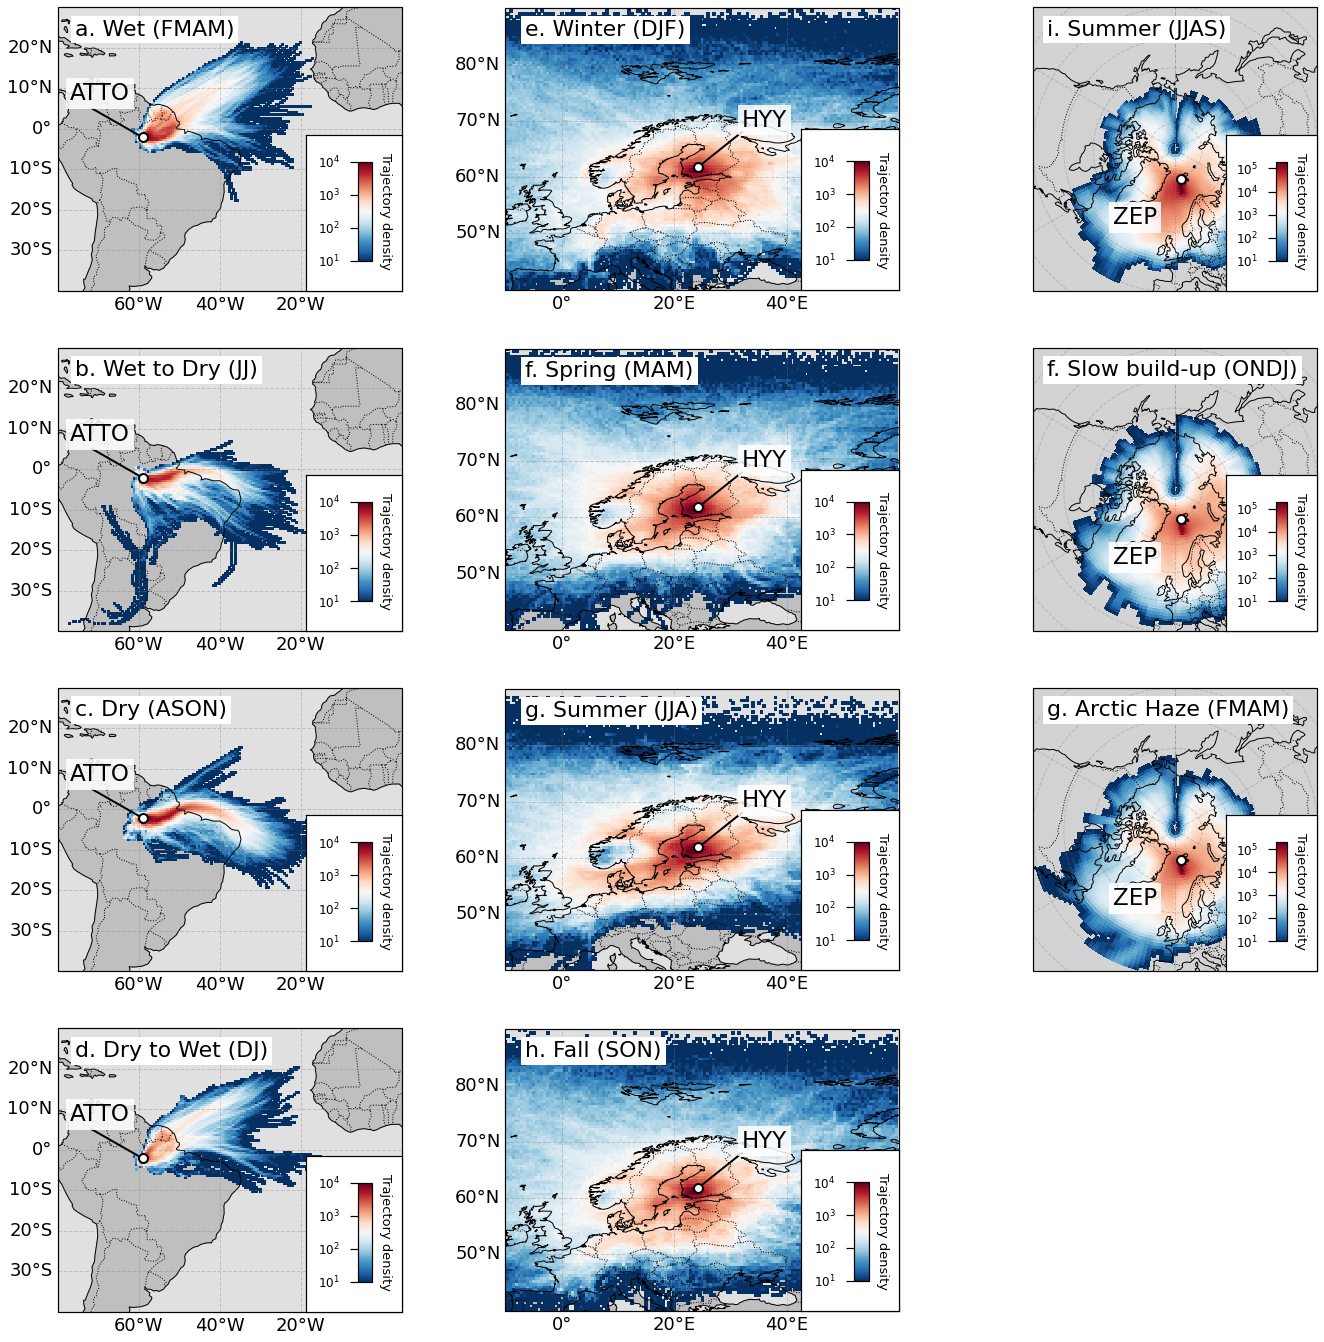

In [16]:
fig = plt.figure(figsize=(24,24))


list_seasons = ['a. Wet (FMAM)', 'b. Wet to Dry (JJ)', 'c. Dry (ASON)', 'd. Dry to Wet (DJ)']
list_subs = [1, 4, 7, 10]
for i in range(4):
        ax = fig.add_subplot(4, 3, list_subs[i], projection=ccrs.PlateCarree())
        plot_traj_atto(ax, list_ds_atto[i], list_array_freq_atto[i], 0.5)
        # text upper left corner transformed
        ax.text(0.05, 0.9, list_seasons[i], fontsize=22, 
                transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='None', alpha=1))

list_seasons = ['e. Winter (DJF)', 'f. Spring (MAM)', 'g. Summer (JJA)', 'h. Fall (SON)']
list_subs = [2, 5, 8, 11]
for i in range(4):
        ax = fig.add_subplot(4, 3, list_subs[i], projection=ccrs.PlateCarree())
        plot_traj_hyytiala(ax, list_ds_hyytiala[i], list_array_freq_hyytiala[i], 0.5, -10, 60)
        # text upper left corner transformed
        ax.text(0.05, 0.9, list_seasons[i], fontsize=22, 
                transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='None', alpha=1))

list_seasons = ['i. Summer (JJAS)', 'f. Slow build-up (ONDJ)', 'g. Arctic Haze (FMAM)']
list_subs = [3, 6, 9]
for i in range(3):
        ax = fig.add_subplot(4, 3, list_subs[i], projection=ccrs.NorthPolarStereo())
        plot_traj_zeppelin(ax, list_array_freq_zeppelin[i], inc)
        ax.text(0.05, 0.9, list_seasons[i], fontsize=22, 
                transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='None', alpha=1))
        
# save
path = '/Users/theodorekhadir/Documents/PHD/sinkVSsource/figures'
plt.savefig(path + '/fig_hits_trajs.png', bbox_inches='tight', dpi=300)

# 11. Fig. S11 | Recent rainfall versus particle concentrations under different solar radiation exposures  

In [39]:
def dark_ds(ds):
    return ds.sel(time=(ds.Acc_solar_radiation_6h.values<30))
def light_ds(ds):
    return ds.sel(time=(ds.Acc_solar_radiation_6h.values>=1000))
def wet_ds(ds):
    return ds.sel(time=(ds.Acc_rainfall_6h.values>0))
def dry_ds(ds):
    return ds.sel(time=(ds.Acc_rainfall_6h.values==0))

# normalize concentration with reference value
def normalize(ds, xvar, yvar, val_ref):
    ds[yvar+'_norm_'+xvar] = (['time'], ds[yvar].values/val_ref*100)
    
# calculate medians in bins of a given variables
def median_bins(ds, xvar, yvar, nbins):
    if xvar == 'Acc_rainfall_6h':
        ds_slice = ds.sel(time=(ds.Acc_rainfall_6h.values>0))
        val_ref = ds.sel(time=(ds.Acc_rainfall_6h.values==0))[yvar].median().values
    elif xvar == 'Acc_solar_radiation_6h':
        ds_slice = ds.copy()
        val_ref = ds_slice[yvar].median().values
    
    normalize(ds_slice, xvar, yvar, val_ref)
    bins = np.linspace(0, ds_slice[xvar].quantile(0.9), nbins)
    mid_bins = (bins[1:]+bins[:-1])/2
    
    # find median of yvar in each bin of yvar in ds_slice
    medians = []
    ndata_medians = []
    for i in range(len(bins)-1):
        slice = ds_slice.sel(time=(ds_slice[xvar].values>=bins[i]) & 
                             (ds_slice[xvar].values<bins[i+1]))[yvar+'_norm_'+xvar]
        medians.append(slice.median().values)
        ndata_medians.append(slice.shape[0])
        
    return mid_bins, medians, ndata_medians

Text(0.07, 0.5, '% Concentration change (compared to no precipitation)')

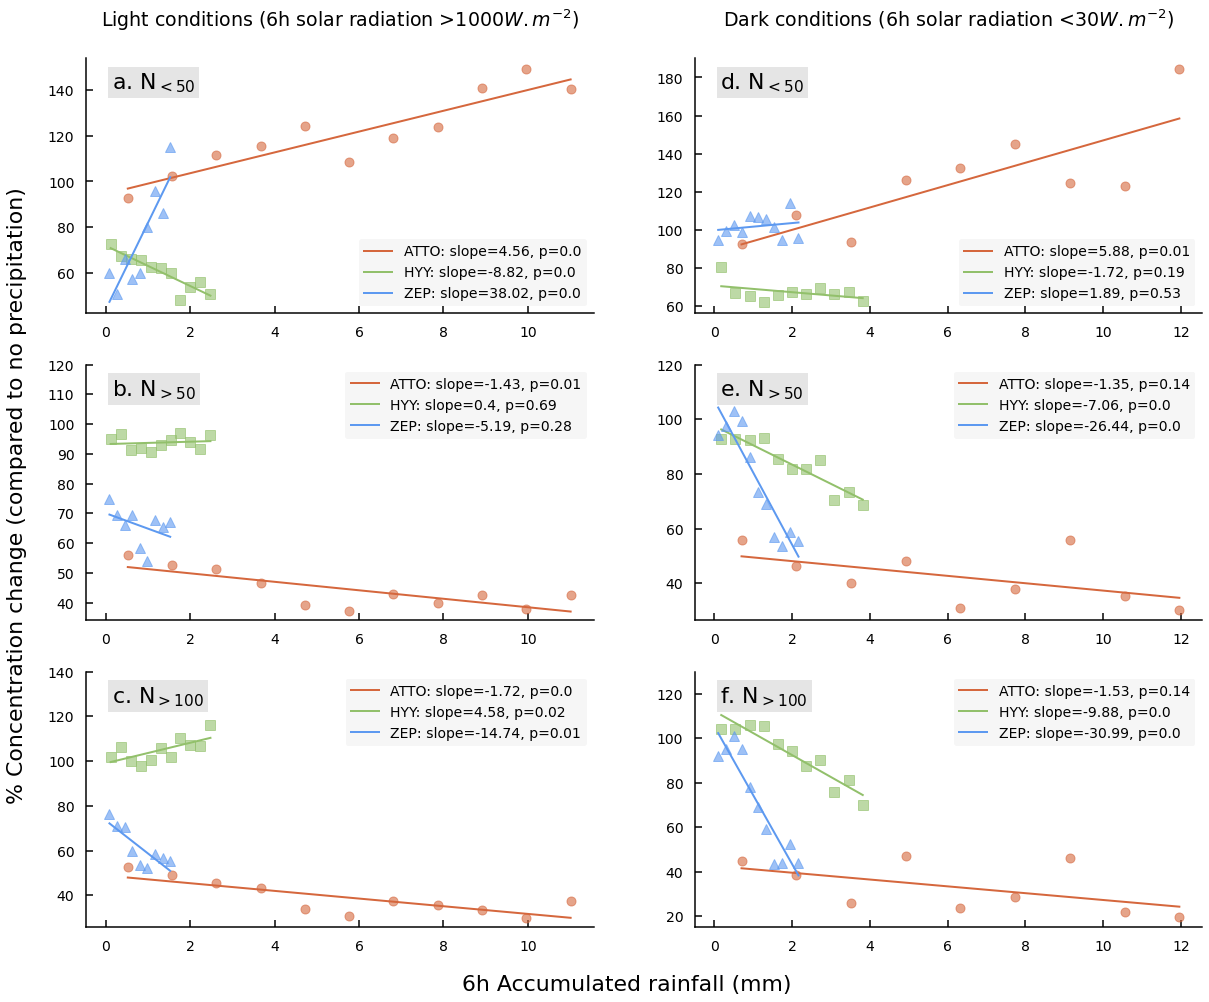

In [40]:
from scipy import stats

def style(ax):
    fontsize = 14
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(1.5)
        ax.spines[axis].set_color('k')
    # remove top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(direction='in', length=7, width=1.5, pad=12, bottom=True, top=False, 
                   left=True, right=False, labelsize=fontsize)


def plot_median_bins(ax, xvar, yvar, list_nbins, list_ds, loc):
    list_mid_bins = []
    list_medians = []
    list_ndata_medians = []
    for ds, nbins in zip(list_ds, list_nbins):    
        mid_bins, medians, ndata_medians = median_bins(ds, xvar, yvar, nbins)
        list_mid_bins.append(mid_bins)
        list_medians.append(medians)
        list_ndata_medians.append(ndata_medians)
    
    colors = [(213/255, 103/255, 61/255), (146/255, 192/255, 107/255), (93/255, 153/255, 240/255)]   
    markers = ['o', 's', '^']
    markersizes = [9, 10, 10]
    stations = ['ATTO', 'HYY', 'ZEP']
    for i in range(3):
        # linear regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(list_mid_bins[i], list_medians[i])
        
        ax.plot(list_mid_bins[i], list_medians[i], 'o', color=colors[i], marker=markers[i],
                markersize=markersizes[i], markeredgecolor=colors[i], alpha=0.6)
        
        ax.plot(list_mid_bins[i], slope*np.array(list_mid_bins[i])+intercept, '-', color=colors[i], linewidth=2,
                label=stations[i]+': slope='+str(round(slope, 2))+', p='+str(round(p_value, 2)))
    style(ax)
    # legend lower right
    # frameon with light grey background with alpha=0.5
    ax.legend(loc=loc, fontsize=14, frameon=True, facecolor='lightgrey', edgecolor='none', framealpha=0.2)

fig = plt.figure(figsize=(20,16))
list_nbins = [12, 12, 10]
list_ds = [light_ds(ds_atto), light_ds(ds_hyytiala), light_ds(ds_zeppelin)]
ax = fig.add_subplot(321)
ax.text(0.05, 0.95, r'a. N$_{<50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
ax.set_title(r'Light conditions (6h solar radiation >1000$W.m^{-2}$)', fontsize=19, y=1.1)
plot_median_bins(ax, 'Acc_rainfall_6h', 'N_10_50', list_nbins, list_ds, 'lower right')
ax = fig.add_subplot(323)
ax.text(0.05, 0.95, r'b. N$_{>50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
plot_median_bins(ax, 'Acc_rainfall_6h', 'N_50_500', list_nbins, list_ds, 'upper right')
ax.set_ylim(top=120)
ax = fig.add_subplot(325)
ax.text(0.05, 0.95, r'c. N$_{>100}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
plot_median_bins(ax, 'Acc_rainfall_6h', 'N_100_500', list_nbins, list_ds, 'upper right')
ax.set_ylim(top=140)

list_nbins = [10, 12, 12]
ax = fig.add_subplot(322)
ax.set_title(r'Dark conditions (6h solar radiation <30$W.m^{-2}$)', fontsize=19, y=1.1)
list_ds = [dark_ds(ds_atto), dark_ds(ds_hyytiala), dark_ds(ds_zeppelin)]
ax.text(0.05, 0.95, r'd. N$_{<50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
plot_median_bins(ax, 'Acc_rainfall_6h', 'N_10_50', list_nbins, list_ds, 'lower right')
ax = fig.add_subplot(324)
ax.text(0.05, 0.95, r'e. N$_{>50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
plot_median_bins(ax, 'Acc_rainfall_6h', 'N_50_500', list_nbins, list_ds, 'upper right')
ax.set_ylim(top=120)
ax = fig.add_subplot(326)
ax.text(0.05, 0.95, r'f. N$_{>100}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
plot_median_bins(ax, 'Acc_rainfall_6h', 'N_100_500', list_nbins, list_ds, 'upper right')
# set sup bound only
ax.set_ylim(top=130)

# text shared by all subplots for ylabel
fig.text(0.5, 0.07, '6h Accumulated rainfall (mm)', ha='center', fontsize=22)
fig.text(0.07, 0.5, '% Concentration change (compared to no precipitation)', va='center', rotation='vertical', fontsize=22)

# path = '/Users/theodorekhadir/Documents/PHD/sinkVSsource/figures/'
# # save figure
# fig.savefig(path+'fig4_darkVSlight.png', bbox_inches='tight', dpi=300)

# 12. Fig. S12 | Recent solar radiation versus particle concentrations under different rainfall exposures  

Text(0.07, 0.5, '% Concentration change (compared to all data median concentration)')

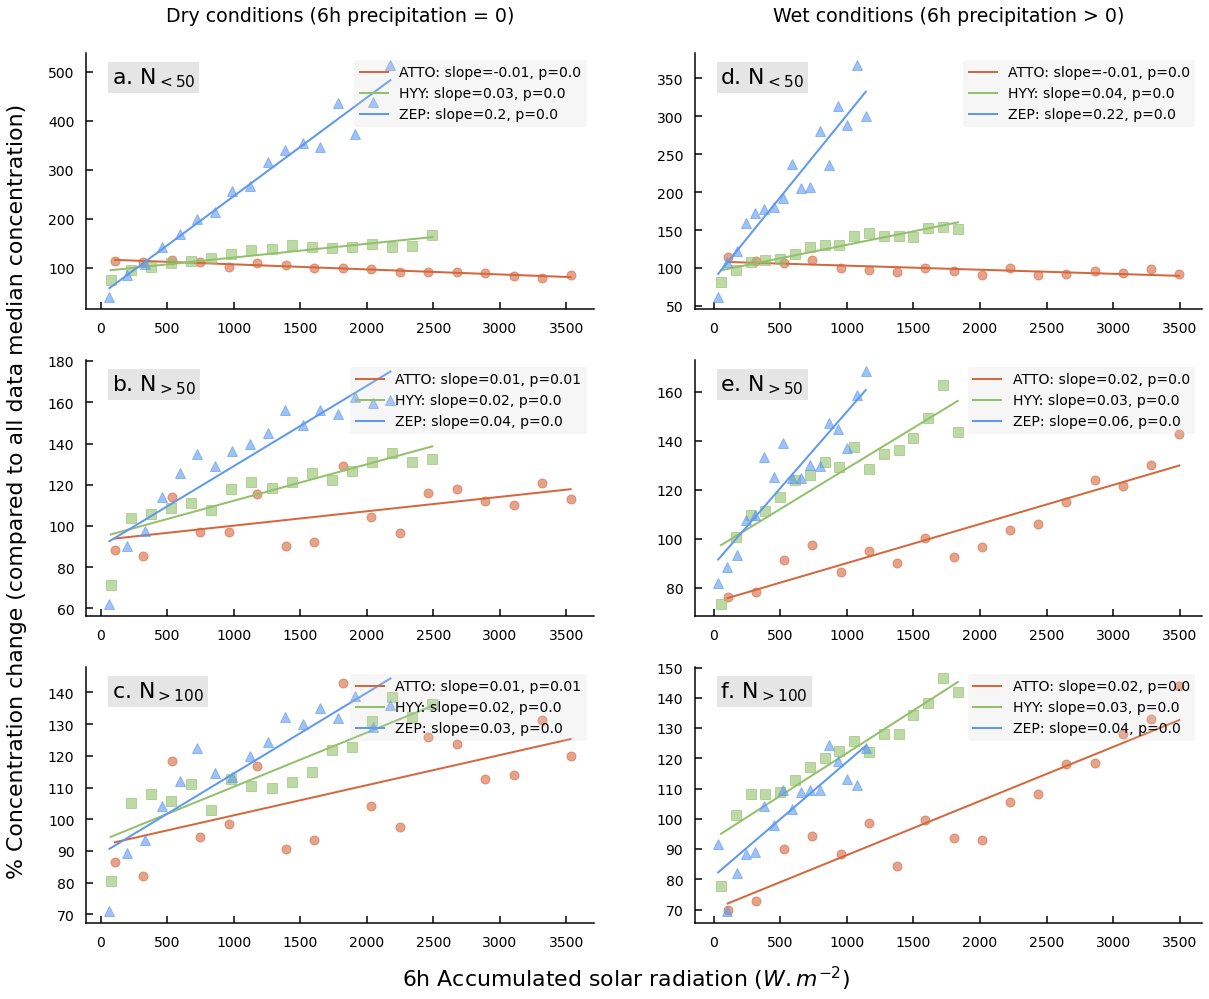

In [42]:
from scipy import stats

def style(ax):
    fontsize = 14
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(1.5)
        ax.spines[axis].set_color('k')
    # remove top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(direction='in', length=7, width=1.5, pad=12, bottom=True, top=False, 
                   left=True, right=False, labelsize=fontsize)


def plot_median_bins(ax, xvar, yvar, list_nbins, list_ds, loc):
    list_mid_bins = []
    list_medians = []
    list_ndata_medians = []
    for ds, nbins in zip(list_ds, list_nbins):    
        mid_bins, medians, ndata_medians = median_bins(ds, xvar, yvar, nbins)
        list_mid_bins.append(mid_bins)
        list_medians.append(medians)
        list_ndata_medians.append(ndata_medians)
    
    colors = [(213/255, 103/255, 61/255), (146/255, 192/255, 107/255), (93/255, 153/255, 240/255)]   
    markers = ['o', 's', '^']
    markersizes = [9, 10, 10]
    stations = ['ATTO', 'HYY', 'ZEP']
    for i in range(3):
        # linear regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(list_mid_bins[i], list_medians[i])
        
        ax.plot(list_mid_bins[i], list_medians[i], 'o', color=colors[i], marker=markers[i],
                markersize=markersizes[i], markeredgecolor=colors[i], alpha=0.6)
        
        ax.plot(list_mid_bins[i], slope*np.array(list_mid_bins[i])+intercept, '-', color=colors[i], linewidth=2,
                label=stations[i]+': slope='+str(round(slope, 2))+', p='+str(round(p_value, 2)))
    style(ax)
    # legend lower right
    ax.legend(loc=loc, fontsize=14, frameon=True, facecolor='lightgrey', edgecolor='none', framealpha=0.2)

fig = plt.figure(figsize=(20,16))
list_nbins = [18,18,18]
list_ds = [dry_ds(ds_atto), dry_ds(ds_hyytiala), dry_ds(ds_zeppelin)]
ax = fig.add_subplot(321)
ax.text(0.05, 0.95, r'a. N$_{<50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
ax.set_title('Dry conditions (6h precipitation = 0)', fontsize=19, y=1.1)
plot_median_bins(ax, 'Acc_solar_radiation_6h', 'N_10_50', list_nbins, list_ds, 'upper right')
ax = fig.add_subplot(323)
ax.text(0.05, 0.95, r'b. N$_{>50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
plot_median_bins(ax, 'Acc_solar_radiation_6h', 'N_50_500', list_nbins, list_ds, 'upper right')
# ax.set_ylim(top=120)
ax = fig.add_subplot(325)
ax.text(0.05, 0.95, r'c. N$_{>100}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
plot_median_bins(ax, 'Acc_solar_radiation_6h', 'N_100_500', list_nbins, list_ds, 'upper right')
# ax.set_ylim(top=140)

list_nbins = [18, 18, 18]
ax = fig.add_subplot(322)
ax.set_title('Wet conditions (6h precipitation > 0)', fontsize=19, y=1.1)
list_ds = [wet_ds(ds_atto), wet_ds(ds_hyytiala), wet_ds(ds_zeppelin)]
ax.text(0.05, 0.95, r'd. N$_{<50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
plot_median_bins(ax, 'Acc_solar_radiation_6h', 'N_10_50', list_nbins, list_ds, 'upper right')
ax = fig.add_subplot(324)
ax.text(0.05, 0.95, r'e. N$_{>50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
plot_median_bins(ax, 'Acc_solar_radiation_6h', 'N_50_500', list_nbins, list_ds, 'upper right')
# ax.set_ylim(top=120)
ax = fig.add_subplot(326)
ax.text(0.05, 0.95, r'f. N$_{>100}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
plot_median_bins(ax, 'Acc_solar_radiation_6h', 'N_100_500', list_nbins, list_ds, 'upper right')
# set sup bound only
# ax.set_ylim(top=130)

# text shared by all subplots for ylabel
fig.text(0.5, 0.07, r'6h Accumulated solar radiation $(W.m^{-2})$', ha='center', fontsize=22)
fig.text(0.07, 0.5, '% Concentration change (compared to all data median concentration)', va='center', rotation='vertical', fontsize=22)

# path = '/Users/theodorekhadir/Documents/PHD/sinkVSsource/figures/'
# # save figure
# fig.savefig(path+'fig4_wetVSdry.png', bbox_inches='tight', dpi=300)

# 10. Fig. S10 | PNSD vs. 6h accumulated solar radiation along back trajectories  

In [8]:
# calculate the median of a given variable for each diameter bin and concentration bin
def median_var_pnsd(y_max, y_width_bin, ds, threshold, name_var):
    
    y_bin = np.arange(0,y_max,y_width_bin)
    
    Dp = ds.D.values
    print(Dp.shape)
    logDp = np.log10(Dp)
    interval = np.array([logDp[i]-logDp[i-1] for i in range(1,np.size(Dp))])/2
    centers = logDp[:-1]+interval
    centers_bis = np.append(logDp[0]-interval[0], centers)
    centers_bis = np.append(centers_bis, logDp[-1]+interval[-1])
    size_bin = 10**(centers_bis)
    
    # initialize nan array that will contain bin concentration
    cm_var = np.zeros((len(Dp), y_bin.shape[0]+1))*np.nan
    cm_count = np.zeros((len(Dp), y_bin.shape[0]+1))*np.nan

    ds = ds[[name_var, 'pnsd']]

    lenDp = len(Dp)
    for iD, D in enumerate(Dp):
        # print(iD, '/', lenDp)
        ds_D = ds.sel(D=D)
        for iy, y in enumerate(y_bin):
            ds_slice = ds_D.sel(time=((ds_D['pnsd']>=y)&(ds_D['pnsd']<y+y_width_bin)))
            cm_count[iD, iy] = len(ds_slice.time)
            
            if cm_count[iD, iy] <= threshold:
                cm_var[iD, iy] = np.nan
                
            else:
                cm_var[iD, iy] = ds_slice[name_var].median()
        
    return cm_var, cm_count, size_bin

# find the size of each diameter bin
def find_size_bin(ds):
    Dp = ds.D.values
    logDp = np.log10(Dp)
    interval = np.array([logDp[i]-logDp[i-1] for i in range(1,np.size(Dp))])/2
    centers = logDp[:-1]+interval
    centers_bis = np.append(logDp[0]-interval[0], centers)
    centers_bis = np.append(centers_bis, logDp[-1]+interval[-1])
    return 10**(centers_bis)

size_bin_atto = find_size_bin(ds_atto)
size_bin_hyytiala = find_size_bin(ds_hyytiala)
size_bin_zeppelin = find_size_bin(ds_zeppelin)

In [9]:
# slices of the dataset for each station
def select_seasons(list_month, ds):
    ds_season = ds.sel(time=ds.time.dt.month.isin(list_month))
    return ds_season

ds_atto_wet = select_seasons([2,3,4,5], ds_atto)
ds_atto_wet2dry = select_seasons([6,7], ds_atto)
ds_atto_dry = select_seasons([8,9,10,11], ds_atto)
ds_atto_dry2wet = select_seasons([12,1], ds_atto)
ds_atto_seasons = [ds_atto_wet, ds_atto_wet2dry, ds_atto_dry, ds_atto_dry2wet]

# ATTO
y_max=8000
y_width_bin=200
threshold=30
name_var = 'Acc_solar_radiation_6h'
list_ds_atto = [ds_atto]
list_cm_precip_atto = [median_var_pnsd(y_max, y_width_bin, ds, threshold, name_var)[0] for ds in list_ds_atto]

ds_hyytiala_djf = select_seasons([12,1,2], ds_hyytiala)
ds_hyytiala_mam = select_seasons([3,4,5], ds_hyytiala)
ds_hyytiala_jja = select_seasons([6,7,8], ds_hyytiala)
ds_hyytiala_son = select_seasons([9,10,11], ds_hyytiala)
ds_hyytiala_seasons = [ds_hyytiala_djf, ds_hyytiala_mam, ds_hyytiala_jja, ds_hyytiala_son]

# HHYTIALA
y_max=12000
y_width_bin=100
threshold=20
vmin=0
vmax=10
name_var = 'Acc_solar_radiation_6h'
list_ds_hyytiala = [ds_hyytiala]
list_cm_precip_hyytiala = [median_var_pnsd(y_max, y_width_bin, ds, threshold, name_var)[0] for ds in list_ds_hyytiala]

ds_zeppelin_jjas = select_seasons([6,7,8, 9], ds_zeppelin)
ds_zeppelin_ondj = select_seasons([10,11,12,1], ds_zeppelin)
ds_zeppelin_fmam = select_seasons([2,3,4,5], ds_zeppelin)
ds_zeppelin_seasons = [ds_zeppelin_jjas, ds_zeppelin_ondj, ds_zeppelin_fmam]

# ZEPPELIN
y_max=2000
y_width_bin=30
threshold=20
name_var = 'Acc_solar_radiation_6h'
list_ds_zeppelin = [ds_zeppelin]
list_cm_precip_zeppelin = [median_var_pnsd(y_max, y_width_bin, ds, threshold, name_var)[0] for ds in list_ds_zeppelin]

(104,)
(33,)
(33,)


In [11]:
# ATTO
list_ds_atto = [ds_atto_wet, ds_atto_wet2dry, ds_atto_dry, ds_atto_dry2wet]
list_groupby_atto = []
lim_bin = 5000
width_bin = 500
bins = np.arange(0, lim_bin, width_bin)
for iseason, ds_season in enumerate(list_ds_atto):
    prop = (ds_season.groupby_bins('Acc_solar_radiation_6h', bins).count()['Acc_solar_radiation_6h']/len(ds_season['Acc_solar_radiation_6h'])*100).values
    list_groupby_atto.append(prop)
    
# Hyytiälä
list_ds_hyytiala = [ds_hyytiala_djf, ds_hyytiala_mam, ds_hyytiala_jja, ds_hyytiala_son]
list_groupby_hyytiala = []
lim_bin = 5000
width_bin = 500
bins = np.arange(0, lim_bin, width_bin)
for iseason, ds_season in enumerate(list_ds_hyytiala):
    prop = (ds_season.groupby_bins('Acc_solar_radiation_6h', bins).count()['Acc_solar_radiation_6h']/len(ds_season['Acc_solar_radiation_6h'])*100).values
    list_groupby_hyytiala.append(prop)
    
# Zeppelin
list_ds_zeppelin = [ds_zeppelin_jjas, ds_zeppelin_ondj, ds_zeppelin_fmam]
list_groupby_zeppelin = []
lim_bin = 5000
width_bin = 500
bins = np.arange(0, lim_bin, width_bin)
for iseason, ds_season in enumerate(list_ds_zeppelin):
    prop = (ds_season.groupby_bins('Acc_solar_radiation_6h', bins).count()['Acc_solar_radiation_6h']/len(ds_season['Acc_solar_radiation_6h'])*100).values
    list_groupby_zeppelin.append(prop)

In [12]:
size_bin_atto = find_size_bin(ds_atto)
size_bin_hyytiala = find_size_bin(ds_hyytiala)
size_bin_zeppelin = find_size_bin(ds_zeppelin)

In [13]:
def thickax(ax):
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.3)
        ax.spines[axis].set_color('k')
    plt.rc('axes', linewidth=0.2)
    fontsize = 12.5
    ax = plt.gca()
    ax.tick_params(direction='out', length=8, width=1.3, pad=10, bottom=True, top=False, left=True, right=False, color='k')
    ax.tick_params(which='minor', length=4, color='k', width=1.3)
    

# create a figure with a bar plot with the proportion of 'Acc_solar_radiation_6h' in given rainfall bins
# each season is represented by a different color
def bar_plot(ax, list_groupby_station, list_ds_seasons, bins_rainfall, list_seasons, list_colors, width=1, pos_zero=-7):
    for iseason, ds_season in enumerate(list_ds_seasons):
        prop = list_groupby_station[iseason]
        bins_plot = bins_rainfall
        ax.bar(bins_plot[:-1]+(iseason-1.5)*width, prop,
                width=width, color=list_colors[iseason], label=list_seasons[iseason], edgecolor='k', linewidth=0.5)
    
    # legend
    l = ax.legend(frameon=False, fontsize=14, title='Season', loc='upper right')
    plt.setp(l.get_title(),fontsize=15)
    
    for iseason, ds_season in enumerate(list_ds_seasons):
        prop = len(ds_season.sel(time=ds_season['Acc_solar_radiation_6h']==0).time)/len(ds_season.time)*100
        ax.bar(pos_zero-width/2*3+iseason*width, prop,
            width=width, color=list_colors[iseason], edgecolor='k', linewidth=0.5)
        
def plot_bars_seasons(ax, list_groupby_station, list_ds_seasons, list_seasons, list_colors, lim_bin, width_bin, width, pos_zero=-7):
    bins = np.arange(0, lim_bin, width_bin)
    xticks = bar_plot(ax, list_groupby_station, list_ds_seasons, bins, list_seasons, list_colors, width=width, pos_zero=pos_zero)
    list_xlabels = ['>'+str(low_lim)+'≤'+str(up_lim) for low_lim, 
                    up_lim in zip(np.arange(0, lim_bin+width_bin, width_bin)[:-1], np.arange(0, lim_bin+width_bin, width_bin)[1:])]
    # remove blank space between r'$\geq$' and the number in list_xlabels
    list_xlabels = [x.replace(' ', '') for x in list_xlabels]
    list_xlabels[1::2] = ['']*len(list_xlabels[1::2])
    list_xlabels = [r'$=0$']+list_xlabels
    ax.set_xticks(np.insert(bins, 0, pos_zero))
    ax.set_xticklabels(list_xlabels, fontsize=12.5)
    # fontsize y ticks label
    ax.tick_params(axis='y', labelsize=15)
    ax.set_xticklabels(list_xlabels, rotation=45, fontsize=13)
    # x label
    ax.set_xlabel(r'6h accumulated solar radiation ($W.m^{-2}$)', fontsize=15)
    thickax(ax)

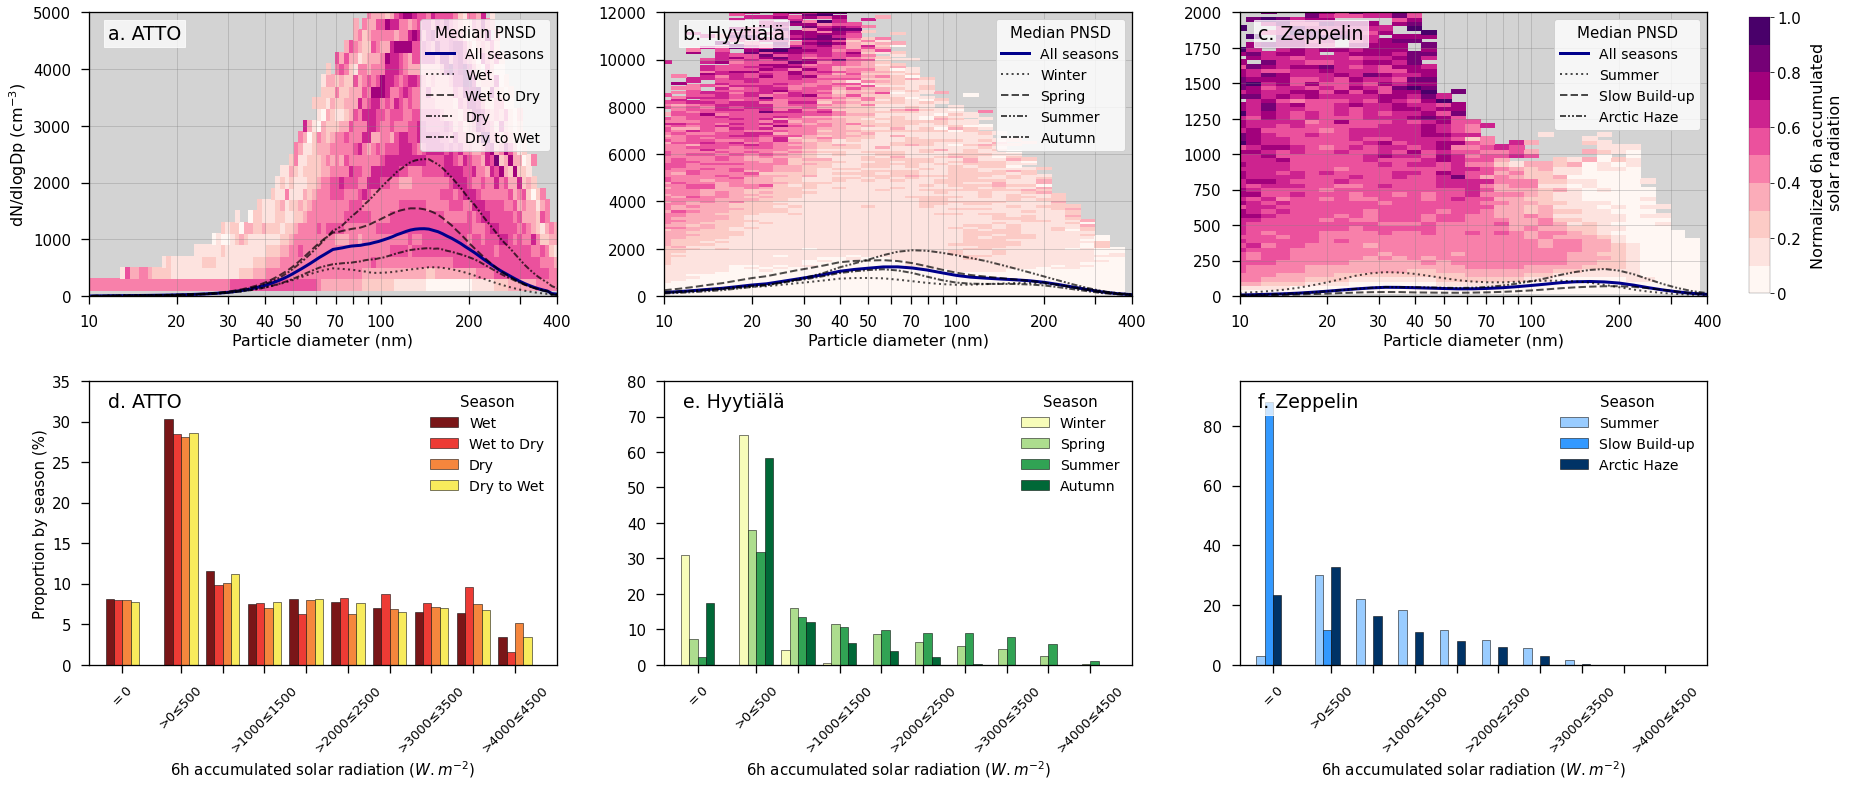

In [16]:
from turtle import title

def thickax_pink_plot(ax):
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.3)
        ax.spines[axis].set_color('k')
    plt.rc('axes', linewidth=0.2)
    fontsize = 15
    ax = plt.gca()
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    ax.tick_params(direction='out', length=8, width=1.3, pad=10, bottom=True, top=False, left=True, right=False, color='k')
    ax.tick_params(which='minor', length=4, color='k', width=1.3)
    
fig = plt.figure(num=None, figsize=(29, 12))

y_lim = [7000]
y_max=8000
y_width_bin=200
threshold=30
list_seasons = ['a. ATTO']
max = np.nanmax([np.nanmax(cm) for cm in list_cm_precip_atto])
ax = plt.subplot(2,3,1)
ax.set_facecolor("lightgrey")
X, Y = np.meshgrid(size_bin_atto[:-1], np.arange(0,y_max+y_width_bin,y_width_bin)+y_width_bin/2)
cmap = plt.get_cmap('RdPu',lut=10)
cm_precip_bis = list_cm_precip_atto[0]/max
mappable = ax.pcolor(X, Y, cm_precip_bis.T, cmap=cmap, norm=mpl.colors.Normalize(vmin=0, vmax=1))
thickax_pink_plot(ax)
ax.set_ylim(0,5000)
ax.set_xlim(10,400)
ax.set_xscale('log')
ax.set_xticks([10,20,30,40,50,60,70,80,90,100,200,300,400])
ax.set_xticklabels([10,20,30,40,50,'',70,'','',100,200,'',400],fontsize=15)
ax.set_ylabel(r'dN/dlogDp (cm$^{-3}$)',fontsize=16)
ax.text(0.04, 0.96, list_seasons[0], transform=ax.transAxes, fontsize=19,
        va='top', bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))

ax.set_xlabel('Particle diameter (nm)',fontsize=16)

ax.plot(ds_atto.D, ds_atto['pnsd'].median(dim='time'),color='darkblue', 
        linewidth=3, label='All seasons')

linestyles = ['dotted', 'dashed', (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1))]
list_seasons = ['Wet', 'Wet to Dry', 'Dry', 'Dry to Wet']
for iseason, ds_season in enumerate(ds_atto_seasons):
    ax.plot(ds_season.D, ds_season['pnsd'].median(dim='time'),color='k', 
        linewidth=2, label=list_seasons[iseason], linestyle=linestyles[iseason], alpha=0.7)
l=plt.legend(frameon=True, fontsize=14, title='Median PNSD', loc='upper right')
# legend title fontsize
plt.setp(l.get_title(),fontsize=15)
ax.grid(True, alpha=0.4, c='grey')

y_lim = [12000]
y_max=12000
y_width_bin=100
threshold=20
count=0
list_seasons = ['b. Hyytiälä']
max = np.nanmax([np.nanmax(cm) for cm in list_cm_precip_hyytiala])
ax = plt.subplot(2,3,2)
ax.set_facecolor("lightgrey")
X, Y = np.meshgrid(size_bin_hyytiala[:-1], np.arange(0,y_max+y_width_bin,y_width_bin)+y_width_bin/2)
cmap = plt.get_cmap('RdPu',lut=10)
cm_precip_bis = list_cm_precip_hyytiala[0]/max
mappable = ax.pcolor(X, Y, cm_precip_bis.T, cmap=cmap, norm=mpl.colors.Normalize(vmin=0, vmax=1))
thickax_pink_plot(ax)
ax.set_ylim(0,12000)
ax.set_xlim(10,400)
ax.set_xscale('log')
ax.set_xticks([10,20,30,40,50,60,70,80,90,100,200,300,400])
ax.set_xticklabels([10,20,30,40,50,'',70,'','',100,200,'',400],fontsize=15)
ax.text(0.04, 0.96, list_seasons[0], transform=ax.transAxes, fontsize=19,
        va='top', bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))

ax.set_xlabel('Particle diameter (nm)',fontsize=16)

ax.plot(ds_hyytiala.D, ds_hyytiala['pnsd'].median(dim='time'),color='darkblue', 
        linewidth=3, label='All seasons')

linestyles = ['dotted', 'dashed', (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1))]
list_seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
for iseason, ds_season in enumerate(ds_hyytiala_seasons):
    ax.plot(ds_season.D, ds_season['pnsd'].median(dim='time'),color='k', 
        linewidth=2, label=list_seasons[iseason], linestyle=linestyles[iseason], alpha=0.7)
l=plt.legend(frameon=True, fontsize=14, title='Median PNSD')
# legend title fontsize
plt.setp(l.get_title(),fontsize=15)
ax.grid(True, alpha=0.4, c='grey')


y_lim = [2000]
y_max=2000
y_width_bin=30
threshold=20
count=0
list_seasons = ['c. Zeppelin']
max = np.nanmax([np.nanmax(cm) for cm in list_cm_precip_zeppelin])
ax = plt.subplot(2,3,3)
ax.set_facecolor("lightgrey")
X, Y = np.meshgrid(size_bin_zeppelin[:-1], np.arange(0,y_max+y_width_bin,y_width_bin)+y_width_bin/2)
cmap = plt.get_cmap('RdPu',lut=10)
cm_precip_bis = list_cm_precip_zeppelin[0]/max
mappable = ax.pcolor(X, Y, cm_precip_bis.T, cmap=cmap, norm=mpl.colors.Normalize(vmin=0, vmax=1))
thickax_pink_plot(ax)
ax.set_ylim(0,2000)
ax.set_xlim(10,400)
ax.set_xscale('log')
ax.set_xticks([10,20,30,40,50,60,70,80,90,100,200,300,400])
ax.set_xticklabels([10,20,30,40,50,'',70,'','',100,200,'',400],fontsize=15)
ax.text(0.04, 0.96, list_seasons[0], transform=ax.transAxes, fontsize=19,
        va='top', bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))

ax.set_xlabel('Particle diameter (nm)',fontsize=16)

ax.plot(ds_zeppelin.D, ds_zeppelin['pnsd'].median(dim='time'),color='darkblue', 
        linewidth=3, label='All seasons')

linestyles = ['dotted', 'dashed', (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1))]
list_seasons = ['Summer', 'Slow Build-up', 'Arctic Haze']
for iseason, ds_season in enumerate(ds_zeppelin_seasons):
    ax.plot(ds_season.D, ds_season['pnsd'].median(dim='time'),color='k', 
        linewidth=2, label=list_seasons[iseason], linestyle=linestyles[iseason], alpha=0.7)
l=plt.legend(frameon=True, fontsize=14, title='Median PNSD')
# legend title fontsize
plt.setp(l.get_title(),fontsize=15)
ax.grid(True, alpha=0.4, c='grey')



# ATTO
ax = plt.subplot(2,3,4)

list_colors = [(122/255, 22/255, 24/255), (237/255, 59/255, 53/255), (245/255, 134/255, 61/255), (248/255, 235/255, 92/255)]
list_seasons = ['Wet', 'Wet to Dry', 'Dry', 'Dry to Wet']
lim_bin = 5000
width_bin = 500
list_ds_atto = [ds_atto_wet, ds_atto_wet2dry, ds_atto_dry, ds_atto_dry2wet]

plot_bars_seasons(ax, list_groupby_atto, list_ds_atto, list_seasons, list_colors, lim_bin, width_bin, 100, pos_zero=-700)
ax.set_ylabel('Proportion by season (%)', fontsize=15)
ax.set_xlim(-1100, lim_bin-width_bin-0.1)
# ax.axvline(-4, color='k', linewidth=1, alpha=0.4)
ax.set_ylim(0, 35)
ax.text(0.04, 0.96, 'd. ATTO', transform=ax.transAxes, fontsize=19,
        va='top', bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))

# HYYTIALA
ax = plt.subplot(2,3,5)

list_colors = ['#f7fcb9','#addd8e','#31a354','#006837'] 
list_seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
lim_bin = 5000
width_bin = 500
list_ds_hyytiala = [ds_hyytiala_djf, ds_hyytiala_mam, ds_hyytiala_jja, ds_hyytiala_son]

plot_bars_seasons(ax, list_groupby_hyytiala, list_ds_hyytiala, list_seasons, list_colors, lim_bin, width_bin, 100, pos_zero=-700)
list_ds_hyytiala = [ds_hyytiala_djf, ds_hyytiala_mam, ds_hyytiala_jja, ds_hyytiala_son]
ax.set_xlim(-1100, lim_bin-width_bin-0.1)
# ax.axvline(-1.5, color='k', linewidth=1, alpha=0.4)
ax.set_ylim(0, 80)
ax.text(0.04, 0.96, 'e. Hyytiälä', transform=ax.transAxes, fontsize=19,
        va='top', bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))

# Zeppelin
ax = plt.subplot(2,3,6)
list_colors = ['#99ccff', '#3399ff', '#003366']
list_seasons = ['Summer', 'Slow Build-up', 'Arctic Haze']
lim_bin = 5000
width_bin = 500
list_ds_zeppelin = [ds_zeppelin_jjas, ds_zeppelin_ondj, ds_zeppelin_fmam]

plot_bars_seasons(ax, list_groupby_zeppelin, list_ds_zeppelin, list_seasons, list_colors, lim_bin, width_bin, 100, pos_zero=-700)
ax.set_xlim(-1100, lim_bin-width_bin-0.1)
# ax.axvline(-0.85, color='k', linewidth=1, alpha=0.4)
ax.set_ylim(0, 95)
ax.text(0.04, 0.96, 'f. Zeppelin', transform=ax.transAxes, fontsize=19,
        va='top', bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))


plt.subplots_adjust(wspace=0.23, hspace=0.3)

# vertical colorbar on the right of the 3rd subplot
ax = plt.subplot(2,3,3)
cbar_ax = fig.add_axes([0.92, 0.555, 0.01, 0.32])
cbar = fig.colorbar(mappable, cax=cbar_ax)
cbar.ax.tick_params(labelsize=15)
cbar.set_label('Normalized 6h accumulated\n solar radiation', fontsize=16, labelpad=10)
cbar.ax.set_yticklabels(['0','0.2','0.4','0.6','0.8','1.0'], fontsize=15)
for axis in ['top','bottom','left','right']:
    cbar_ax.spines[axis].set_linewidth(3)
    cbar_ax.spines[axis].set_color('k')
plt.rc('axes', linewidth=3)

# path = '/Users/theodorekhadir/Documents/PHD/Figures/S1_comparison/Supplementary/final/'
# plt.savefig(path+'seasonal_pinkplot_median6hSR_solarraditionregimes.jpg', dpi=300, bbox_inches='tight')

# 9. Fig. S9 | PNSD vs. 96h accumulated solar radiation along back trajectories  

In [19]:
ds_atto_wet = select_seasons([2,3,4,5], ds_atto)
ds_atto_wet2dry = select_seasons([6,7], ds_atto)
ds_atto_dry = select_seasons([8,9,10,11], ds_atto)
ds_atto_dry2wet = select_seasons([12,1], ds_atto)
ds_atto_seasons = [ds_atto_wet, ds_atto_wet2dry, ds_atto_dry, ds_atto_dry2wet]

# ATTO
y_max=8000
y_width_bin=200
threshold=30
name_var = 'Acc_solar_radiation_96h'
list_ds_atto = [ds_atto]
list_cm_precip_atto = [median_var_pnsd(y_max, y_width_bin, ds, threshold, name_var)[0] for ds in list_ds_atto]

ds_hyytiala_djf = select_seasons([12,1,2], ds_hyytiala)
ds_hyytiala_mam = select_seasons([3,4,5], ds_hyytiala)
ds_hyytiala_jja = select_seasons([6,7,8], ds_hyytiala)
ds_hyytiala_son = select_seasons([9,10,11], ds_hyytiala)
ds_hyytiala_seasons = [ds_hyytiala_djf, ds_hyytiala_mam, ds_hyytiala_jja, ds_hyytiala_son]

# HHYTIALA
y_max=12000
y_width_bin=100
threshold=20
vmin=0
vmax=10
name_var = 'Acc_solar_radiation_96h'
list_ds_hyytiala = [ds_hyytiala]
list_cm_precip_hyytiala = [median_var_pnsd(y_max, y_width_bin, ds, threshold, name_var)[0] for ds in list_ds_hyytiala]

ds_zeppelin_jjas = select_seasons([6,7,8, 9], ds_zeppelin)
ds_zeppelin_ondj = select_seasons([10,11,12,1], ds_zeppelin)
ds_zeppelin_fmam = select_seasons([2,3,4,5], ds_zeppelin)
ds_zeppelin_seasons = [ds_zeppelin_jjas, ds_zeppelin_ondj, ds_zeppelin_fmam]

# ZEPPELIN
y_max=2000
y_width_bin=30
threshold=20
name_var = 'Acc_solar_radiation_96h'
list_ds_zeppelin = [ds_zeppelin]
list_cm_precip_zeppelin = [median_var_pnsd(y_max, y_width_bin, ds, threshold, name_var)[0] for ds in list_ds_zeppelin]

(104,)
(33,)
(33,)


In [20]:
# ATTO
list_ds_atto = [ds_atto_wet, ds_atto_wet2dry, ds_atto_dry, ds_atto_dry2wet]
list_groupby_atto = []
lim_bin = 36000
width_bin = 2000
bins = np.arange(0, lim_bin, width_bin)
for iseason, ds_season in enumerate(list_ds_atto):
    prop = (ds_season.groupby_bins('Acc_solar_radiation_96h', bins).count()['Acc_solar_radiation_12h']/len(ds_season['Acc_solar_radiation_96h'])*100).values
    list_groupby_atto.append(prop)
    
# Hyytiälä
list_ds_hyytiala = [ds_hyytiala_djf, ds_hyytiala_mam, ds_hyytiala_jja, ds_hyytiala_son]
list_groupby_hyytiala = []
lim_bin = 36000
width_bin = 2000
bins = np.arange(0, lim_bin, width_bin)
for iseason, ds_season in enumerate(list_ds_hyytiala):
    prop = (ds_season.groupby_bins('Acc_solar_radiation_96h', bins).count()['Acc_solar_radiation_12h']/len(ds_season['Acc_solar_radiation_96h'])*100).values
    list_groupby_hyytiala.append(prop)
    
# Zeppelin
list_ds_zeppelin = [ds_zeppelin_jjas, ds_zeppelin_ondj, ds_zeppelin_fmam]
list_groupby_zeppelin = []
lim_bin = 36000
width_bin = 2000
bins = np.arange(0, lim_bin, width_bin)
for iseason, ds_season in enumerate(list_ds_zeppelin):
    prop = (ds_season.groupby_bins('Acc_solar_radiation_96h', bins).count()['Acc_solar_radiation_12h']/len(ds_season['Acc_solar_radiation_96h'])*100).values
    list_groupby_zeppelin.append(prop)

In [21]:
def thickax(ax):
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.3)
        ax.spines[axis].set_color('k')
    plt.rc('axes', linewidth=0.2)
    fontsize = 12.5
    ax = plt.gca()
    ax.tick_params(direction='out', length=8, width=1.3, pad=10, bottom=True, top=False, left=True, right=False, color='k')
    ax.tick_params(which='minor', length=4, color='k', width=1.3)
    

# create a figure with a bar plot with the proportion of 'Acc_solar_radiation_96h' in given rainfall bins
# each season is represented by a different color
def bar_plot(ax, list_groupby_station, list_ds_seasons, bins_rainfall, list_seasons, list_colors, width=1, pos_zero=-7):
    for iseason, ds_season in enumerate(list_ds_seasons):
        prop = list_groupby_station[iseason]
        bins_plot = bins_rainfall
        ax.bar(bins_plot[:-1]+(iseason-1.5)*width, prop,
                width=width, color=list_colors[iseason], label=list_seasons[iseason], edgecolor='k', linewidth=0.5)
    
    # legend
    l = ax.legend(frameon=False, fontsize=14, title='Season', loc='upper right')
    plt.setp(l.get_title(),fontsize=15)
    
    for iseason, ds_season in enumerate(list_ds_seasons):
        prop = len(ds_season.sel(time=ds_season['Acc_solar_radiation_96h']==0).time)/len(ds_season.time)*100
        ax.bar(pos_zero-width/2*3+iseason*width, prop,
            width=width, color=list_colors[iseason], edgecolor='k', linewidth=0.5)
        
def plot_bars_seasons(ax, list_groupby_station, list_ds_seasons, list_seasons, list_colors, lim_bin, width_bin, width, pos_zero=-7):
    bins = np.arange(0, lim_bin, width_bin)
    xticks = bar_plot(ax, list_groupby_station, list_ds_seasons, bins, list_seasons, list_colors, width=width, pos_zero=pos_zero)
    list_xlabels = ['>'+str(low_lim)+'≤'+str(up_lim) for low_lim, 
                    up_lim in zip(np.arange(0, lim_bin+width_bin, width_bin)[:-1], np.arange(0, lim_bin+width_bin, width_bin)[1:])]
    list_xlabels = [x.replace(' ', '') for x in list_xlabels]
    list_xlabels[1::2] = ['']*len(list_xlabels[1::2])
    list_xlabels = [r'$=0$']+list_xlabels
    ax.set_xticks(np.insert(bins, 0, pos_zero))
    ax.tick_params(axis='y', labelsize=15)
    # x tick labels orientation 45°
    ax.set_xticklabels(list_xlabels, rotation=45, fontsize=13)
    ax.set_xlabel(r'96h accumulated solar radiation ($W.m^{-2}$)', fontsize=15)
    thickax(ax)

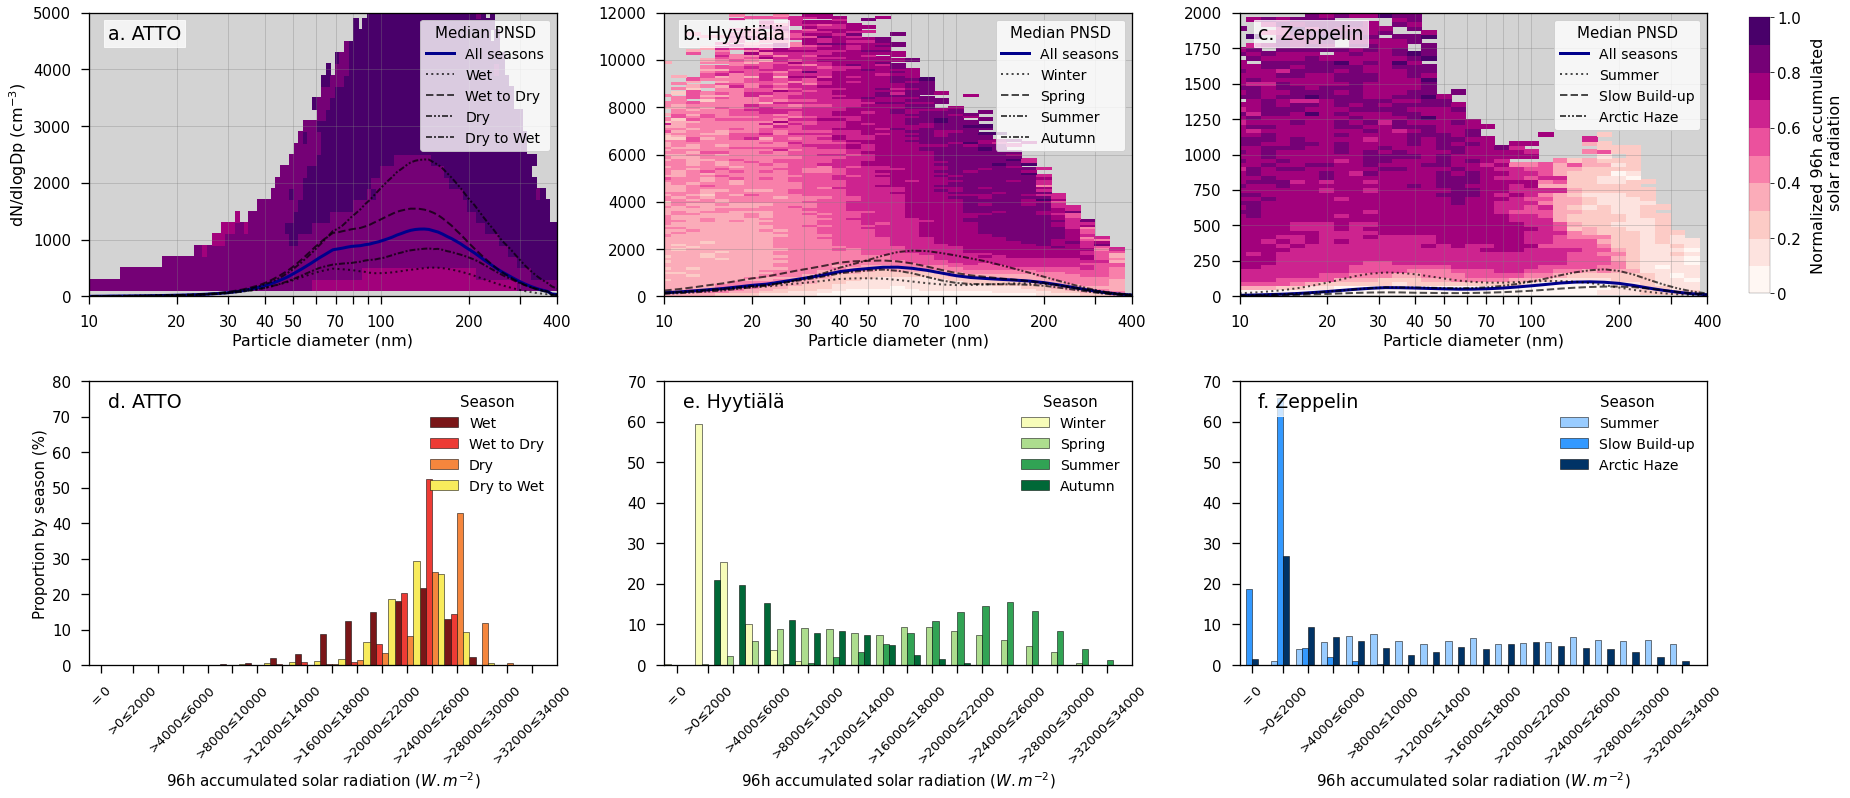

In [23]:
from turtle import title

def thickax_pink_plot(ax):
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.3)
        ax.spines[axis].set_color('k')
    plt.rc('axes', linewidth=0.2)
    fontsize = 15
    ax = plt.gca()
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    ax.tick_params(direction='out', length=8, width=1.3, pad=10, bottom=True, top=False, left=True, right=False, color='k')
    ax.tick_params(which='minor', length=4, color='k', width=1.3)
    
fig = plt.figure(num=None, figsize=(29, 12))

y_lim = [7000]
y_max=8000
y_width_bin=200
threshold=30
list_seasons = ['a. ATTO']
max = np.nanmax([np.nanmax(cm) for cm in list_cm_precip_atto])
ax = plt.subplot(2,3,1)
ax.set_facecolor("lightgrey")
X, Y = np.meshgrid(size_bin_atto[:-1], np.arange(0,y_max+y_width_bin,y_width_bin)+y_width_bin/2)
cmap = plt.get_cmap('RdPu',lut=10)
cm_precip_bis = list_cm_precip_atto[0]/max
mappable = ax.pcolor(X, Y, cm_precip_bis.T, cmap=cmap, norm=mpl.colors.Normalize(vmin=0, vmax=1))
thickax_pink_plot(ax)
ax.set_ylim(0,5000)
ax.set_xlim(10,400)
ax.set_xscale('log')
ax.set_xticks([10,20,30,40,50,60,70,80,90,100,200,300,400])
ax.set_xticklabels([10,20,30,40,50,'',70,'','',100,200,'',400],fontsize=15)
ax.set_ylabel(r'dN/dlogDp (cm$^{-3}$)',fontsize=16)
ax.text(0.04, 0.96, list_seasons[0], transform=ax.transAxes, fontsize=19,
        va='top', bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))

ax.set_xlabel('Particle diameter (nm)',fontsize=16)

ax.plot(ds_atto.D, ds_atto['pnsd'].median(dim='time'),color='darkblue', 
        linewidth=3, label='All seasons')

linestyles = ['dotted', 'dashed', (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1))]
list_seasons = ['Wet', 'Wet to Dry', 'Dry', 'Dry to Wet']
for iseason, ds_season in enumerate(ds_atto_seasons):
    ax.plot(ds_season.D, ds_season['pnsd'].median(dim='time'),color='k', 
        linewidth=2, label=list_seasons[iseason], linestyle=linestyles[iseason], alpha=0.7)
l=plt.legend(frameon=True, fontsize=14, title='Median PNSD', loc='upper right')
# legend title fontsize
plt.setp(l.get_title(),fontsize=15)
ax.grid(True, alpha=0.4, c='grey')

y_lim = [12000]
y_max=12000
y_width_bin=100
threshold=20
count=0
list_seasons = ['b. Hyytiälä']
max = np.nanmax([np.nanmax(cm) for cm in list_cm_precip_hyytiala])
ax = plt.subplot(2,3,2)
ax.set_facecolor("lightgrey")
X, Y = np.meshgrid(size_bin_hyytiala[:-1], np.arange(0,y_max+y_width_bin,y_width_bin)+y_width_bin/2)
cmap = plt.get_cmap('RdPu',lut=10)
cm_precip_bis = list_cm_precip_hyytiala[0]/max
mappable = ax.pcolor(X, Y, cm_precip_bis.T, cmap=cmap, norm=mpl.colors.Normalize(vmin=0, vmax=1))
thickax_pink_plot(ax)
ax.set_ylim(0,12000)
ax.set_xlim(10,400)
ax.set_xscale('log')
ax.set_xticks([10,20,30,40,50,60,70,80,90,100,200,300,400])
ax.set_xticklabels([10,20,30,40,50,'',70,'','',100,200,'',400],fontsize=15)
ax.text(0.04, 0.96, list_seasons[0], transform=ax.transAxes, fontsize=19,
        va='top', bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))

ax.set_xlabel('Particle diameter (nm)',fontsize=16)

ax.plot(ds_hyytiala.D, ds_hyytiala['pnsd'].median(dim='time'),color='darkblue', 
        linewidth=3, label='All seasons')

linestyles = ['dotted', 'dashed', (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1))]
list_seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
for iseason, ds_season in enumerate(ds_hyytiala_seasons):
    ax.plot(ds_season.D, ds_season['pnsd'].median(dim='time'),color='k', 
        linewidth=2, label=list_seasons[iseason], linestyle=linestyles[iseason], alpha=0.7)
l=plt.legend(frameon=True, fontsize=14, title='Median PNSD')
# legend title fontsize
plt.setp(l.get_title(),fontsize=15)
ax.grid(True, alpha=0.4, c='grey')


y_lim = [2000]
y_max=2000
y_width_bin=30
threshold=20
count=0
list_seasons = ['c. Zeppelin']
max = np.nanmax([np.nanmax(cm) for cm in list_cm_precip_zeppelin])
ax = plt.subplot(2,3,3)
ax.set_facecolor("lightgrey")
X, Y = np.meshgrid(size_bin_zeppelin[:-1], np.arange(0,y_max+y_width_bin,y_width_bin)+y_width_bin/2)
cmap = plt.get_cmap('RdPu',lut=10)
cm_precip_bis = list_cm_precip_zeppelin[0]/max
mappable = ax.pcolor(X, Y, cm_precip_bis.T, cmap=cmap, norm=mpl.colors.Normalize(vmin=0, vmax=1))
thickax_pink_plot(ax)
ax.set_ylim(0,2000)
ax.set_xlim(10,400)
ax.set_xscale('log')
ax.set_xticks([10,20,30,40,50,60,70,80,90,100,200,300,400])
ax.set_xticklabels([10,20,30,40,50,'',70,'','',100,200,'',400],fontsize=15)
ax.text(0.04, 0.96, list_seasons[0], transform=ax.transAxes, fontsize=19,
        va='top', bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))

ax.set_xlabel('Particle diameter (nm)',fontsize=16)

ax.plot(ds_zeppelin.D, ds_zeppelin['pnsd'].median(dim='time'),color='darkblue', 
        linewidth=3, label='All seasons')

linestyles = ['dotted', 'dashed', (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1))]
list_seasons = ['Summer', 'Slow Build-up', 'Arctic Haze']
for iseason, ds_season in enumerate(ds_zeppelin_seasons):
    ax.plot(ds_season.D, ds_season['pnsd'].median(dim='time'),color='k', 
        linewidth=2, label=list_seasons[iseason], linestyle=linestyles[iseason], alpha=0.7)
l=plt.legend(frameon=True, fontsize=14, title='Median PNSD')
# legend title fontsize
plt.setp(l.get_title(),fontsize=15)
ax.grid(True, alpha=0.4, c='grey')



# ATTO
ax = plt.subplot(2,3,4)

list_colors = [(122/255, 22/255, 24/255), (237/255, 59/255, 53/255), (245/255, 134/255, 61/255), (248/255, 235/255, 92/255)]
list_seasons = ['Wet', 'Wet to Dry', 'Dry', 'Dry to Wet']
lim_bin = 36000
width_bin = 2000
list_ds_atto = [ds_atto_wet, ds_atto_wet2dry, ds_atto_dry, ds_atto_dry2wet]

plot_bars_seasons(ax, list_groupby_atto, list_ds_atto, list_seasons, list_colors, lim_bin, width_bin, 500, pos_zero=-2500)
ax.set_ylabel('Proportion by season (%)', fontsize=15)
ax.set_xlim(-3500, lim_bin-width_bin-0.1)
# ax.axvline(-4, color='k', linewidth=1, alpha=0.4)
ax.set_ylim(0, 80)
ax.text(0.04, 0.96, 'd. ATTO', transform=ax.transAxes, fontsize=19,
        va='top', bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))

# HYYTIALA
ax = plt.subplot(2,3,5)

list_colors = ['#f7fcb9','#addd8e','#31a354','#006837'] 
list_seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
lim_bin = 36000
width_bin = 2000
list_ds_hyytiala = [ds_hyytiala_djf, ds_hyytiala_mam, ds_hyytiala_jja, ds_hyytiala_son]

plot_bars_seasons(ax, list_groupby_hyytiala, list_ds_hyytiala, list_seasons, list_colors, lim_bin, width_bin, 500, pos_zero=-2500)
list_ds_hyytiala = [ds_hyytiala_djf, ds_hyytiala_mam, ds_hyytiala_jja, ds_hyytiala_son]
ax.set_xlim(-3500, lim_bin-width_bin-0.1)
# ax.axvline(-1.5, color='k', linewidth=1, alpha=0.4)
ax.set_ylim(0, 70)
ax.text(0.04, 0.96, 'e. Hyytiälä', transform=ax.transAxes, fontsize=19,
        va='top', bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))

# Zeppelin
ax = plt.subplot(2,3,6)
list_colors = ['#99ccff', '#3399ff', '#003366']
list_seasons = ['Summer', 'Slow Build-up', 'Arctic Haze']
lim_bin = 36000
width_bin = 2000
list_ds_zeppelin = [ds_zeppelin_jjas, ds_zeppelin_ondj, ds_zeppelin_fmam]

plot_bars_seasons(ax, list_groupby_zeppelin, list_ds_zeppelin, list_seasons, list_colors, lim_bin, width_bin, 500, pos_zero=-2500)
ax.set_xlim(-3500, lim_bin-width_bin-0.1)
# ax.axvline(-0.85, color='k', linewidth=1, alpha=0.4)
ax.set_ylim(0, 70)
ax.text(0.04, 0.96, 'f. Zeppelin', transform=ax.transAxes, fontsize=19,
        va='top', bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))


plt.subplots_adjust(wspace=0.23, hspace=0.3)

# vertical colorbar on the right of the 3rd subplot
ax = plt.subplot(2,3,3)
cbar_ax = fig.add_axes([0.92, 0.555, 0.01, 0.32])
cbar = fig.colorbar(mappable, cax=cbar_ax)
cbar.ax.tick_params(labelsize=15)
cbar.set_label('Normalized 96h accumulated\n solar radiation', fontsize=16, labelpad=10)
cbar.ax.set_yticklabels(['0','0.2','0.4','0.6','0.8','1.0'], fontsize=15)
for axis in ['top','bottom','left','right']:
    cbar_ax.spines[axis].set_linewidth(3)
    cbar_ax.spines[axis].set_color('k')
plt.rc('axes', linewidth=3)

# path = '/Users/theodorekhadir/Documents/PHD/Figures/S1_comparison/Supplementary/final/'
# plt.savefig(path+'seasonal_pinkplot_median96hSR_solarraditionregimes.jpg', dpi=300, bbox_inches='tight')

# 13. Fig. S13 | Relationships of condensation sink with particle concentrations and recent rainfall  

In [24]:
# normalize concentration with reference value
def normalize(ds, xvar, yvar, val_ref):
    ds[yvar+'_norm_'+xvar] = (['time'], ds[yvar].values/val_ref*100)
    
# calculate medians in bins of a given variables
def median_bins(ds, xvar, yvar, nbins):
    if xvar == 'condensation_sink':
        ds_slice = ds.copy()
        val_ref = ds_slice[yvar].median().values
    
    normalize(ds_slice, xvar, yvar, val_ref)
    # bins logaritmically spaced starting from 0 to 100th percentile of xvar
    bins = np.logspace(np.log10(ds_slice[xvar].quantile(0.01)), np.log10(ds_slice[xvar].quantile(0.95)), nbins)
    mid_bins = (bins[1:]+bins[:-1])/2
    
    # find median of yvar in each bin of yvar in ds_slice
    medians = []
    ndata_medians = []
    for i in range(len(bins)-1):
        slice = ds_slice.sel(time=(ds_slice[xvar].values>=bins[i]) & 
                             (ds_slice[xvar].values<bins[i+1]))[yvar+'_norm_'+xvar]
        medians.append(slice.median().values)
        ndata_medians.append(slice.shape[0])
        
    return mid_bins, bins, medians, ndata_medians

Text(0, 0.5, '% Concentration change\n(compared to all data median concentration)')

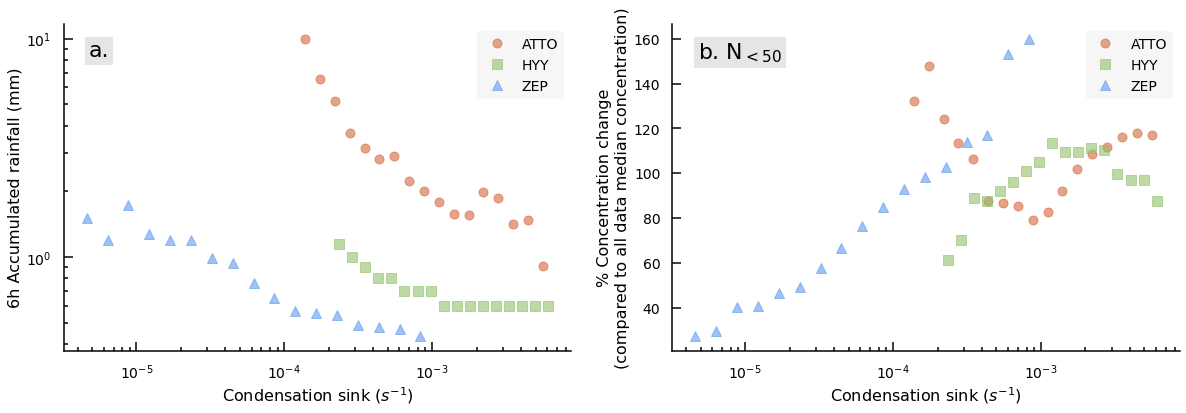

In [25]:
from scipy import stats

def style(ax):
    fontsize = 14
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(1.5)
        ax.spines[axis].set_color('k')
    # remove top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(direction='in', length=9, width=1.5, pad=12, bottom=True, top=False, 
                   left=True, right=False, labelsize=fontsize)
    # parameters minorticks
    ax.tick_params(which='minor', direction='in', length=4, width=1.5, pad=12, bottom=True, top=False, 
                     left=True, right=False, labelsize=fontsize)


def plot_median_bins(ax, xvar, yvar, list_nbins, list_ds, loc):
    list_mid_bins = []
    list_medians = []
    list_ndata_medians = []
    for ds, nbins in zip(list_ds, list_nbins):    
        mid_bins, bins, medians, ndata_medians = median_bins(ds, xvar, yvar, nbins)
        list_mid_bins.append(mid_bins)
        list_medians.append(medians)
        list_ndata_medians.append(ndata_medians)
    
    colors = [(213/255, 103/255, 61/255), (146/255, 192/255, 107/255), (93/255, 153/255, 240/255)]   
    markers = ['o', 's', '^']
    markersizes = [9, 10, 10]
    stations = ['ATTO', 'HYY', 'ZEP']
    for i in range(3):
        # linear regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(list_mid_bins[i], list_medians[i])
        
        ax.plot(list_mid_bins[i], list_medians[i], 'o', color=colors[i], marker=markers[i],
                markersize=markersizes[i], markeredgecolor=colors[i], alpha=0.6, label=stations[i])
        
        # ax.plot(list_mid_bins[i], slope*np.array(list_mid_bins[i])+intercept, '-', color=colors[i], linewidth=2)#,
                #label=stations[i]+': slope='+str(round(slope, 2))+', p='+str(round(p_value, 2)))
    style(ax)
    # legend lower right
    ax.legend(loc=loc, fontsize=14, frameon=True, facecolor='lightgrey', edgecolor='none', framealpha=0.2)
    return list_ndata_medians

def wet_ds(ds):
    return ds.sel(time=(ds.Acc_rainfall_6h.values>0))

def plot_CS_precip(ax, list_ds, loc):
    list_mid_bins = []
    list_medians = []
    list_ndata_medians = []
    for ds, nbins in zip(list_ds, list_nbins):    
        mid_bins, bins, medians, ndata_medians = median_bins(ds, 'condensation_sink', 'Acc_rainfall_6h', nbins)
        medians = []
        ndata_medians = []
        for i in range(len(bins)-1):
            slice = ds.sel(time=(ds['condensation_sink'].values>=bins[i]) & 
                                (ds['condensation_sink'].values<bins[i+1]))['Acc_rainfall_6h']
            medians.append(slice.median().values)
            ndata_medians.append(slice.shape[0])
        list_mid_bins.append(mid_bins)
        list_medians.append(medians)
        list_ndata_medians.append(ndata_medians)
        
    colors = [(213/255, 103/255, 61/255), (146/255, 192/255, 107/255), (93/255, 153/255, 240/255)]   
    markers = ['o', 's', '^']
    markersizes = [9, 10, 10]
    stations = ['ATTO', 'HYY', 'ZEP']    
    for i in range(3):
        # linear regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(list_mid_bins[i], list_medians[i])
        
        ax.plot(list_mid_bins[i], list_medians[i], 'o', color=colors[i], marker=markers[i],
                markersize=markersizes[i], markeredgecolor=colors[i], alpha=0.6, label=stations[i])
    style(ax)
    # legend lower right
    ax.legend(loc=loc, fontsize=14, frameon=True, facecolor='lightgrey', edgecolor='none', framealpha=0.2)    

fig = plt.figure(figsize=(20,6))
list_nbins = [18,18,18]
# list_ds = [dry_ds(ds_atto), dry_ds(ds_hyytiala), dry_ds(ds_zeppelin)]
list_ds = [ds_atto, ds_hyytiala, ds_zeppelin]
ax = fig.add_subplot(121)
ax.text(0.05, 0.95, r'a.', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
list_ds = [wet_ds(ds_atto), wet_ds(ds_hyytiala), wet_ds(ds_zeppelin)]
plot_CS_precip(ax, list_ds, 'upper right')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'Condensation sink ($s^{-1}$)', fontsize=16)
ax.set_ylabel('6h Accumulated rainfall (mm)', fontsize=16)

ax = fig.add_subplot(122)
ax.text(0.05, 0.95, r'b. N$_{<50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
list_ndata_medians = plot_median_bins(ax, 'condensation_sink', 'N_10_50', list_nbins, list_ds, 'upper right')
# log x scale
ax.set_xscale('log')
# xlabel
ax.set_xlabel(r'Condensation sink ($s^{-1}$)', fontsize=16)
# ylabel
ax.set_ylabel('% Concentration change\n(compared to all data median concentration)', fontsize=16)

# path = '/Users/theodorekhadir/Documents/PHD/sinkVSsource/figures/'
# # save figure
# fig.savefig(path+'fig4_CS.png', bbox_inches='tight', dpi=300)

In [27]:
def dark_ds(ds):
    return ds.sel(time=(ds.Acc_solar_radiation_6h.values<30))
def light_ds(ds):
    return ds.sel(time=(ds.Acc_solar_radiation_6h.values>=1000))
def wet_ds(ds):
    return ds.sel(time=(ds.Acc_rainfall_6h.values>0))
def dry_ds(ds):
    return ds.sel(time=(ds.Acc_rainfall_6h.values==0))

# 14. Fig. S14 | Below 50nm particles concentration versus condensation sink under different solar radiation and rainfall exposures  

Text(0.5, 0, 'Condensation sink ($s^{-1}$)')

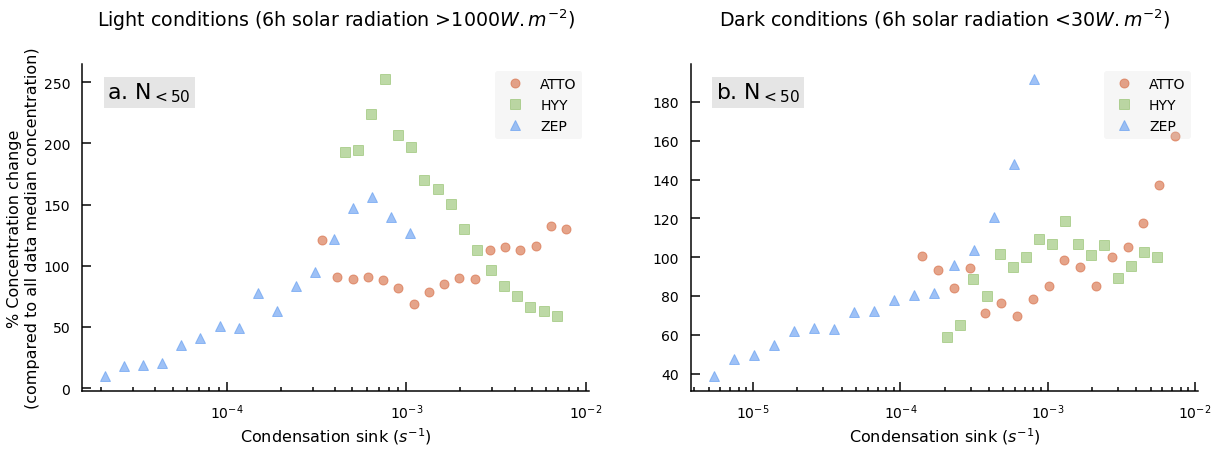

In [28]:
from scipy import stats

def style(ax):
    fontsize = 14
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(1.5)
        ax.spines[axis].set_color('k')
    # remove top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(direction='in', length=9, width=1.5, pad=12, bottom=True, top=False, 
                   left=True, right=False, labelsize=fontsize)
    # parameters minorticks
    ax.tick_params(which='minor', direction='in', length=4, width=1.5, pad=12, bottom=True, top=False, 
                     left=True, right=False, labelsize=fontsize)


def plot_median_bins(ax, xvar, yvar, list_nbins, list_ds, loc):
    list_mid_bins = []
    list_medians = []
    list_ndata_medians = []
    for ds, nbins in zip(list_ds, list_nbins):    
        mid_bins, bins, medians, ndata_medians = median_bins(ds, xvar, yvar, nbins)
        list_mid_bins.append(mid_bins)
        list_medians.append(medians)
        list_ndata_medians.append(ndata_medians)
    
    colors = [(213/255, 103/255, 61/255), (146/255, 192/255, 107/255), (93/255, 153/255, 240/255)]   
    markers = ['o', 's', '^']
    markersizes = [9, 10, 10]
    stations = ['ATTO', 'HYY', 'ZEP']
    for i in range(3):
        # linear regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(list_mid_bins[i], list_medians[i])
        
        ax.plot(list_mid_bins[i], list_medians[i], 'o', color=colors[i], marker=markers[i],
                markersize=markersizes[i], markeredgecolor=colors[i], alpha=0.6, label=stations[i])
        
        # ax.plot(list_mid_bins[i], slope*np.array(list_mid_bins[i])+intercept, '-', color=colors[i], linewidth=2)#,
                #label=stations[i]+': slope='+str(round(slope, 2))+', p='+str(round(p_value, 2)))
    style(ax)
    # legend lower right
    ax.legend(loc=loc, fontsize=14, frameon=True, facecolor='lightgrey', edgecolor='none', framealpha=0.2)
    return list_ndata_medians

def wet_ds(ds):
    return ds.sel(time=(ds.Acc_rainfall_6h.values>0))

def plot_CS_precip(ax, list_ds, loc):
    list_mid_bins = []
    list_medians = []
    list_ndata_medians = []
    for ds, nbins in zip(list_ds, list_nbins):    
        mid_bins, bins, medians, ndata_medians = median_bins(ds, 'condensation_sink', 'Acc_rainfall_6h', nbins)
        medians = []
        ndata_medians = []
        for i in range(len(bins)-1):
            slice = ds.sel(time=(ds['condensation_sink'].values>=bins[i]) & 
                                (ds['condensation_sink'].values<bins[i+1]))['Acc_rainfall_6h']
            medians.append(slice.median().values)
            ndata_medians.append(slice.shape[0])
        list_mid_bins.append(mid_bins)
        list_medians.append(medians)
        list_ndata_medians.append(ndata_medians)
        
    colors = [(213/255, 103/255, 61/255), (146/255, 192/255, 107/255), (93/255, 153/255, 240/255)]   
    markers = ['o', 's', '^']
    markersizes = [9, 10, 10]
    stations = ['ATTO', 'HYY', 'ZEP']    
    for i in range(3):
        # linear regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(list_mid_bins[i], list_medians[i])
        
        ax.plot(list_mid_bins[i], list_medians[i], 'o', color=colors[i], marker=markers[i],
                markersize=markersizes[i], markeredgecolor=colors[i], alpha=0.6, label=stations[i])
    style(ax)
    # legend lower right
    ax.legend(loc=loc, fontsize=14, frameon=True, facecolor='lightgrey', edgecolor='none', framealpha=0.2)    

fig = plt.figure(figsize=(20,6))
list_nbins = [18,18,18]
ax = fig.add_subplot(121)
ax.set_title(r'Light conditions (6h solar radiation >1000$W.m^{-2}$)', fontsize=19, y=1.1)
list_ds = [light_ds(ds_atto), light_ds(ds_hyytiala), light_ds(ds_zeppelin)]
ax.text(0.05, 0.95, r'a. N$_{<50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
list_ndata_medians = plot_median_bins(ax, 'condensation_sink', 'N_10_50', list_nbins, list_ds, 'upper right')
# log x scale
ax.set_xscale('log')
# xlabel
ax.set_xlabel(r'Condensation sink ($s^{-1}$)', fontsize=16)
# ylabel
ax.set_ylabel('% Concentration change\n(compared to all data median concentration)', fontsize=16)

ax = fig.add_subplot(122)
ax.set_title(r'Dark conditions (6h solar radiation <30$W.m^{-2}$)', fontsize=19, y=1.1)
list_ds = [dark_ds(ds_atto), dark_ds(ds_hyytiala), dark_ds(ds_zeppelin)]
ax.text(0.05, 0.95, r'b. N$_{<50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
list_ndata_medians = plot_median_bins(ax, 'condensation_sink', 'N_10_50', list_nbins, list_ds, 'upper right')
# log x scale
ax.set_xscale('log')
# xlabel
ax.set_xlabel(r'Condensation sink ($s^{-1}$)', fontsize=16)

# path = '/Users/theodorekhadir/Documents/PHD/sinkVSsource/figures/'
# # save figure
# fig.savefig(path+'fig4_CS_dark_light.png', bbox_inches='tight', dpi=300)

## Wet vs dry: Concentration(CS)

Text(0.5, 0, 'Condensation sink ($s^{-1}$)')

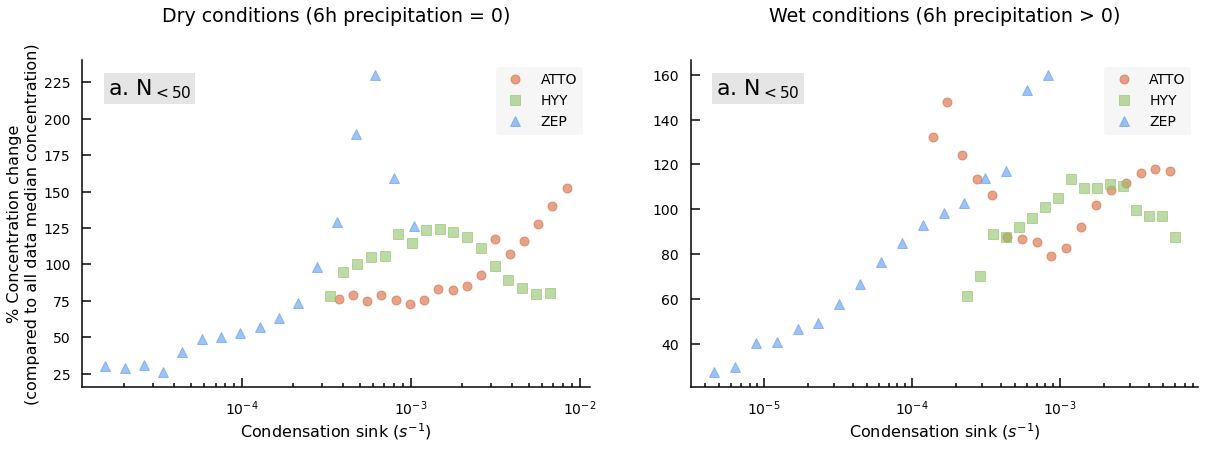

In [29]:
from scipy import stats

def style(ax):
    fontsize = 14
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(1.5)
        ax.spines[axis].set_color('k')
    # remove top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(direction='in', length=9, width=1.5, pad=12, bottom=True, top=False, 
                   left=True, right=False, labelsize=fontsize)
    # parameters minorticks
    ax.tick_params(which='minor', direction='in', length=4, width=1.5, pad=12, bottom=True, top=False, 
                     left=True, right=False, labelsize=fontsize)


def plot_median_bins(ax, xvar, yvar, list_nbins, list_ds, loc):
    list_mid_bins = []
    list_medians = []
    list_ndata_medians = []
    for ds, nbins in zip(list_ds, list_nbins):    
        mid_bins, bins, medians, ndata_medians = median_bins(ds, xvar, yvar, nbins)
        list_mid_bins.append(mid_bins)
        list_medians.append(medians)
        list_ndata_medians.append(ndata_medians)
    
    colors = [(213/255, 103/255, 61/255), (146/255, 192/255, 107/255), (93/255, 153/255, 240/255)]   
    markers = ['o', 's', '^']
    markersizes = [9, 10, 10]
    stations = ['ATTO', 'HYY', 'ZEP']
    for i in range(3):
        # linear regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(list_mid_bins[i], list_medians[i])
        
        ax.plot(list_mid_bins[i], list_medians[i], 'o', color=colors[i], marker=markers[i],
                markersize=markersizes[i], markeredgecolor=colors[i], alpha=0.6, label=stations[i])
        
        # ax.plot(list_mid_bins[i], slope*np.array(list_mid_bins[i])+intercept, '-', color=colors[i], linewidth=2)#,
                #label=stations[i]+': slope='+str(round(slope, 2))+', p='+str(round(p_value, 2)))
    style(ax)
    # legend lower right
    ax.legend(loc=loc, fontsize=14, frameon=True, facecolor='lightgrey', edgecolor='none', framealpha=0.2)
    return list_ndata_medians

def wet_ds(ds):
    return ds.sel(time=(ds.Acc_rainfall_6h.values>0))

def plot_CS_precip(ax, list_ds, loc):
    list_mid_bins = []
    list_medians = []
    list_ndata_medians = []
    for ds, nbins in zip(list_ds, list_nbins):    
        mid_bins, bins, medians, ndata_medians = median_bins(ds, 'condensation_sink', 'Acc_rainfall_6h', nbins)
        medians = []
        ndata_medians = []
        for i in range(len(bins)-1):
            slice = ds.sel(time=(ds['condensation_sink'].values>=bins[i]) & 
                                (ds['condensation_sink'].values<bins[i+1]))['Acc_rainfall_6h']
            medians.append(slice.median().values)
            ndata_medians.append(slice.shape[0])
        list_mid_bins.append(mid_bins)
        list_medians.append(medians)
        list_ndata_medians.append(ndata_medians)
        
    colors = [(213/255, 103/255, 61/255), (146/255, 192/255, 107/255), (93/255, 153/255, 240/255)]   
    markers = ['o', 's', '^']
    markersizes = [9, 10, 10]
    stations = ['ATTO', 'HYY', 'ZEP']    
    for i in range(3):
        # linear regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(list_mid_bins[i], list_medians[i])
        
        ax.plot(list_mid_bins[i], list_medians[i], 'o', color=colors[i], marker=markers[i],
                markersize=markersizes[i], markeredgecolor=colors[i], alpha=0.6, label=stations[i])
    style(ax)
    # legend lower right
    ax.legend(loc=loc, fontsize=14, frameon=True, facecolor='lightgrey', edgecolor='none', framealpha=0.2)    

fig = plt.figure(figsize=(20,6))
list_nbins = [18,18,18]
ax = fig.add_subplot(121)
ax.set_title('Dry conditions (6h precipitation = 0)', fontsize=19, y=1.1)
list_ds = [dry_ds(ds_atto), dry_ds(ds_hyytiala), dry_ds(ds_zeppelin)]
ax.text(0.05, 0.95, r'a. N$_{<50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
list_ndata_medians = plot_median_bins(ax, 'condensation_sink', 'N_10_50', list_nbins, list_ds, 'upper right')
# log x scale
ax.set_xscale('log')
# xlabel
ax.set_xlabel(r'Condensation sink ($s^{-1}$)', fontsize=16)
# ylabel
ax.set_ylabel('% Concentration change\n(compared to all data median concentration)', fontsize=16)

ax = fig.add_subplot(122)
ax.set_title('Wet conditions (6h precipitation > 0)', fontsize=19, y=1.1)
list_ds = [wet_ds(ds_atto), wet_ds(ds_hyytiala), wet_ds(ds_zeppelin)]
ax.text(0.05, 0.95, r'a. N$_{<50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
list_ndata_medians = plot_median_bins(ax, 'condensation_sink', 'N_10_50', list_nbins, list_ds, 'upper right')
# log x scale
ax.set_xscale('log')
# xlabel
ax.set_xlabel(r'Condensation sink ($s^{-1}$)', fontsize=16)

# path = '/Users/theodorekhadir/Documents/PHD/sinkVSsource/figures/'
# # save figure
# fig.savefig(path+'fig4_CS_dry_wet.png', bbox_inches='tight', dpi=300)

## Combined

Text(0.5, 0.04, 'Condensation sink ($s^{-1}$)')

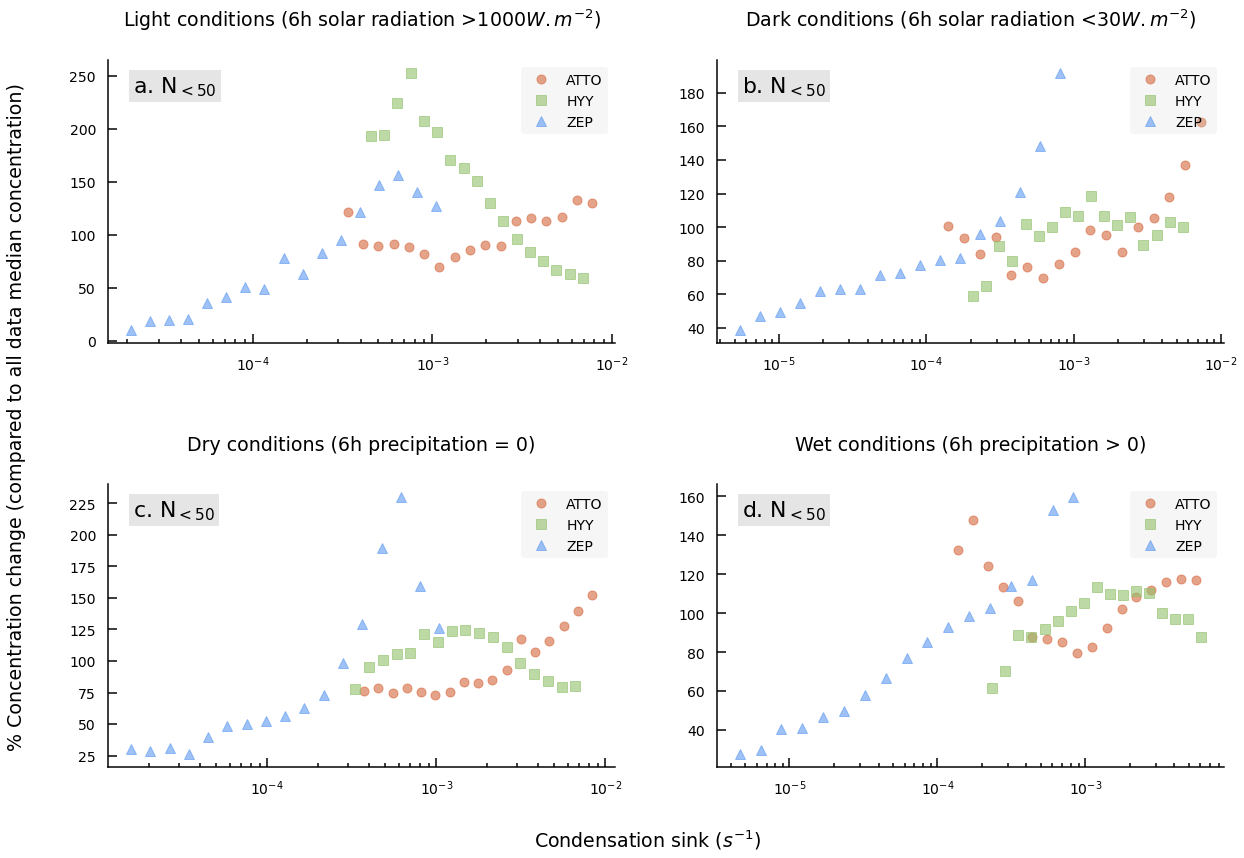

In [30]:
from scipy import stats

def style(ax):
    fontsize = 14
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(1.5)
        ax.spines[axis].set_color('k')
    # remove top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(direction='in', length=9, width=1.5, pad=12, bottom=True, top=False, 
                   left=True, right=False, labelsize=fontsize)
    # parameters minorticks
    ax.tick_params(which='minor', direction='in', length=4, width=1.5, pad=12, bottom=True, top=False, 
                     left=True, right=False, labelsize=fontsize)


def plot_median_bins(ax, xvar, yvar, list_nbins, list_ds, loc):
    list_mid_bins = []
    list_medians = []
    list_ndata_medians = []
    for ds, nbins in zip(list_ds, list_nbins):    
        mid_bins, bins, medians, ndata_medians = median_bins(ds, xvar, yvar, nbins)
        list_mid_bins.append(mid_bins)
        list_medians.append(medians)
        list_ndata_medians.append(ndata_medians)
    
    colors = [(213/255, 103/255, 61/255), (146/255, 192/255, 107/255), (93/255, 153/255, 240/255)]   
    markers = ['o', 's', '^']
    markersizes = [9, 10, 10]
    stations = ['ATTO', 'HYY', 'ZEP']
    for i in range(3):
        # linear regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(list_mid_bins[i], list_medians[i])
        
        ax.plot(list_mid_bins[i], list_medians[i], 'o', color=colors[i], marker=markers[i],
                markersize=markersizes[i], markeredgecolor=colors[i], alpha=0.6, label=stations[i])
        
        # ax.plot(list_mid_bins[i], slope*np.array(list_mid_bins[i])+intercept, '-', color=colors[i], linewidth=2)#,
                #label=stations[i]+': slope='+str(round(slope, 2))+', p='+str(round(p_value, 2)))
    style(ax)
    # legend lower right
    ax.legend(loc=loc, fontsize=14, frameon=True, facecolor='lightgrey', edgecolor='none', framealpha=0.2)
    return list_ndata_medians

def wet_ds(ds):
    return ds.sel(time=(ds.Acc_rainfall_6h.values>0))

def plot_CS_precip(ax, list_ds, loc):
    list_mid_bins = []
    list_medians = []
    list_ndata_medians = []
    for ds, nbins in zip(list_ds, list_nbins):    
        mid_bins, bins, medians, ndata_medians = median_bins(ds, 'condensation_sink', 'Acc_rainfall_6h', nbins)
        medians = []
        ndata_medians = []
        for i in range(len(bins)-1):
            slice = ds.sel(time=(ds['condensation_sink'].values>=bins[i]) & 
                                (ds['condensation_sink'].values<bins[i+1]))['Acc_rainfall_6h']
            medians.append(slice.median().values)
            ndata_medians.append(slice.shape[0])
        list_mid_bins.append(mid_bins)
        list_medians.append(medians)
        list_ndata_medians.append(ndata_medians)
        
    colors = [(213/255, 103/255, 61/255), (146/255, 192/255, 107/255), (93/255, 153/255, 240/255)]   
    markers = ['o', 's', '^']
    markersizes = [9, 10, 10]
    stations = ['ATTO', 'HYY', 'ZEP']    
    for i in range(3):
        # linear regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(list_mid_bins[i], list_medians[i])
        
        ax.plot(list_mid_bins[i], list_medians[i], 'o', color=colors[i], marker=markers[i],
                markersize=markersizes[i], markeredgecolor=colors[i], alpha=0.6, label=stations[i])
    style(ax)
    # legend lower right
    ax.legend(loc=loc, fontsize=14, frameon=True, facecolor='lightgrey', edgecolor='none', framealpha=0.2)    

fig = plt.figure(figsize=(20,13))

list_nbins = [18,18,18]
ax = fig.add_subplot(221)
ax.set_title(r'Light conditions (6h solar radiation >1000$W.m^{-2}$)', fontsize=19, y=1.1)
list_ds = [light_ds(ds_atto), light_ds(ds_hyytiala), light_ds(ds_zeppelin)]
ax.text(0.05, 0.95, r'a. N$_{<50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
list_ndata_medians = plot_median_bins(ax, 'condensation_sink', 'N_10_50', list_nbins, list_ds, 'upper right')
# log x scale
ax.set_xscale('log')
# xlabel
# ax.set_xlabel(r'Condensation sink ($s^{-1}$)', fontsize=16)
# ylabel
# ax.set_ylabel('% Concentration change\n(compared to all data median concentration)', fontsize=16)

ax = fig.add_subplot(222)
ax.set_title(r'Dark conditions (6h solar radiation <30$W.m^{-2}$)', fontsize=19, y=1.1)
list_ds = [dark_ds(ds_atto), dark_ds(ds_hyytiala), dark_ds(ds_zeppelin)]
ax.text(0.05, 0.95, r'b. N$_{<50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
list_ndata_medians = plot_median_bins(ax, 'condensation_sink', 'N_10_50', list_nbins, list_ds, 'upper right')
# log x scale
ax.set_xscale('log')
# xlabel
# ax.set_xlabel(r'Condensation sink ($s^{-1}$)', fontsize=16)

def style(ax):
    fontsize = 14
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(1.5)
        ax.spines[axis].set_color('k')
    # remove top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(direction='in', length=9, width=1.5, pad=12, bottom=True, top=False, 
                   left=True, right=False, labelsize=fontsize)
    # parameters minorticks
    ax.tick_params(which='minor', direction='in', length=4, width=1.5, pad=12, bottom=True, top=False, 
                     left=True, right=False, labelsize=fontsize)


def plot_median_bins(ax, xvar, yvar, list_nbins, list_ds, loc):
    list_mid_bins = []
    list_medians = []
    list_ndata_medians = []
    for ds, nbins in zip(list_ds, list_nbins):    
        mid_bins, bins, medians, ndata_medians = median_bins(ds, xvar, yvar, nbins)
        list_mid_bins.append(mid_bins)
        list_medians.append(medians)
        list_ndata_medians.append(ndata_medians)
    
    colors = [(213/255, 103/255, 61/255), (146/255, 192/255, 107/255), (93/255, 153/255, 240/255)]   
    markers = ['o', 's', '^']
    markersizes = [9, 10, 10]
    stations = ['ATTO', 'HYY', 'ZEP']
    for i in range(3):
        # linear regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(list_mid_bins[i], list_medians[i])
        
        ax.plot(list_mid_bins[i], list_medians[i], 'o', color=colors[i], marker=markers[i],
                markersize=markersizes[i], markeredgecolor=colors[i], alpha=0.6, label=stations[i])
        
        # ax.plot(list_mid_bins[i], slope*np.array(list_mid_bins[i])+intercept, '-', color=colors[i], linewidth=2)#,
                #label=stations[i]+': slope='+str(round(slope, 2))+', p='+str(round(p_value, 2)))
    style(ax)
    # legend lower right
    ax.legend(loc=loc, fontsize=14, frameon=True, facecolor='lightgrey', edgecolor='none', framealpha=0.2)
    return list_ndata_medians

def wet_ds(ds):
    return ds.sel(time=(ds.Acc_rainfall_6h.values>0))

def plot_CS_precip(ax, list_ds, loc):
    list_mid_bins = []
    list_medians = []
    list_ndata_medians = []
    for ds, nbins in zip(list_ds, list_nbins):    
        mid_bins, bins, medians, ndata_medians = median_bins(ds, 'condensation_sink', 'Acc_rainfall_6h', nbins)
        medians = []
        ndata_medians = []
        for i in range(len(bins)-1):
            slice = ds.sel(time=(ds['condensation_sink'].values>=bins[i]) & 
                                (ds['condensation_sink'].values<bins[i+1]))['Acc_rainfall_6h']
            medians.append(slice.median().values)
            ndata_medians.append(slice.shape[0])
        list_mid_bins.append(mid_bins)
        list_medians.append(medians)
        list_ndata_medians.append(ndata_medians)
        
    colors = [(213/255, 103/255, 61/255), (146/255, 192/255, 107/255), (93/255, 153/255, 240/255)]   
    markers = ['o', 's', '^']
    markersizes = [9, 10, 10]
    stations = ['ATTO', 'HYY', 'ZEP']    
    for i in range(3):
        # linear regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(list_mid_bins[i], list_medians[i])
        
        ax.plot(list_mid_bins[i], list_medians[i], 'o', color=colors[i], marker=markers[i],
                markersize=markersizes[i], markeredgecolor=colors[i], alpha=0.6, label=stations[i])
    style(ax)
    # legend lower right
    ax.legend(loc=loc, fontsize=14, frameon=True, facecolor='lightgrey', edgecolor='none', framealpha=0.2)    

list_nbins = [18,18,18]
ax = fig.add_subplot(223)
ax.set_title('Dry conditions (6h precipitation = 0)', fontsize=19, y=1.1)
list_ds = [dry_ds(ds_atto), dry_ds(ds_hyytiala), dry_ds(ds_zeppelin)]
ax.text(0.05, 0.95, r'c. N$_{<50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
list_ndata_medians = plot_median_bins(ax, 'condensation_sink', 'N_10_50', list_nbins, list_ds, 'upper right')
# log x scale
ax.set_xscale('log')
# xlabel
# ax.set_xlabel(r'Condensation sink ($s^{-1}$)', fontsize=16)
# ylabel
# ax.set_ylabel('% Concentration change\n(compared to all data median concentration)', fontsize=16)

ax = fig.add_subplot(224)
ax.set_title('Wet conditions (6h precipitation > 0)', fontsize=19, y=1.1)
list_ds = [wet_ds(ds_atto), wet_ds(ds_hyytiala), wet_ds(ds_zeppelin)]
ax.text(0.05, 0.95, r'd. N$_{<50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
list_ndata_medians = plot_median_bins(ax, 'condensation_sink', 'N_10_50', list_nbins, list_ds, 'upper right')
# log x scale
ax.set_xscale('log')
# xlabel
# ax.set_xlabel(r'Condensation sink ($s^{-1}$)', fontsize=16)

# space between subplots
plt.subplots_adjust(hspace=0.5)

# share '% Concentration change\n(compared to all data median concentration)' for all subplots at the left
fig.text(0.055, 0.5, '% Concentration change (compared to all data median concentration)', va='center', rotation='vertical', fontsize=19)
# r'Condensation sink ($s^{-1}$)' for all subplots at the bottom
fig.text(0.5, 0.04, r'Condensation sink ($s^{-1}$)', ha='center', fontsize=19)

# path = '/Users/theodorekhadir/Documents/PHD/sinkVSsource/figures/'
# # save figure
# fig.savefig(path+'fig4_CS_dark_light_dry_wet.png', bbox_inches='tight', dpi=300)

# 15. Fig. S15 | Below 50nm particles concentration at ATTO versus recent rainfall rate under different condensation sink regimes  

Text(0.07, 0.5, '% Concentration change (compared to all data median)')

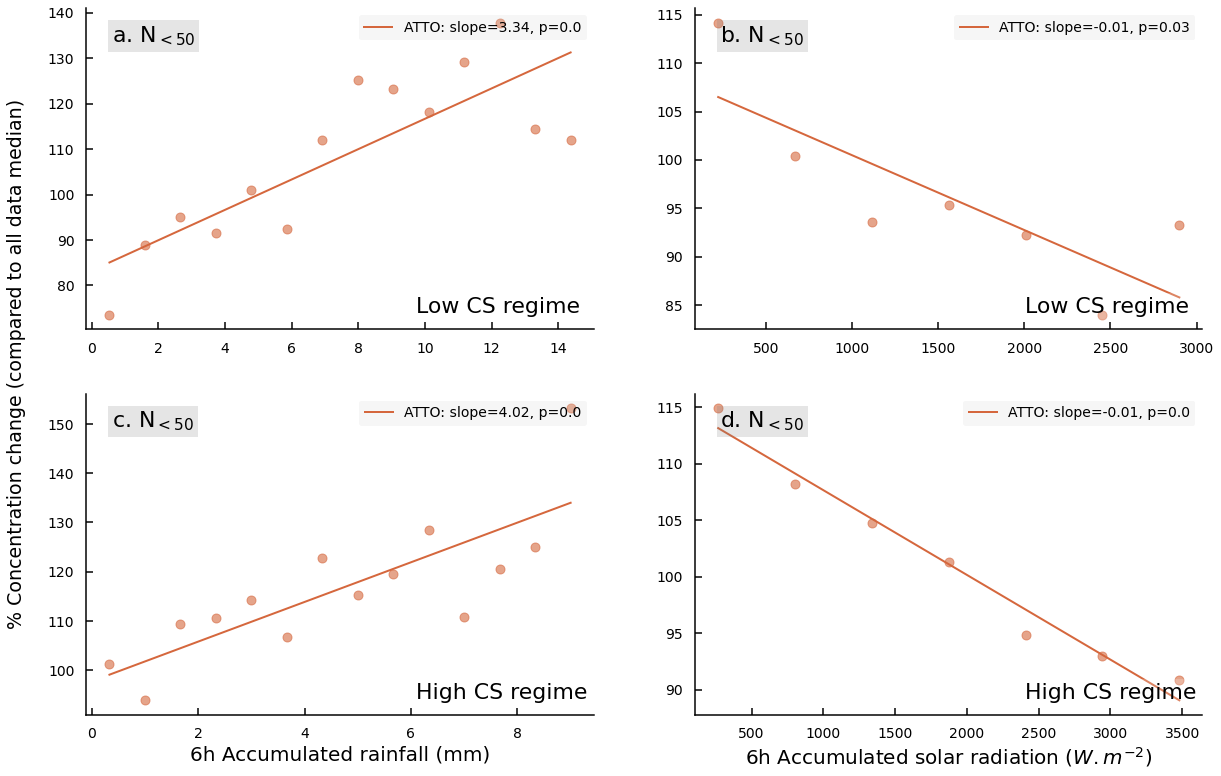

In [35]:
def wet_lowCS_ds(ds):
    slice = ds.sel(time=(ds.Acc_rainfall_6h.values>0))
    return slice.sel(time=((slice.condensation_sink.values<=1e-3)&(slice.condensation_sink.values>=1e-4)))

def wet_highCS_ds(ds):
    slice = ds.sel(time=(ds.Acc_rainfall_6h.values>0))
    return slice.sel(time=((slice.condensation_sink.values>=1e-3)))        

# normalize concentration with reference value
def normalize(ds, xvar, yvar, val_ref):
    ds[yvar+'_norm_'+xvar] = (['time'], ds[yvar].values/val_ref*100)
    
# calculate medians in bins of a given variables
def median_bins(ds, xvar, yvar, nbins):
    if xvar == 'Acc_rainfall_6h':
        ds_slice = ds.sel(time=(ds.Acc_rainfall_6h.values>0))
        val_ref = ds_atto.sel(time=(ds_atto.Acc_rainfall_6h.values==0))[yvar].median().values
    elif xvar == 'Acc_solar_radiation_6h':
        ds_slice = ds.copy()
        val_ref = ds_slice[yvar].median().values
    
    normalize(ds_slice, xvar, yvar, val_ref)
    bins = np.linspace(0, ds_slice[xvar].quantile(0.9), nbins)
    mid_bins = (bins[1:]+bins[:-1])/2
    
    # find median of yvar in each bin of yvar in ds_slice
    medians = []
    ndata_medians = []
    for i in range(len(bins)-1):
        slice = ds_slice.sel(time=(ds_slice[xvar].values>=bins[i]) & 
                             (ds_slice[xvar].values<bins[i+1]))[yvar+'_norm_'+xvar]
        medians.append(slice.median().values)
        ndata_medians.append(slice.shape[0])
        
    return mid_bins, medians, ndata_medians

from scipy import stats

def style(ax):
    fontsize = 14
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(1.5)
        ax.spines[axis].set_color('k')
    # remove top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(direction='in', length=7, width=1.5, pad=12, bottom=True, top=False, 
                   left=True, right=False, labelsize=fontsize)


def plot_median_bins(ax, xvar, yvar, list_nbins, list_ds, loc):
    list_mid_bins = []
    list_medians = []
    list_ndata_medians = []
    for ds, nbins in zip(list_ds, list_nbins):    
        mid_bins, medians, ndata_medians = median_bins(ds, xvar, yvar, nbins)
        list_mid_bins.append(mid_bins)
        list_medians.append(medians)
        list_ndata_medians.append(ndata_medians)
    
    colors = [(213/255, 103/255, 61/255), (146/255, 192/255, 107/255), (93/255, 153/255, 240/255)]   
    markers = ['o', 's', '^']
    markersizes = [9, 10, 10]
    stations = ['ATTO', 'HYY', 'ZEP']
    for i in range(1):
        # remove nan from list_medians
        X = np.array(list_mid_bins[i])
        Y = np.array(list_medians[i])
        X = X[~np.isnan(Y)]
        Y = Y[~np.isnan(Y)]
        # linear regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
        
        ax.plot(list_mid_bins[i], list_medians[i], 'o', color=colors[i], marker=markers[i],
                markersize=markersizes[i], markeredgecolor=colors[i], alpha=0.6)
        
        ax.plot(list_mid_bins[i], slope*np.array(list_mid_bins[i])+intercept, '-', color=colors[i], linewidth=2,
                label=stations[i]+': slope='+str(round(slope, 2))+', p='+str(round(p_value, 2)))
    style(ax)
    # legend lower right
    # frameon with light grey background with alpha=0.5
    ax.legend(loc=loc, fontsize=14, frameon=True, facecolor='lightgrey', edgecolor='none', framealpha=0.2)

fig = plt.figure(figsize=(20,13))
list_nbins = [15,15,15]
list_ds = [wet_lowCS_ds(ds_atto), wet_lowCS_ds(ds_atto)]
ax = fig.add_subplot(221)
ax.text(0.05, 0.95, r'a. N$_{<50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
plot_median_bins(ax, 'Acc_rainfall_6h', 'N_10_50', list_nbins, list_ds, 'upper right')
# ax.set_xlabel(r'6h Accumulated rainfall (mm)', fontsize=20)
ax.text(0.65, 0.1, r'Low CS regime', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.2))

list_nbins = [8, 8, 8]
ax = fig.add_subplot(222)
list_ds = [wet_lowCS_ds(ds_atto), wet_lowCS_ds(ds_atto)]
ax.text(0.05, 0.95, r'b. N$_{<50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
plot_median_bins(ax, 'Acc_solar_radiation_6h', 'N_10_50', list_nbins, list_ds, 'upper right')
# ax.set_xlabel(r'6h Accumulated solar radiation $(W.m^{-2})$', fontsize=20)
ax.text(0.65, 0.1, r'Low CS regime', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.2))

def wet_lowCS_ds(ds):
    slice = ds.sel(time=(ds.Acc_rainfall_6h.values>0))
    return slice.sel(time=((slice.condensation_sink.values<=1e-3)&(slice.condensation_sink.values>=1e-4)))

def wet_highCS_ds(ds):
    slice = ds.sel(time=(ds.Acc_rainfall_6h.values>0))
    return slice.sel(time=((slice.condensation_sink.values>=1e-3)))        

# normalize concentration with reference value
def normalize(ds, xvar, yvar, val_ref):
    ds[yvar+'_norm_'+xvar] = (['time'], ds[yvar].values/val_ref*100)
    
# calculate medians in bins of a given variables
def median_bins(ds, xvar, yvar, nbins):
    if xvar == 'Acc_rainfall_6h':
        ds_slice = ds.sel(time=(ds.Acc_rainfall_6h.values>0))
        val_ref = ds_atto.sel(time=(ds_atto.Acc_rainfall_6h.values==0))[yvar].median().values
    elif xvar == 'Acc_solar_radiation_6h':
        ds_slice = ds.copy()
        val_ref = ds_slice[yvar].median().values
    
    normalize(ds_slice, xvar, yvar, val_ref)
    bins = np.linspace(0, ds_slice[xvar].quantile(0.9), nbins)
    mid_bins = (bins[1:]+bins[:-1])/2
    
    # find median of yvar in each bin of yvar in ds_slice
    medians = []
    ndata_medians = []
    for i in range(len(bins)-1):
        slice = ds_slice.sel(time=(ds_slice[xvar].values>=bins[i]) & 
                             (ds_slice[xvar].values<bins[i+1]))[yvar+'_norm_'+xvar]
        medians.append(slice.median().values)
        ndata_medians.append(slice.shape[0])
        
    return mid_bins, medians, ndata_medians

from scipy import stats

def style(ax):
    fontsize = 14
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(1.5)
        ax.spines[axis].set_color('k')
    # remove top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(direction='in', length=7, width=1.5, pad=12, bottom=True, top=False, 
                   left=True, right=False, labelsize=fontsize)


def plot_median_bins(ax, xvar, yvar, list_nbins, list_ds, loc):
    list_mid_bins = []
    list_medians = []
    list_ndata_medians = []
    for ds, nbins in zip(list_ds, list_nbins):    
        mid_bins, medians, ndata_medians = median_bins(ds, xvar, yvar, nbins)
        list_mid_bins.append(mid_bins)
        list_medians.append(medians)
        list_ndata_medians.append(ndata_medians)
    
    colors = [(213/255, 103/255, 61/255), (146/255, 192/255, 107/255), (93/255, 153/255, 240/255)]   
    markers = ['o', 's', '^']
    markersizes = [9, 10, 10]
    stations = ['ATTO', 'HYY', 'ZEP']
    for i in range(1):
        # remove nan from list_medians
        X = np.array(list_mid_bins[i])
        Y = np.array(list_medians[i])
        X = X[~np.isnan(Y)]
        Y = Y[~np.isnan(Y)]
        # linear regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
        
        ax.plot(list_mid_bins[i], list_medians[i], 'o', color=colors[i], marker=markers[i],
                markersize=markersizes[i], markeredgecolor=colors[i], alpha=0.6)
        
        ax.plot(list_mid_bins[i], slope*np.array(list_mid_bins[i])+intercept, '-', color=colors[i], linewidth=2,
                label=stations[i]+': slope='+str(round(slope, 2))+', p='+str(round(p_value, 2)))
    style(ax)
    # legend lower right
    # frameon with light grey background with alpha=0.5
    ax.legend(loc=loc, fontsize=14, frameon=True, facecolor='lightgrey', edgecolor='none', framealpha=0.2)

list_nbins = [15,15,15]
list_ds = [wet_highCS_ds(ds_atto), wet_highCS_ds(ds_atto)]
ax = fig.add_subplot(223)
ax.text(0.05, 0.95, r'c. N$_{<50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
plot_median_bins(ax, 'Acc_rainfall_6h', 'N_10_50', list_nbins, list_ds, 'upper right')
ax.set_xlabel(r'6h Accumulated rainfall (mm)', fontsize=20)
ax.text(0.65, 0.1, r'High CS regime', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.2))

list_nbins = [8, 8, 8]
ax = fig.add_subplot(224)
list_ds = [wet_highCS_ds(ds_atto), wet_highCS_ds(ds_atto)]
ax.text(0.05, 0.95, r'd. N$_{<50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
plot_median_bins(ax, 'Acc_solar_radiation_6h', 'N_10_50', list_nbins, list_ds, 'upper right')
ax.set_xlabel(r'6h Accumulated solar radiation $(W.m^{-2})$', fontsize=20)
ax.text(0.65, 0.1, r'High CS regime', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.2))


fig.text(0.07, 0.5, '% Concentration change (compared to all data median)', va='center', rotation='vertical', fontsize=19)

# path = '/Users/theodorekhadir/Documents/PHD/sinkVSsource/figures/'
# # save figure
# fig.savefig(path+'fig4_lowhighCS_atto.png', bbox_inches='tight', dpi=300)

# 16. Fig. S16 | 96h accumulated rainfall and solar radiation versus particle concentrations  

In [36]:
# accumulated variables
ds_atto['Acc_rainfall_96h'] = (['time'], np.sum(ds_atto.Rainfall_TRMM.values[:,0:96], axis=1))
ds_hyytiala['Acc_rainfall_96h'] = (['time'], np.sum(ds_hyytiala.Rainfall.values[:,1:96], axis=1))
ds_zeppelin['Acc_rainfall_96h'] = (['time'], np.sum(ds_zeppelin.Rainfall.values[:,0:96], axis=1))

ds_atto['Acc_solar_radiation_96h'] = (['time'], np.sum(ds_atto.Solar_Radiation.values[:,0:96], axis=1))
ds_hyytiala['Acc_solar_radiation_96h'] = (['time'], np.sum(ds_hyytiala.Solar_radiation.values[:,1:96], axis=1))
ds_zeppelin['Acc_solar_radiation_96h'] = (['time'], np.sum(ds_zeppelin.Solar_radiation.values[:,0:96], axis=1))

In [37]:
# normalize concentration with reference value
def normalize(ds, xvar, yvar, val_ref):
    ds[yvar+'_norm_'+xvar] = (['time'], ds[yvar].values/val_ref*100)
    
# calculate medians in bins of a given variables
def median_bins(ds, xvar, yvar, nbins):
    ds_slice = ds.copy()
    val_ref = ds_slice[yvar].median().values
    
    normalize(ds_slice, xvar, yvar, val_ref)
    bins = np.linspace(0, ds_slice[xvar].quantile(0.99), nbins)
    mid_bins = (bins[1:]+bins[:-1])/2
    
    # find median of yvar in each bin of yvar in ds_slice
    medians = []
    ndata_medians = []
    for i in range(len(bins)-1):
        slice = ds_slice.sel(time=(ds_slice[xvar].values>=bins[i]) & 
                             (ds_slice[xvar].values<bins[i+1]))[yvar+'_norm_'+xvar]
        medians.append(slice.median().values)
        ndata_medians.append(slice.shape[0])
        
    return mid_bins, medians, ndata_medians

Text(0.07, 0.5, '% Concentration change (compared to all data median)')

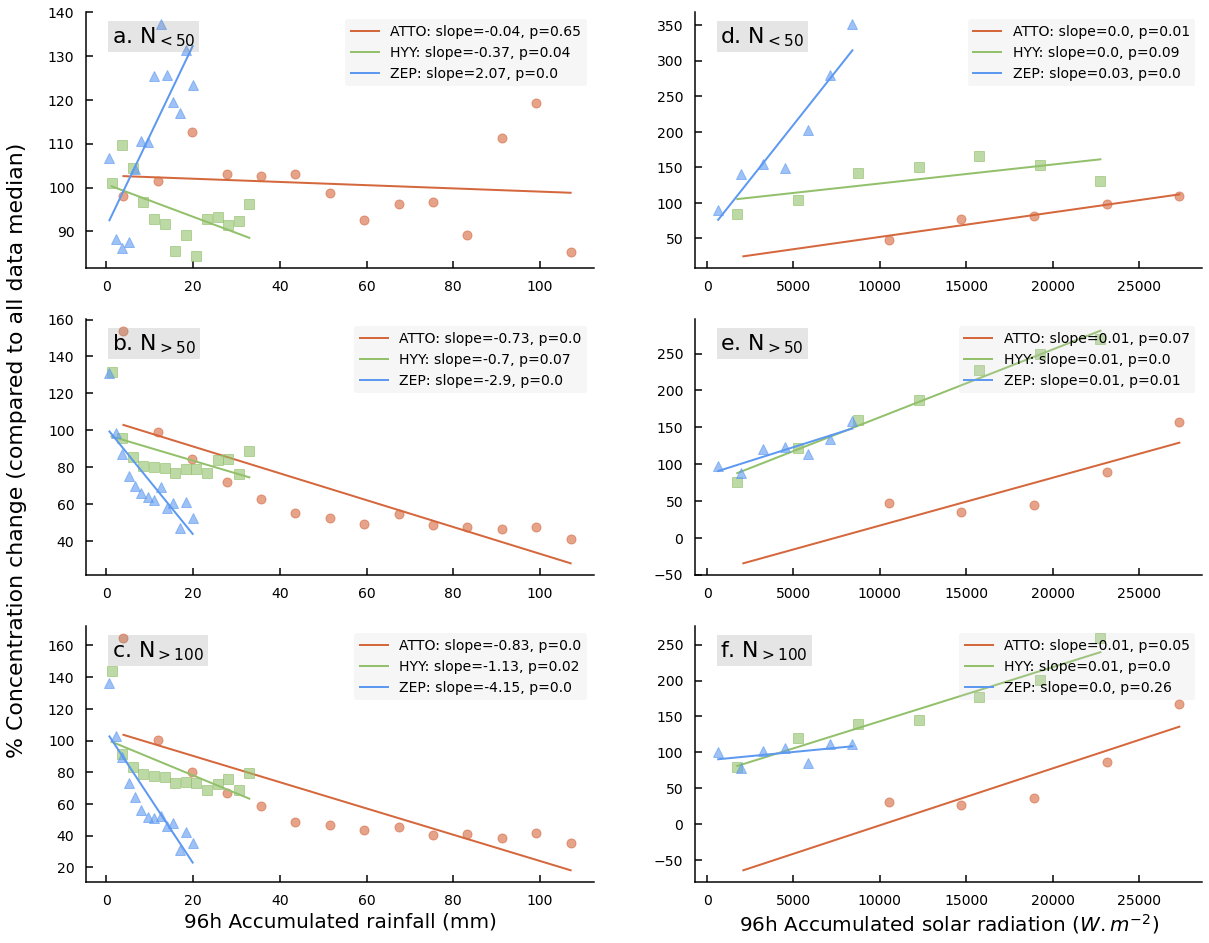

In [38]:
from scipy import stats

def style(ax):
    fontsize = 14
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(1.5)
        ax.spines[axis].set_color('k')
    # remove top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(direction='in', length=7, width=1.5, pad=12, bottom=True, top=False, 
                   left=True, right=False, labelsize=fontsize)


def plot_median_bins(ax, xvar, yvar, list_nbins, list_ds, loc):
    list_mid_bins = []
    list_medians = []
    list_ndata_medians = []
    for ds, nbins in zip(list_ds, list_nbins):    
        mid_bins, medians, ndata_medians = median_bins(ds, xvar, yvar, nbins)
        list_mid_bins.append(mid_bins)
        list_medians.append(medians)
        list_ndata_medians.append(ndata_medians)
    
    colors = [(213/255, 103/255, 61/255), (146/255, 192/255, 107/255), (93/255, 153/255, 240/255)]   
    markers = ['o', 's', '^']
    markersizes = [9, 10, 10]
    stations = ['ATTO', 'HYY', 'ZEP']
    for i in range(3):
        # remove nan from list_medians
        X = np.array(list_mid_bins[i])
        Y = np.array(list_medians[i])
        X = X[~np.isnan(Y)]
        Y = Y[~np.isnan(Y)]
        # linear regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
        
        ax.plot(list_mid_bins[i], list_medians[i], 'o', color=colors[i], marker=markers[i],
                markersize=markersizes[i], markeredgecolor=colors[i], alpha=0.6)
        
        ax.plot(list_mid_bins[i], slope*np.array(list_mid_bins[i])+intercept, '-', color=colors[i], linewidth=2,
                label=stations[i]+': slope='+str(round(slope, 2))+', p='+str(round(p_value, 2)))
    style(ax)
    # legend lower right
    # frameon with light grey background with alpha=0.5
    ax.legend(loc=loc, fontsize=14, frameon=True, facecolor='lightgrey', edgecolor='none', framealpha=0.2)

fig = plt.figure(figsize=(20,16))
list_nbins = [15,15,15]
list_ds = [ds_atto, ds_hyytiala, ds_zeppelin]
ax = fig.add_subplot(321)
ax.text(0.05, 0.95, r'a. N$_{<50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
plot_median_bins(ax, 'Acc_rainfall_96h', 'N_10_50', list_nbins, list_ds, 'upper right')
ax = fig.add_subplot(323)
ax.text(0.05, 0.95, r'b. N$_{>50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
plot_median_bins(ax, 'Acc_rainfall_96h', 'N_50_500', list_nbins, list_ds, 'upper right')
# ax.set_ylim(top=120)
ax = fig.add_subplot(325)
ax.text(0.05, 0.95, r'c. N$_{>100}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
plot_median_bins(ax, 'Acc_rainfall_96h', 'N_100_500', list_nbins, list_ds, 'upper right')
# ax.set_ylim(top=140)
ax.set_xlabel(r'96h Accumulated rainfall (mm)', fontsize=20)

list_nbins = [8, 8, 8]
ax = fig.add_subplot(322)
list_ds = [dark_ds(ds_atto), dark_ds(ds_hyytiala), dark_ds(ds_zeppelin)]
ax.text(0.05, 0.95, r'd. N$_{<50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
plot_median_bins(ax, 'Acc_solar_radiation_96h', 'N_10_50', list_nbins, list_ds, 'upper right')
ax = fig.add_subplot(324)
ax.text(0.05, 0.95, r'e. N$_{>50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
plot_median_bins(ax, 'Acc_solar_radiation_96h', 'N_50_500', list_nbins, list_ds, 'upper right')
# ax.set_ylim(top=120)
ax = fig.add_subplot(326)
ax.text(0.05, 0.95, r'f. N$_{>100}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
plot_median_bins(ax, 'Acc_solar_radiation_96h', 'N_100_500', list_nbins, list_ds, 'upper right')
# set sup bound only
# ax.set_ylim(top=130)
ax.set_xlabel(r'96h Accumulated solar radiation $(W.m^{-2})$', fontsize=20)

fig.text(0.07, 0.5, '% Concentration change (compared to all data median)', va='center', rotation='vertical', fontsize=22)

# path = '/Users/theodorekhadir/Documents/PHD/sinkVSsource/figures/'
# # save figure
# fig.savefig(path+'fig4_96h.png', bbox_inches='tight', dpi=300)

# 8. Seasonal Recent rainfall and solar radiation versus particle concentrations

In [39]:
def select_seasons(list_month, ds):
    ds_season = ds.sel(time=ds.time.dt.month.isin(list_month))
    return ds_season

ds_atto_wet = select_seasons([2,3,4,5], ds_atto)
ds_atto_wet2dry = select_seasons([6,7], ds_atto)
ds_atto_dry = select_seasons([8,9,10,11], ds_atto)
ds_atto_dry2wet = select_seasons([12,1], ds_atto)
list_ds_atto = [ds_atto_wet, ds_atto_wet2dry, ds_atto_dry, ds_atto_dry2wet]

ds_hyytiala_djf = select_seasons([12,1,2], ds_hyytiala)
ds_hyytiala_mam = select_seasons([3,4,5], ds_hyytiala)
ds_hyytiala_jja = select_seasons([6,7,8], ds_hyytiala)
ds_hyytiala_son = select_seasons([9,10,11], ds_hyytiala)
list_ds_hyytiala = [ds_hyytiala_djf, ds_hyytiala_mam, ds_hyytiala_jja, ds_hyytiala_son]

ds_zeppelin_jjas = select_seasons([6,7,8, 9], ds_zeppelin)
ds_zeppelin_ondj = select_seasons([10,11,12,1], ds_zeppelin)
ds_zeppelin_fmam = select_seasons([2,3,4,5], ds_zeppelin)
list_ds_zeppelin = [ds_zeppelin_jjas, ds_zeppelin_ondj, ds_zeppelin_fmam]

list_colors_atto = [(122/255, 22/255, 24/255), (237/255, 59/255, 53/255), (245/255, 134/255, 61/255), (248/255, 235/255, 92/255) ] # (248/255, 235/255, 92/255)]
list_seasons_atto = ['Wet', 'Wet to Dry', 'Dry', 'Dry to Wet']

list_colors_hyytiala = ['#ffeda0','#addd8e','#31a354','#006837'] 
list_seasons_hyytiala = ['Winter', 'Spring', 'Summer', 'Autumn']

list_colors_zeppelin = ['#99ccff', '#3399ff', '#003366']
list_seasons_zeppelin = ['Summer', 'Slow Build-up', 'Arctic Haze']

In [40]:
from scipy import stats

def style(ax):
    fontsize = 14
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(1.5)
        ax.spines[axis].set_color('k')
    # remove top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(direction='in', length=7, width=1.5, pad=12, bottom=True, top=False, 
                   left=True, right=False, labelsize=fontsize)

# calculate medians in bins of a given variables
# normalized with same ref value which is the median concentration for the whole dataset
def median_bins(ds, xvar, yvar, nbins):
    
    bins = np.linspace(0, ds[xvar].quantile(0.95), nbins)
    mid_bins = (bins[1:]+bins[:-1])/2
    
    # find median of yvar in each bin of yvar in ds
    medians = []
    ndata_medians = []
    for i in range(len(bins)-1):
        slice = ds.sel(time=(ds[xvar].values>bins[i]) & 
                             (ds[xvar].values<=bins[i+1]))[yvar]
        medians.append(slice.median().values)
        ndata_medians.append(slice.shape[0])
        
    if xvar == 'Acc_rainfall_6h':
        # add to the first element of mid_bins: 0
        mid_bins = np.insert(mid_bins, 0, 0)
        # add to the first element of medians: ds.sel(ds[xvar]==0)[yvar].median().values
        medians = np.insert(medians, 0, ds.sel(time=ds[xvar]==0)[yvar].median().values)
        
    return mid_bins, medians, ndata_medians

def plot_median_bins(ax, xvar, yvar, list_nbins, list_ds, loc, colors, seasons):
    list_mid_bins = []
    list_medians = []
    list_ndata_medians = []
    for ds, nbins in zip(list_ds, list_nbins):    
        mid_bins, medians, ndata_medians = median_bins(ds, xvar, yvar, nbins)
        list_mid_bins.append(mid_bins)
        list_medians.append(medians)
        list_ndata_medians.append(ndata_medians)
    
    markers = ['o', 's', '^', 'd']
    markersizes = [9, 10, 10, 10]
    
    # draw a light grey vertical line at x=0
    ax.axvline(x=0, color='lightgrey', linewidth=1.5, alpha=0.7)
    
    for i in range(len(list_ds)):
        
        ax.plot(list_mid_bins[i], list_medians[i], 'o', color=colors[i], marker=markers[i],
                markersize=markersizes[i], markeredgecolor=colors[i], alpha=0.6)

        # # connect the first and second points with a line
        # ax.plot([list_mid_bins[i][0], list_mid_bins[i][1]], [list_medians[i][0], list_medians[i][1]], 
        #         '-', color=colors[i], linewidth=2)

        # LINEAR REGRESSION
        # remove nan from list_medians
        X = np.array(list_mid_bins[i])
        Y = np.array(list_medians[i])
        X = X[~np.isnan(Y)]
        Y = Y[~np.isnan(Y)]
        # linear regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
        
        if xvar == 'Acc_rainfall_6h':
            ax.plot(list_mid_bins[i], slope*np.array(list_mid_bins[i])+intercept, '-', color=colors[i], linewidth=1.5, alpha=0.7,
                    label=seasons[i]+': slope='+str(round(slope, 2))+', p='+str(round(p_value, 2)))
        elif xvar == 'Acc_solar_radiation_6h':
            # give the slope for 100 units of solar radiation
            ax.plot(list_mid_bins[i], slope*np.array(list_mid_bins[i])+intercept, '-', color=colors[i], linewidth=1.5, alpha=0.7,
                    label=seasons[i]+': slope='+str(round(slope*100, 2))+', p='+str(round(p_value, 2)))
        
    style(ax)
    # legend lower right
    # frameon with light grey background with alpha=0.5
    ax.legend(loc=loc, fontsize=14, frameon=True, facecolor='lightgrey', edgecolor='none', framealpha=0.2)


## Fig. S6 | ATTO

Text(0.07, 0.5, 'Particle concentration in size ranges (cm$^{-3}$)')

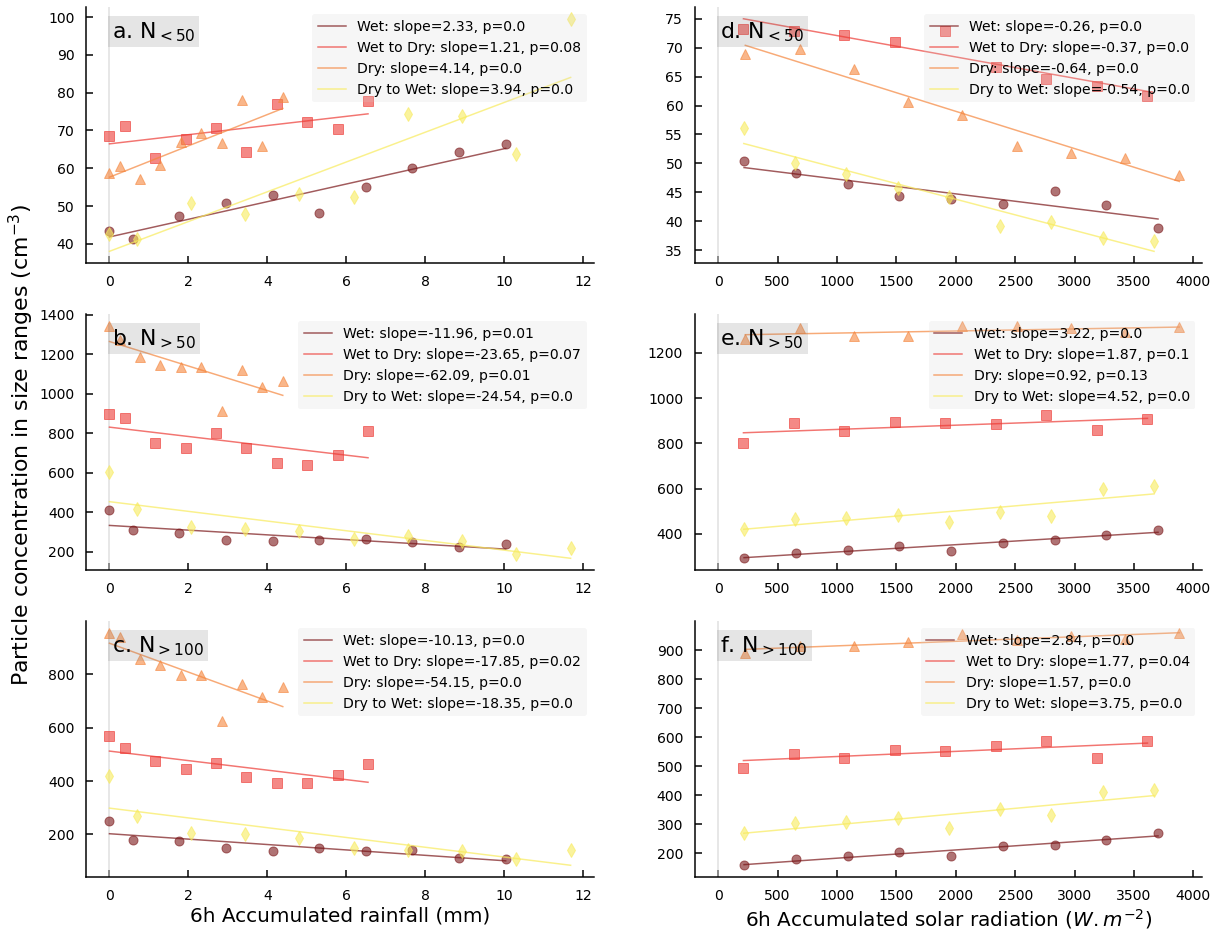

In [41]:

fig = plt.figure(figsize=(20,16))
list_nbins = [10,10,10,10]
ax = fig.add_subplot(321)
ax.text(0.05, 0.95, r'a. N$_{<50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
plot_median_bins(ax, 'Acc_rainfall_6h', 'N_10_50', list_nbins, list_ds_atto, 'upper right', list_colors_atto, list_seasons_atto)
ax = fig.add_subplot(323)
ax.text(0.05, 0.95, r'b. N$_{>50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
plot_median_bins(ax, 'Acc_rainfall_6h', 'N_50_500', list_nbins, list_ds_atto, 'upper right', list_colors_atto, list_seasons_atto)
# ax.set_ylim(top=120)
ax = fig.add_subplot(325)
ax.text(0.05, 0.95, r'c. N$_{>100}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
plot_median_bins(ax, 'Acc_rainfall_6h', 'N_100_500', list_nbins, list_ds_atto, 'upper right', list_colors_atto, list_seasons_atto)
# ax.set_ylim(top=140)
ax.set_xlabel(r'6h Accumulated rainfall (mm)', fontsize=20)

list_nbins = [10,10,10,10]
ax = fig.add_subplot(322)
ax.text(0.05, 0.95, r'd. N$_{<50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
plot_median_bins(ax, 'Acc_solar_radiation_6h', 'N_10_50', list_nbins, list_ds_atto, 'upper right', list_colors_atto, list_seasons_atto)
ax = fig.add_subplot(324)
ax.text(0.05, 0.95, r'e. N$_{>50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
plot_median_bins(ax, 'Acc_solar_radiation_6h', 'N_50_500', list_nbins, list_ds_atto, 'upper right', list_colors_atto, list_seasons_atto)
# ax.set_ylim(top=120)
ax = fig.add_subplot(326)
ax.text(0.05, 0.95, r'f. N$_{>100}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
plot_median_bins(ax, 'Acc_solar_radiation_6h', 'N_100_500', list_nbins, list_ds_atto, 'upper right', list_colors_atto, list_seasons_atto)
# set sup bound only
# ax.set_ylim(top=130)
ax.set_xlabel(r'6h Accumulated solar radiation $(W.m^{-2})$', fontsize=20)

fig.text(0.07, 0.5, r'Particle concentration in size ranges (cm$^{-3}$)', va='center', rotation='vertical', fontsize=22)

# path = '/Users/theodorekhadir/Documents/PHD/sinkVSsource/figures/'
# # save figure
# fig.savefig(path+'fig4_atto_6h.png', bbox_inches='tight', dpi=300)

## Fig. S7 | HYY

Text(0.07, 0.5, 'Particle concentration in size ranges (cm$^{-3}$)')

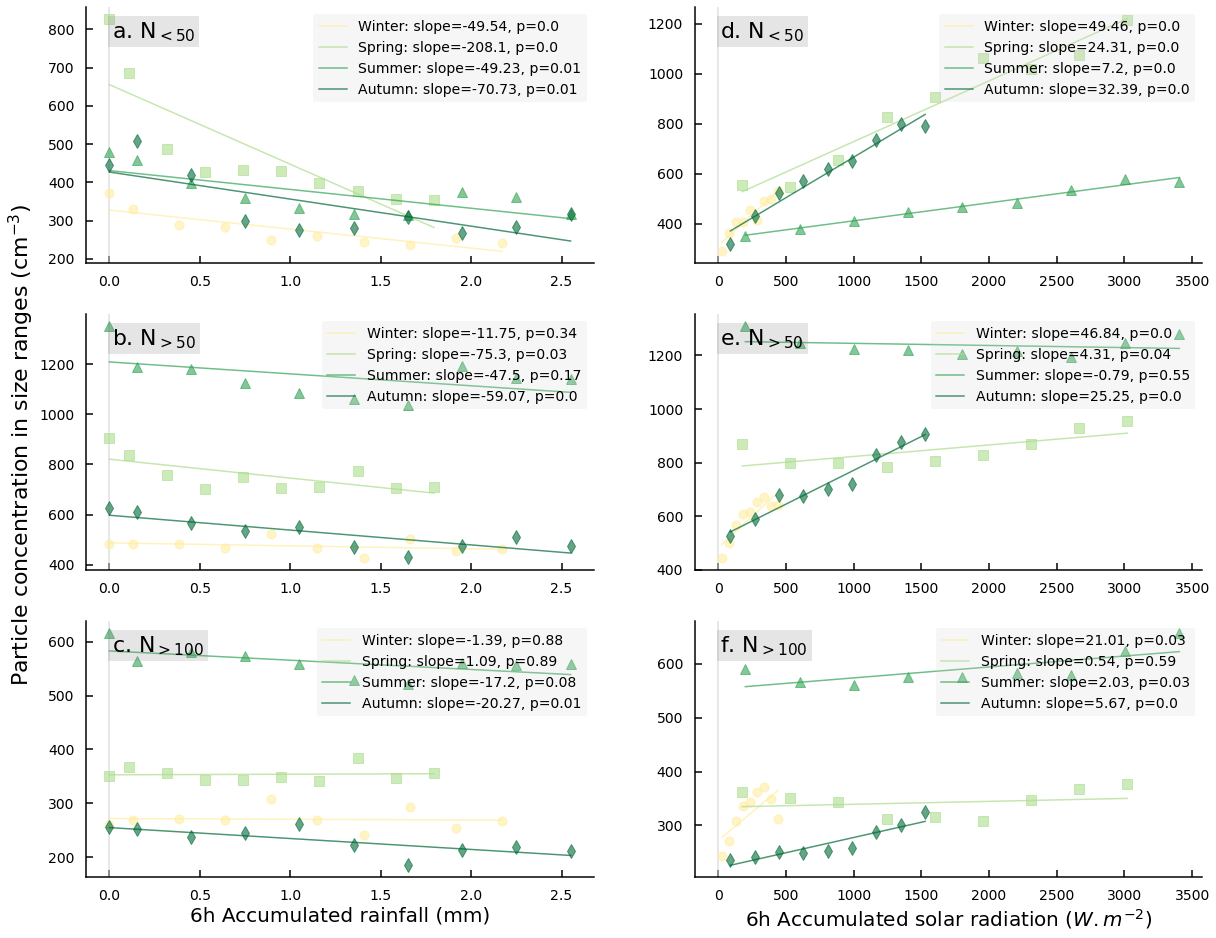

In [42]:

fig = plt.figure(figsize=(20,16))
list_nbins = [10,10,10,10]
ax = fig.add_subplot(321)
ax.text(0.05, 0.95, r'a. N$_{<50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
plot_median_bins(ax, 'Acc_rainfall_6h', 'N_10_50', list_nbins, list_ds_hyytiala, 'upper right', list_colors_hyytiala, list_seasons_hyytiala)
ax = fig.add_subplot(323)
ax.text(0.05, 0.95, r'b. N$_{>50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
plot_median_bins(ax, 'Acc_rainfall_6h', 'N_50_500', list_nbins, list_ds_hyytiala, 'upper right', list_colors_hyytiala, list_seasons_hyytiala)
# ax.set_ylim(top=120)
ax = fig.add_subplot(325)
ax.text(0.05, 0.95, r'c. N$_{>100}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
plot_median_bins(ax, 'Acc_rainfall_6h', 'N_100_500', list_nbins, list_ds_hyytiala, 'upper right', list_colors_hyytiala, list_seasons_hyytiala)
# ax.set_ylim(top=140)
ax.set_xlabel(r'6h Accumulated rainfall (mm)', fontsize=20)

list_nbins = [10,10,10,10]
ax = fig.add_subplot(322)
ax.text(0.05, 0.95, r'd. N$_{<50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
plot_median_bins(ax, 'Acc_solar_radiation_6h', 'N_10_50', list_nbins, list_ds_hyytiala, 'upper right', list_colors_hyytiala, list_seasons_hyytiala)
ax = fig.add_subplot(324)
ax.text(0.05, 0.95, r'e. N$_{>50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
plot_median_bins(ax, 'Acc_solar_radiation_6h', 'N_50_500', list_nbins, list_ds_hyytiala, 'upper right', list_colors_hyytiala, list_seasons_hyytiala)
# ax.set_ylim(top=120)
ax = fig.add_subplot(326)
ax.text(0.05, 0.95, r'f. N$_{>100}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
plot_median_bins(ax, 'Acc_solar_radiation_6h', 'N_100_500', list_nbins, list_ds_hyytiala, 'upper right', list_colors_hyytiala, list_seasons_hyytiala)
# set sup bound only
# ax.set_ylim(top=130)
ax.set_xlabel(r'6h Accumulated solar radiation $(W.m^{-2})$', fontsize=20)

fig.text(0.07, 0.5, r'Particle concentration in size ranges (cm$^{-3}$)', va='center', rotation='vertical', fontsize=22)

# path = '/Users/theodorekhadir/Documents/PHD/sinkVSsource/figures/'
# # save figure
# fig.savefig(path+'fig4_hyy_6h.png', bbox_inches='tight', dpi=300)

## ## Fig. S8 | ZEP

Text(0.07, 0.5, 'Particle concentration in size ranges (cm$^{-3}$)')

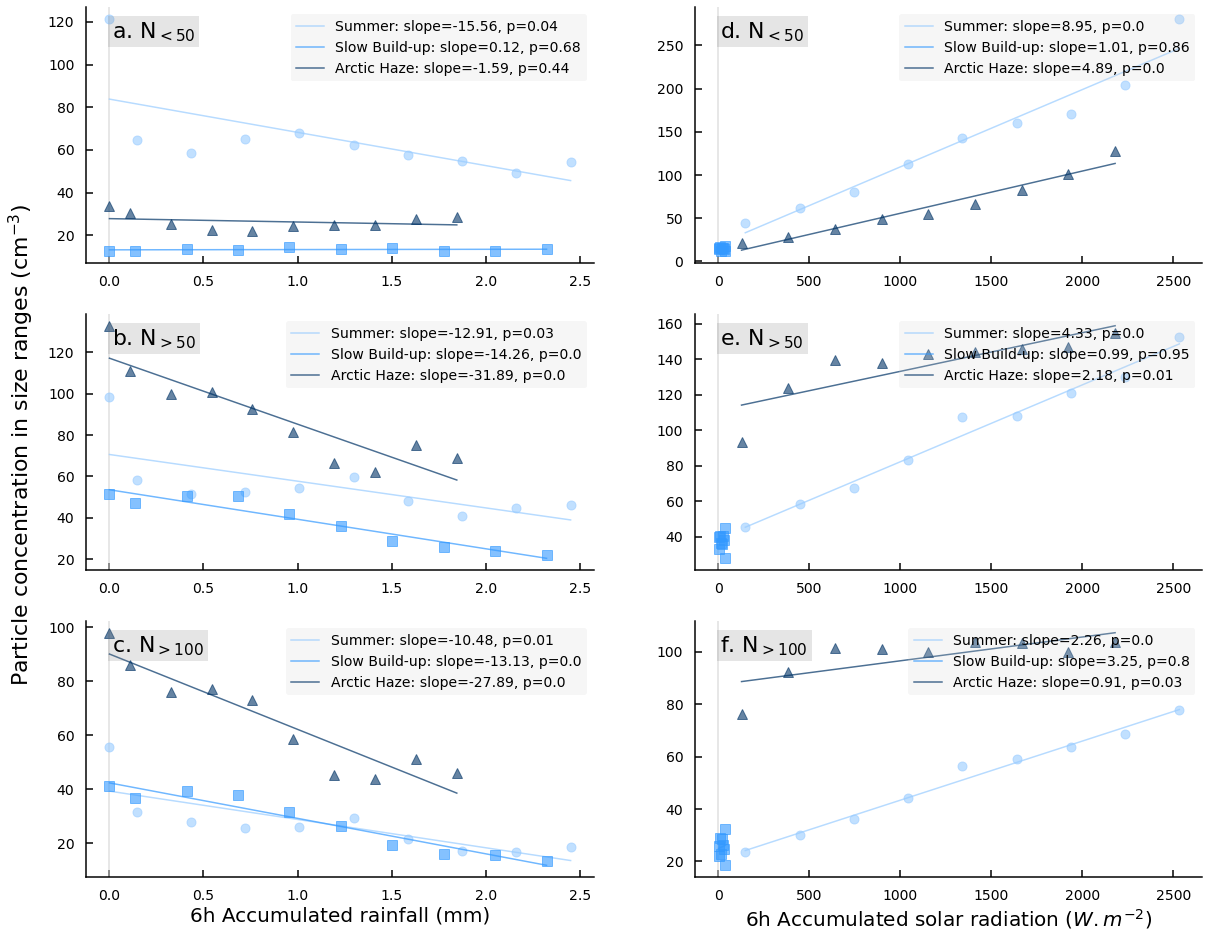

In [43]:

fig = plt.figure(figsize=(20,16))
list_nbins = [10,10,10,10]
ax = fig.add_subplot(321)
ax.text(0.05, 0.95, r'a. N$_{<50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
plot_median_bins(ax, 'Acc_rainfall_6h', 'N_10_50', list_nbins, list_ds_zeppelin, 'upper right', list_colors_zeppelin, list_seasons_zeppelin)
ax = fig.add_subplot(323)
ax.text(0.05, 0.95, r'b. N$_{>50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
plot_median_bins(ax, 'Acc_rainfall_6h', 'N_50_500', list_nbins, list_ds_zeppelin, 'upper right', list_colors_zeppelin, list_seasons_zeppelin)
# ax.set_ylim(top=120)
ax = fig.add_subplot(325)
ax.text(0.05, 0.95, r'c. N$_{>100}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
plot_median_bins(ax, 'Acc_rainfall_6h', 'N_100_500', list_nbins, list_ds_zeppelin, 'upper right', list_colors_zeppelin, list_seasons_zeppelin)
# ax.set_ylim(top=140)
ax.set_xlabel(r'6h Accumulated rainfall (mm)', fontsize=20)

list_nbins = [10,10,10,10]
ax = fig.add_subplot(322)
ax.text(0.05, 0.95, r'd. N$_{<50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
plot_median_bins(ax, 'Acc_solar_radiation_6h', 'N_10_50', list_nbins, list_ds_zeppelin, 'upper right', list_colors_zeppelin, list_seasons_zeppelin)
ax = fig.add_subplot(324)
ax.text(0.05, 0.95, r'e. N$_{>50}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
plot_median_bins(ax, 'Acc_solar_radiation_6h', 'N_50_500', list_nbins, list_ds_zeppelin, 'upper right', list_colors_zeppelin, list_seasons_zeppelin)
# ax.set_ylim(top=120)
ax = fig.add_subplot(326)
ax.text(0.05, 0.95, r'f. N$_{>100}$', transform=ax.transAxes, fontsize=22, verticalalignment='top', 
        bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2))
plot_median_bins(ax, 'Acc_solar_radiation_6h', 'N_100_500', list_nbins, list_ds_zeppelin, 'upper right', list_colors_zeppelin, list_seasons_zeppelin)
# set sup bound only
# ax.set_ylim(top=130)
ax.set_xlabel(r'6h Accumulated solar radiation $(W.m^{-2})$', fontsize=20)

fig.text(0.07, 0.5, r'Particle concentration in size ranges (cm$^{-3}$)', va='center', rotation='vertical', fontsize=22)

# path = '/Users/theodorekhadir/Documents/PHD/sinkVSsource/figures/'
# # save figure
# fig.savefig(path+'fig4_zep_6h.png', bbox_inches='tight', dpi=300)